In [1]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import os
import seaborn as sns
#import featuretools as ft
import gc
pd.set_option('display.max_rows', 100)

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
target = train_df["target"]

In [3]:
train_stats = train_df.describe().drop('target', axis=1).T.drop('count', axis=1)

In [4]:
new_index = []
for index in train_stats.index:
    new_index.append(index.split('_')[1])

In [5]:
train_stats.index = new_index
train_stats.head()

mean       std      min       25%       50%        75%      max
0  10.679914  3.040051   0.4084  8.453850  10.52475  12.758200  20.3150
1  -1.627622  4.050044 -15.0434 -4.740025  -1.60805   1.358625  10.3768
2  10.715192  2.640894   2.1171  8.722475  10.58000  12.516700  19.3530
3   6.796529  2.043319  -0.0402  5.254075   6.82500   8.324100  13.1883
4  11.078333  1.623150   5.0748  9.883175  11.10825  12.261125  16.6714

In [6]:
test_stats = test_df.describe().T.drop('count', axis=1)
test_stats.index = new_index
test_stats.head()

mean       std      min       25%       50%        75%      max
0  10.658737  3.036716   0.1887  8.442975  10.51380  12.739600  22.3234
1  -1.624244  4.040509 -15.0434 -4.700125  -1.59050   1.343400   9.3851
2  10.707452  2.633888   2.3552  8.735600  10.56070  12.495025  18.7141
3   6.788214  2.052724  -0.0224  5.230500   6.82235   8.327600  13.1420
4  11.076399  1.616456   5.4844  9.891075  11.09975  12.253400  16.0371

# Data Distribution difference between train and test

In [7]:
data_stats = pd.DataFrame()
for column in train_stats.columns:
    data_stats[column+"_diff"] = np.abs(train_stats[column] - test_stats[column])

In [8]:
data_stats.head()

mean_diff  std_diff  min_diff  25%_diff  50%_diff  75%_diff  max_diff
0   0.021177  0.003335    0.2197  0.010875   0.01095  0.018600    2.0084
1   0.003378  0.009535    0.0000  0.039900   0.01755  0.015225    0.9917
2   0.007740  0.007006    0.2381  0.013125   0.01930  0.021675    0.6389
3   0.008315  0.009405    0.0178  0.023575   0.00265  0.003500    0.0463
4   0.001934  0.006693    0.4096  0.007900   0.00850  0.007725    0.6343

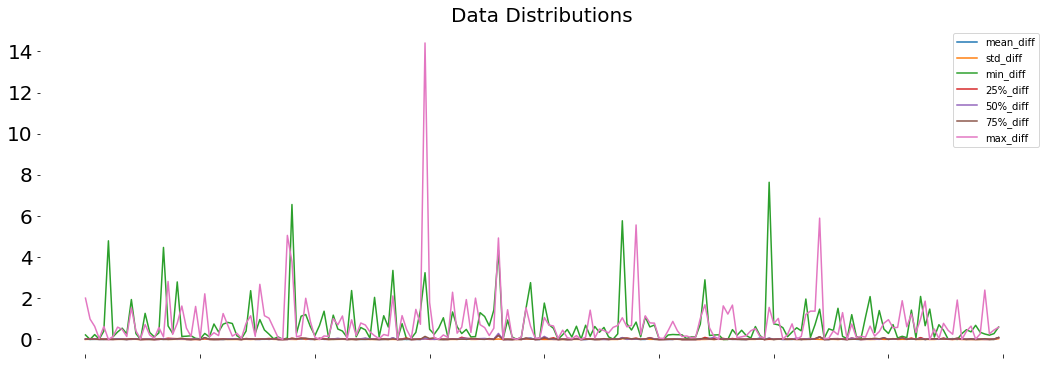

In [9]:
ax = data_stats.plot(
    figsize=(18, 6),
    fontsize=20
)
ax.set_title("Data Distributions", fontsize=20)
#ax.set_xticks(range(num_folds))
sns.despine(bottom=True, left=True)

In [10]:
def distribution_plot(data):
    figs={}
    axs={}
    for idx, column in enumerate(data.columns):
        figs[idx] = plt.figure()
        axs[idx] = figs[idx].add_subplot(111)
        axs[idx] = data[column].plot(figsize=(18, 6),fontsize=20)
        axs[idx].set_title(column+" distribution")
    return figs, axs

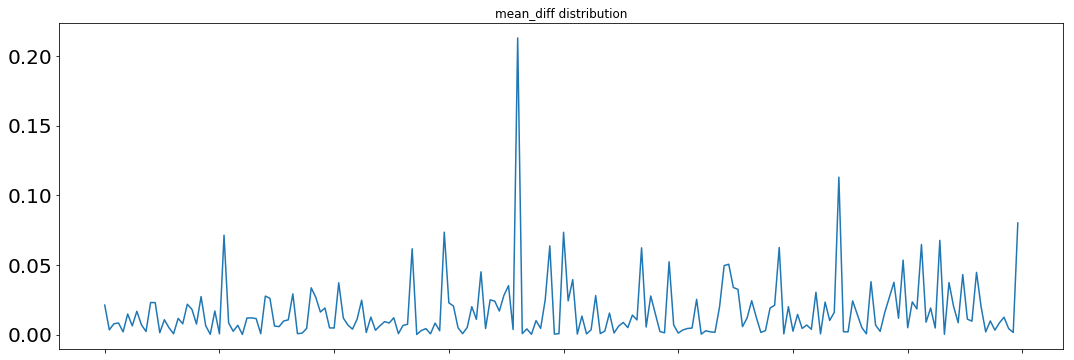

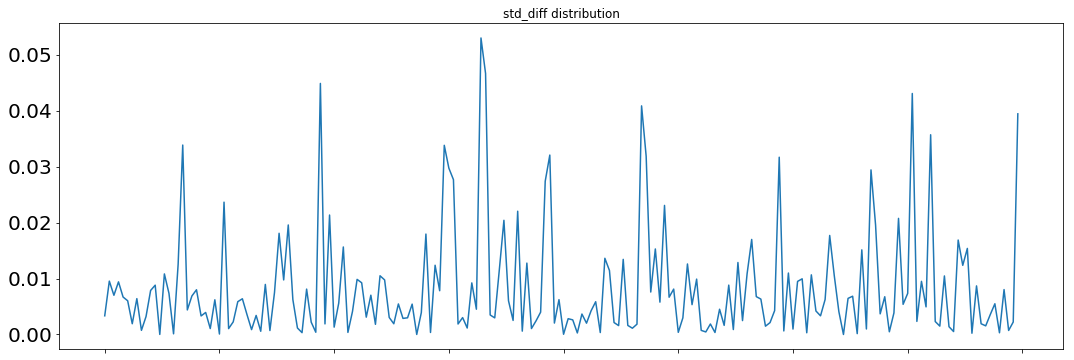

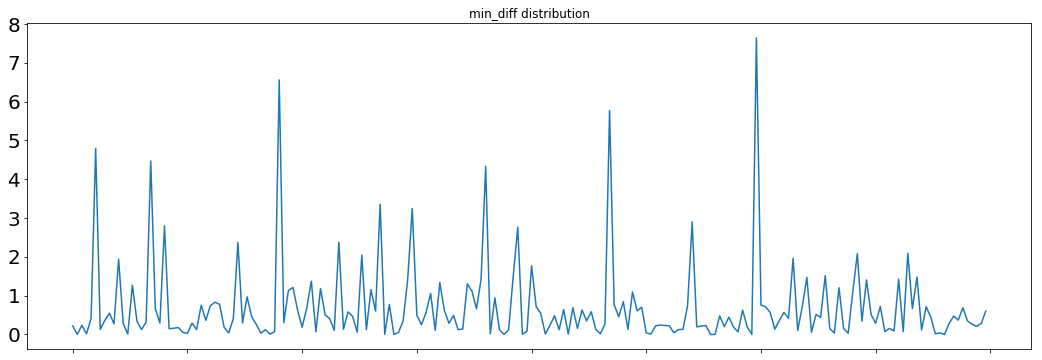

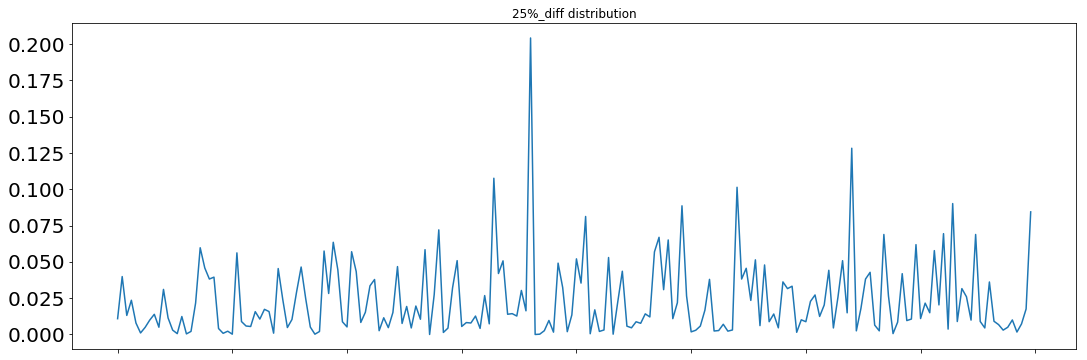

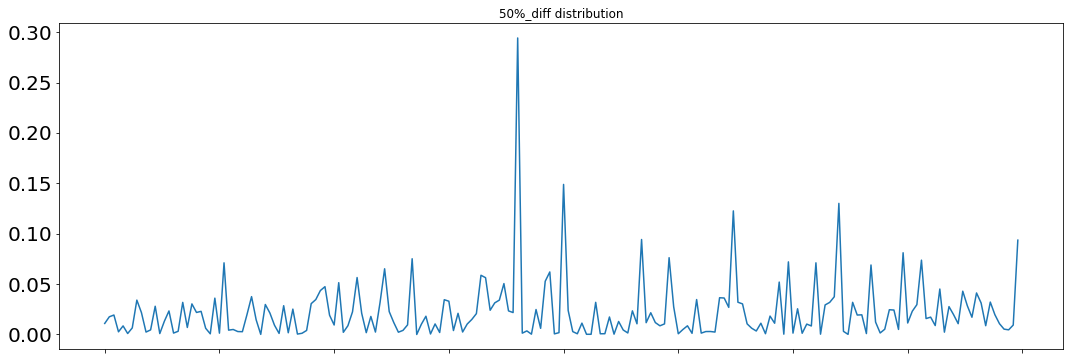

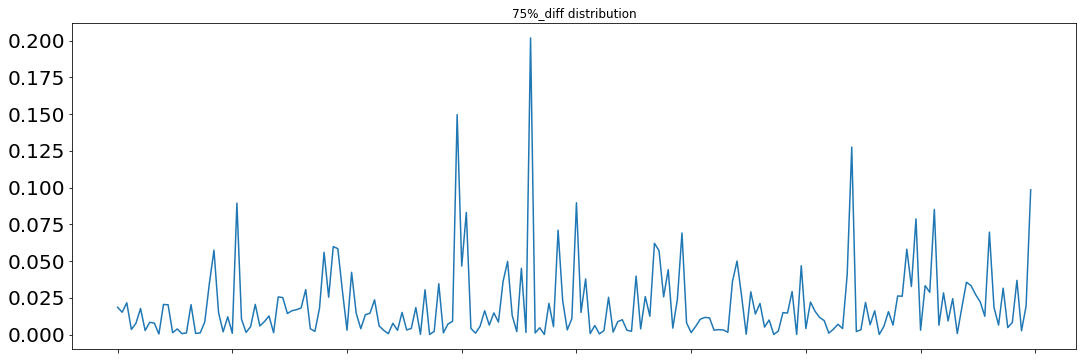

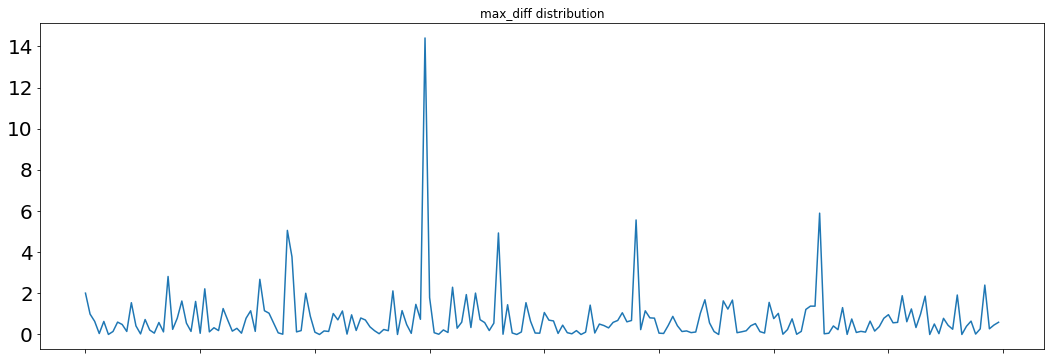

In [11]:
figs, axs = distribution_plot(data_stats)

# Data Distribution across target by feature

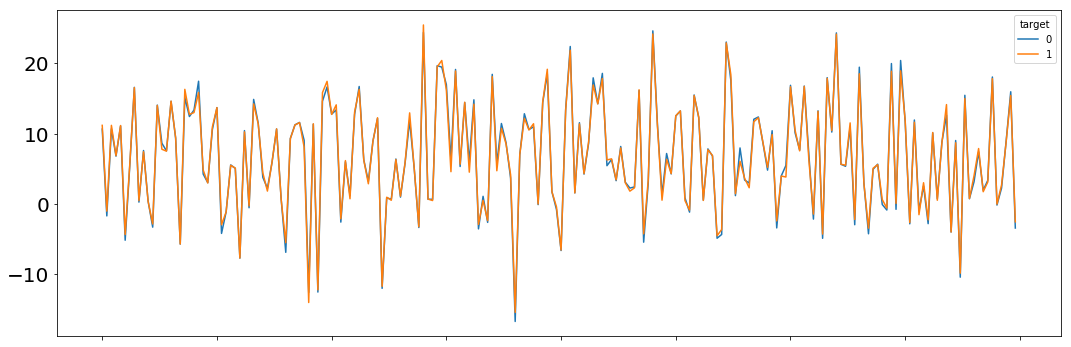

In [12]:
train_df.groupby('target').mean().T.plot(figsize=(18, 6),fontsize=20)

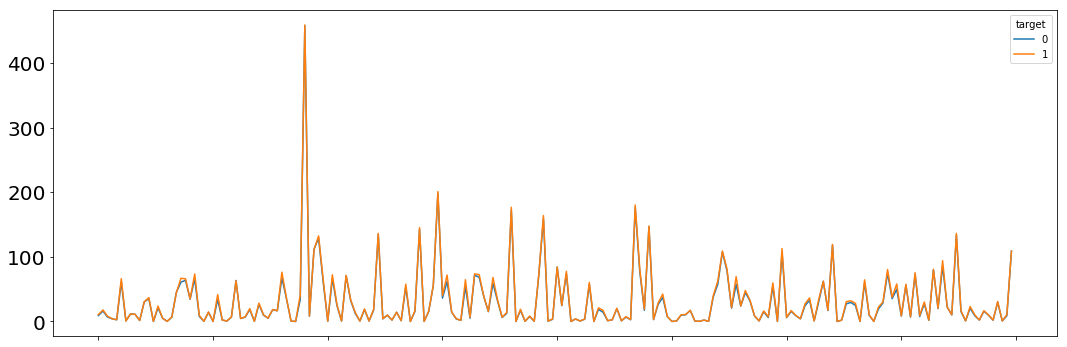

In [13]:
train_df.groupby('target').var().T.plot(figsize=(18, 6),fontsize=20)

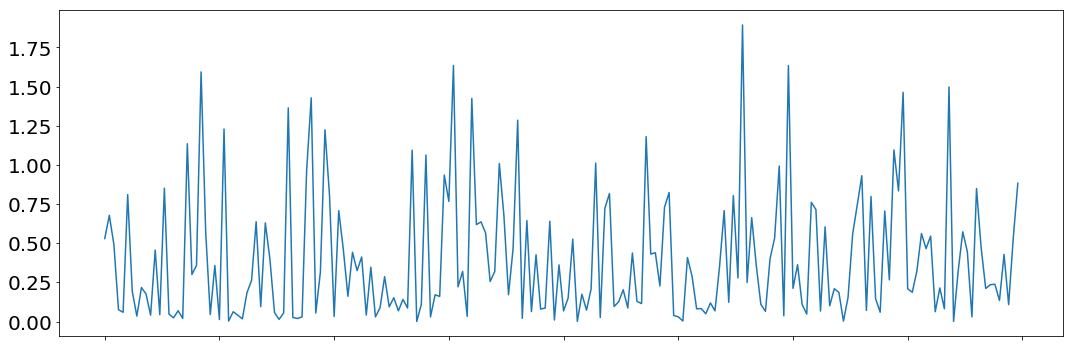

In [14]:
temp = train_df.groupby('target').mean().T
temp['diff'] = np.abs(temp[0]-temp[1])
temp['diff'].plot(figsize=(18, 6),fontsize=20)
del temp

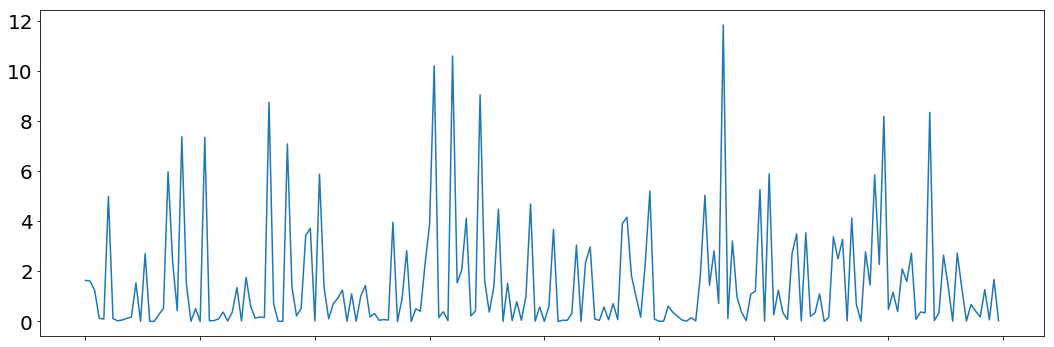

In [15]:
temp = train_df.groupby('target').var().T
temp['diff'] = np.abs(temp[0]-temp[1])
temp['diff'].plot(figsize=(18, 6),fontsize=20)
del temp

# Converting features to categorical

In [16]:
train_dist = pd.DataFrame()
train_dist['target'] = train_df['target']
for column in train_df.drop(['ID_code', 'target'],axis=1).columns:
    train_dist[column.split('_')[1]+'_dist'] = pd.cut(train_df[column], 5)

In [17]:
def cut_target_dist(data):
    figs={}
    axs={}
    for idx, column in enumerate(data.drop('target',axis=1).columns):
        figs[idx] = plt.figure()
        axs[idx] = figs[idx].add_subplot(111)
        axs[idx] = data.groupby(column)['target'].mean().dropna().plot(figsize=(18, 6),fontsize=20)
        axs[idx].set_title(column+" train distribution")
    return figs, axs

/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/apg/all_dl/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may con

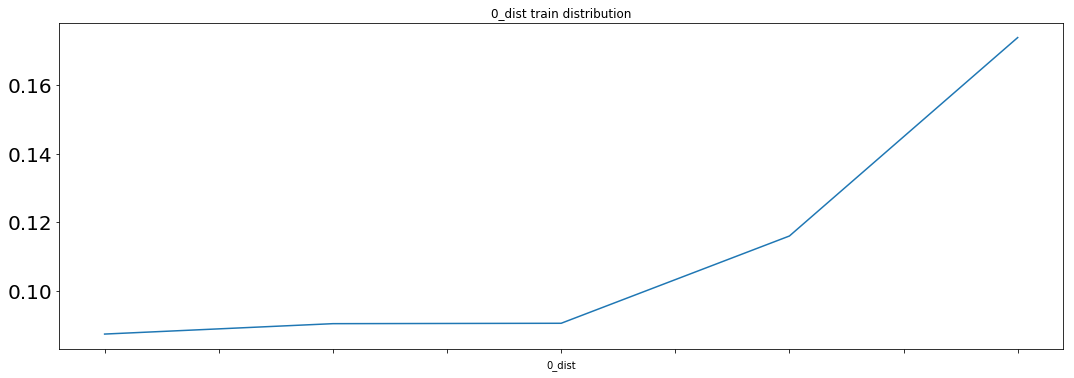

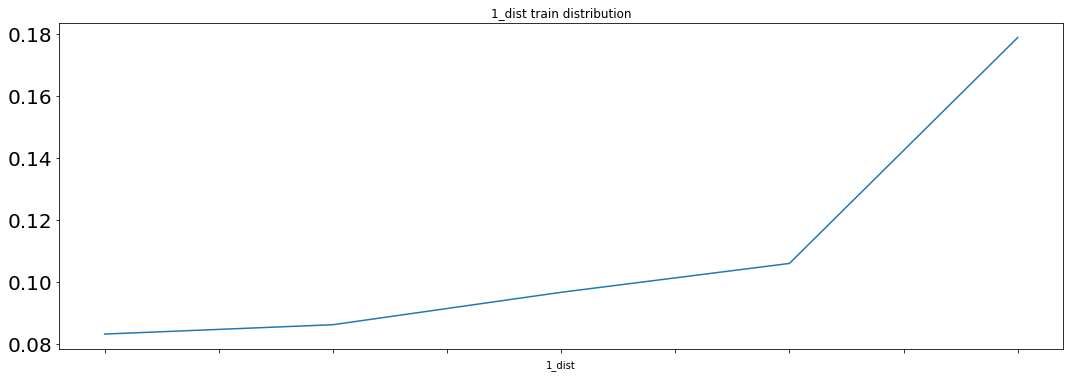

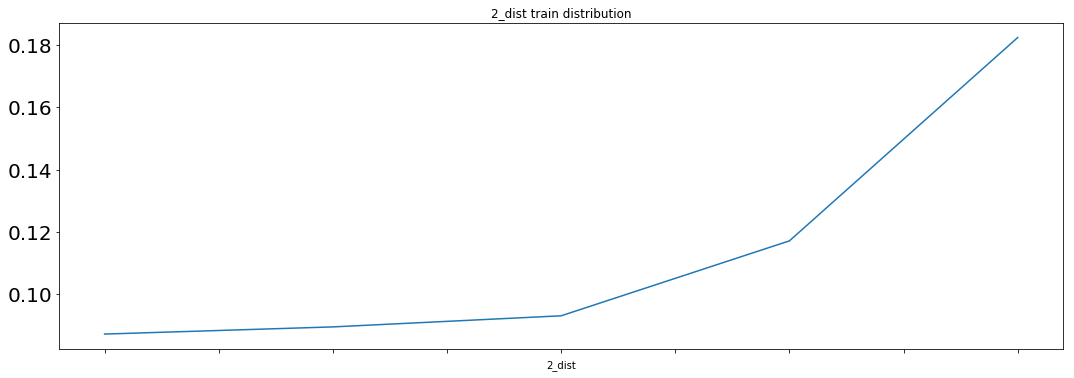

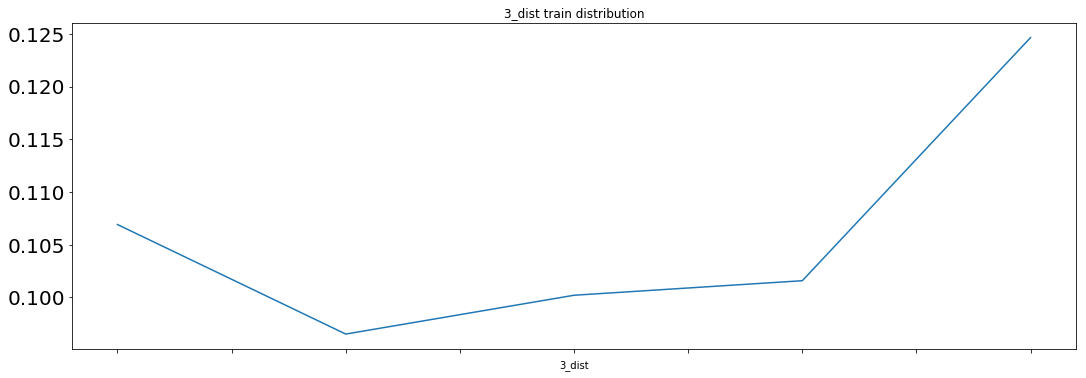

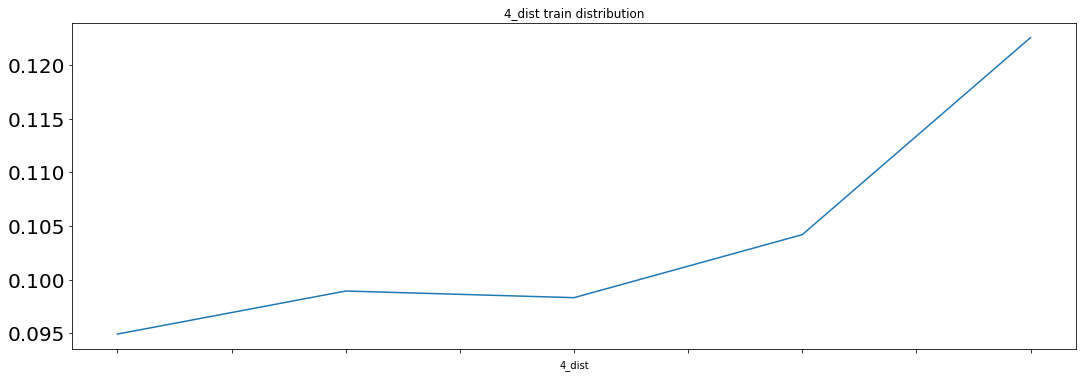

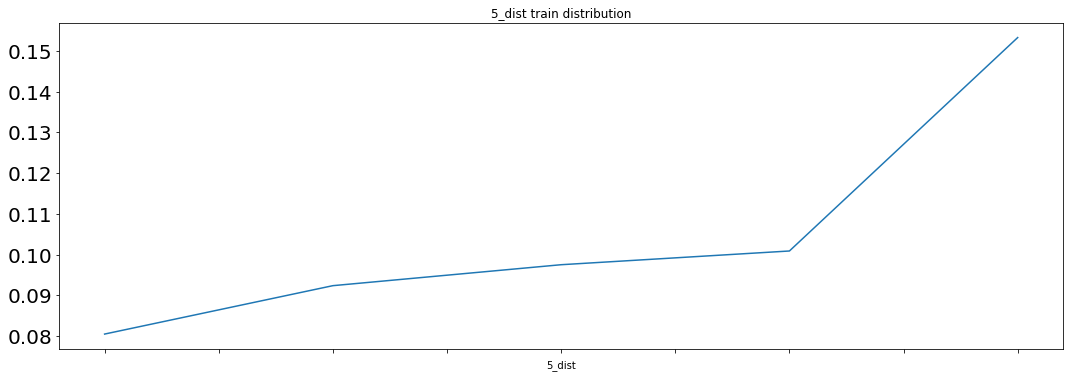

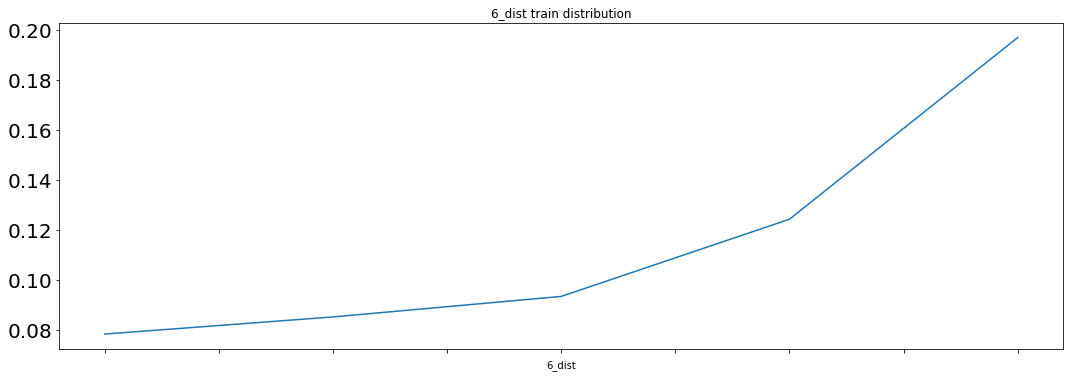

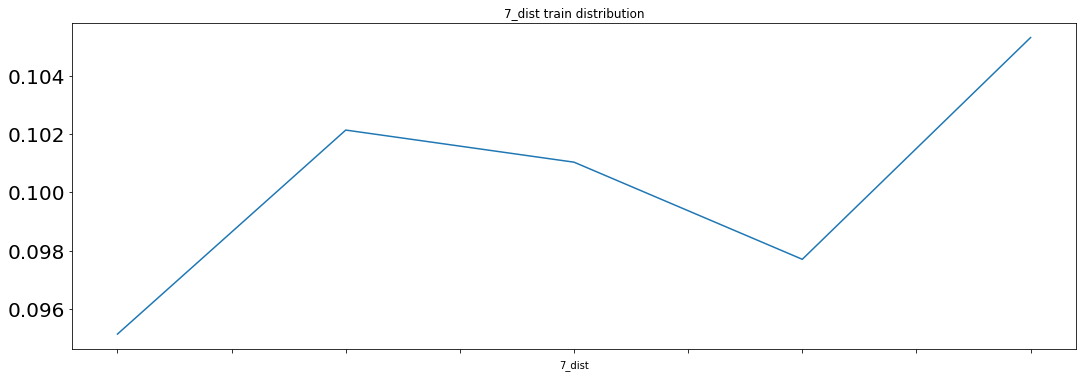

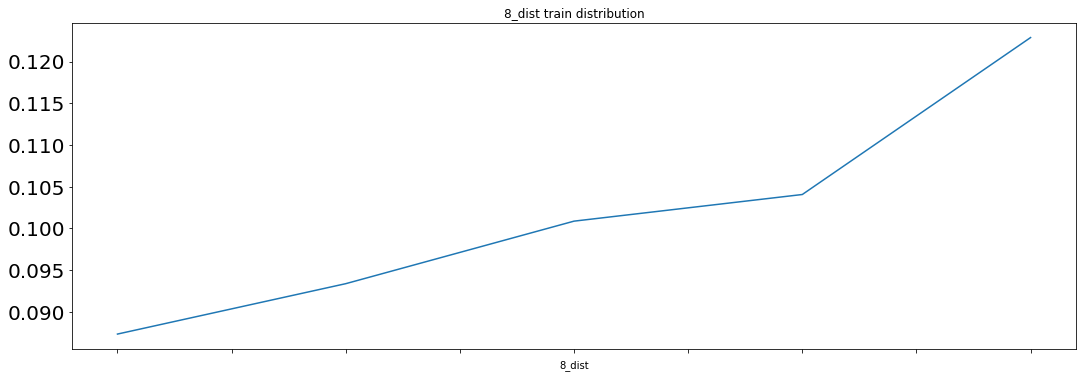

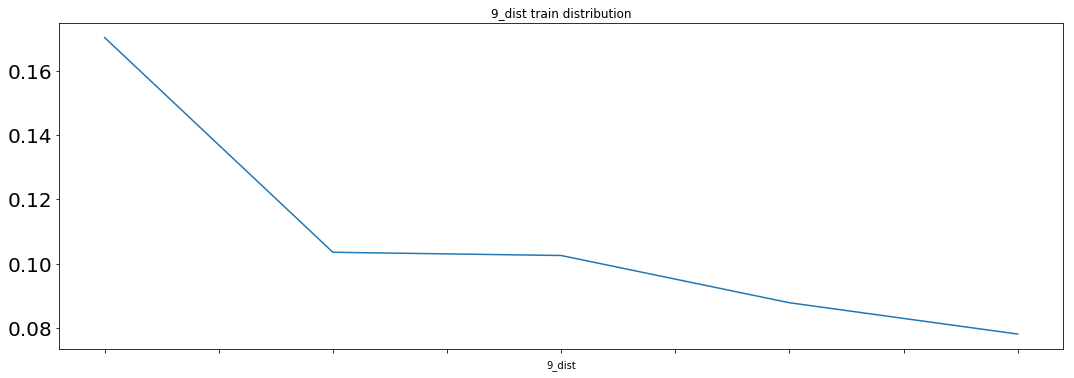

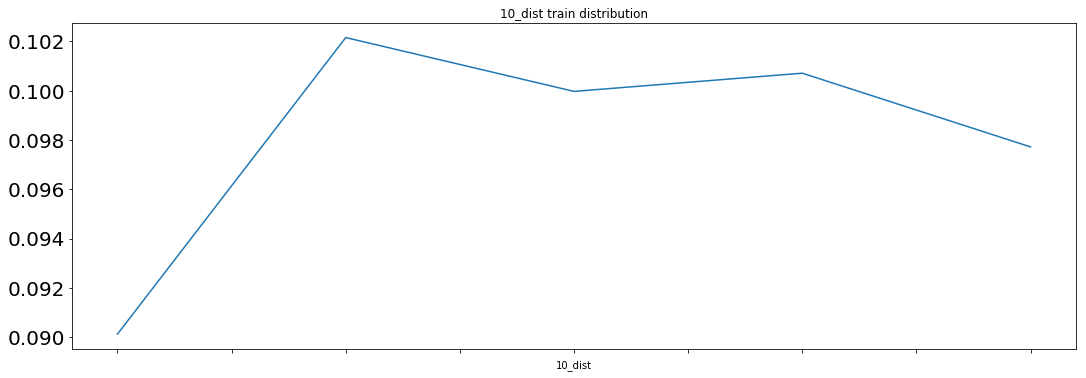

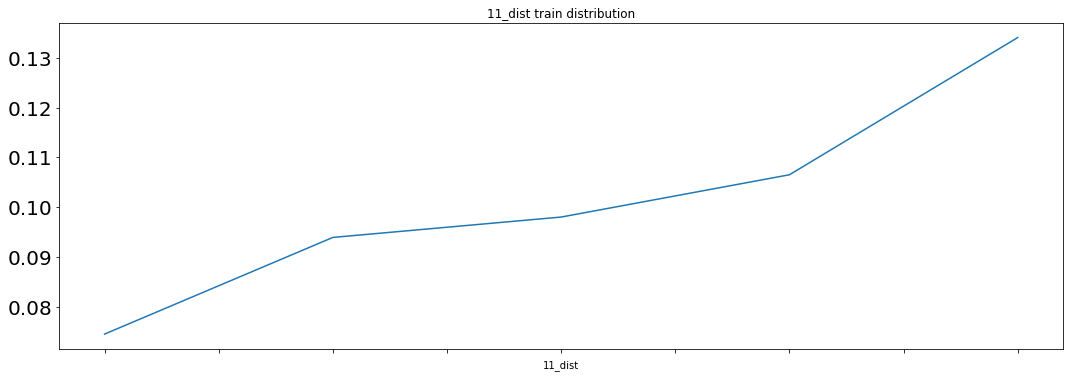

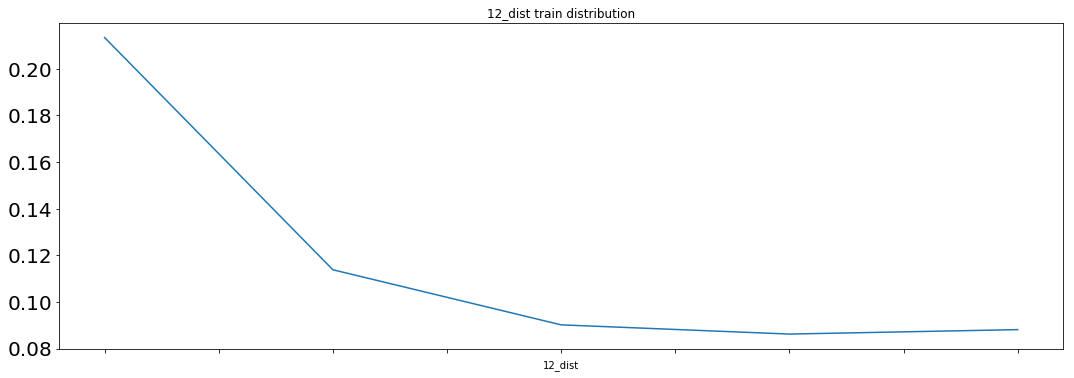

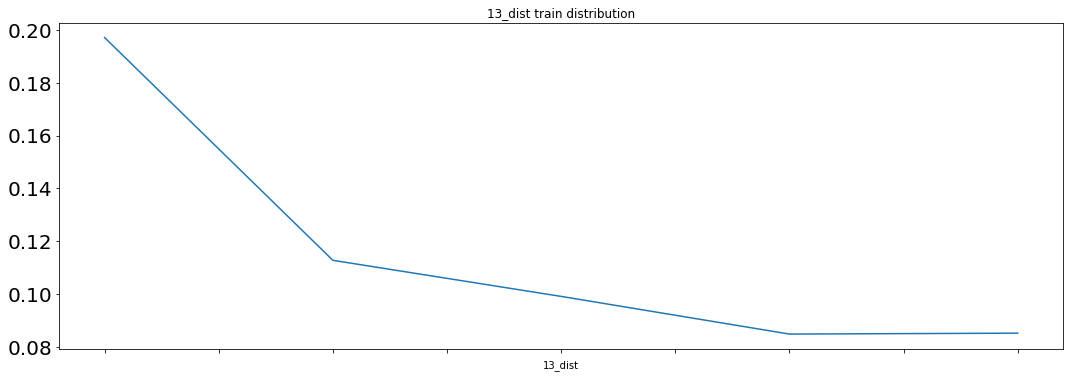

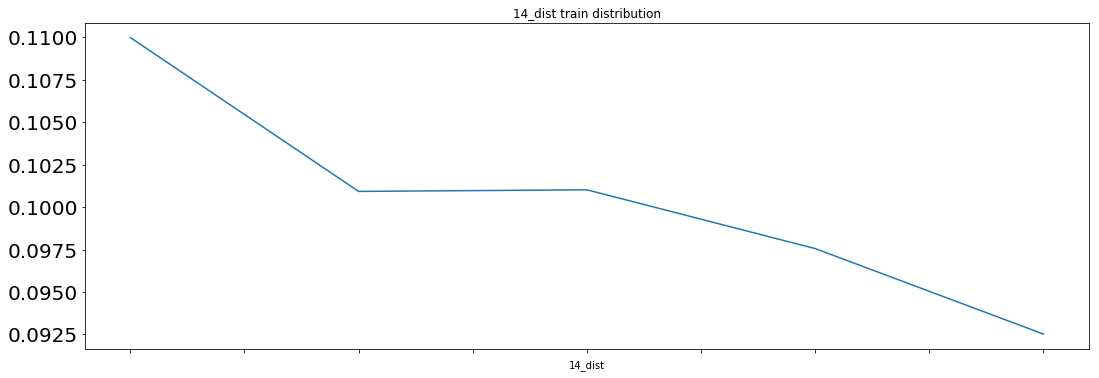

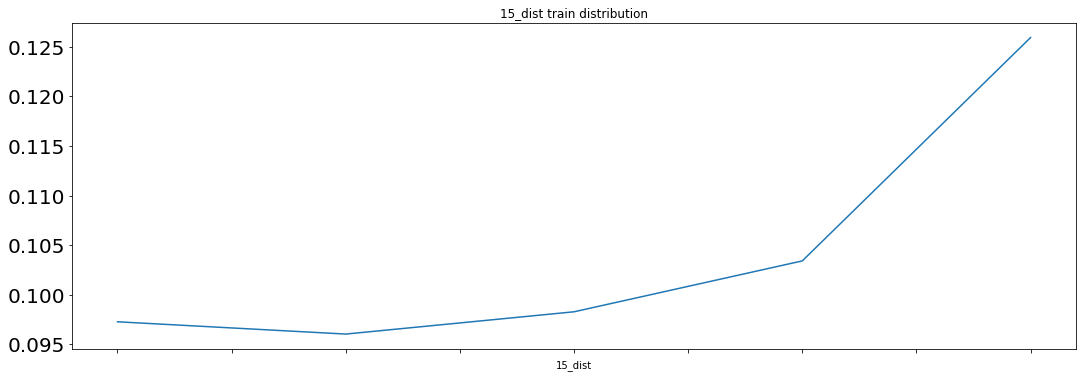

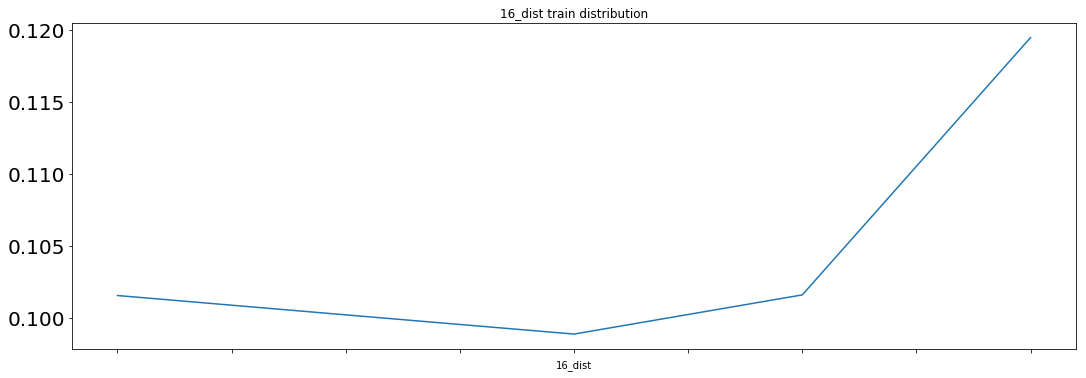

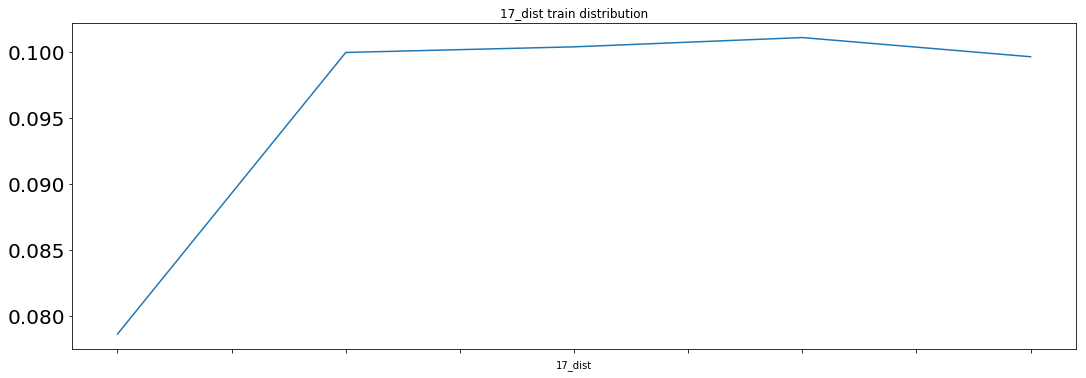

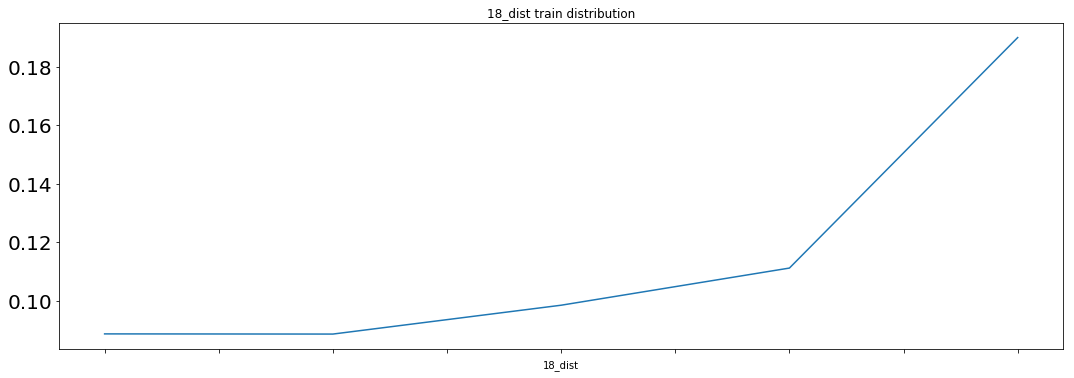

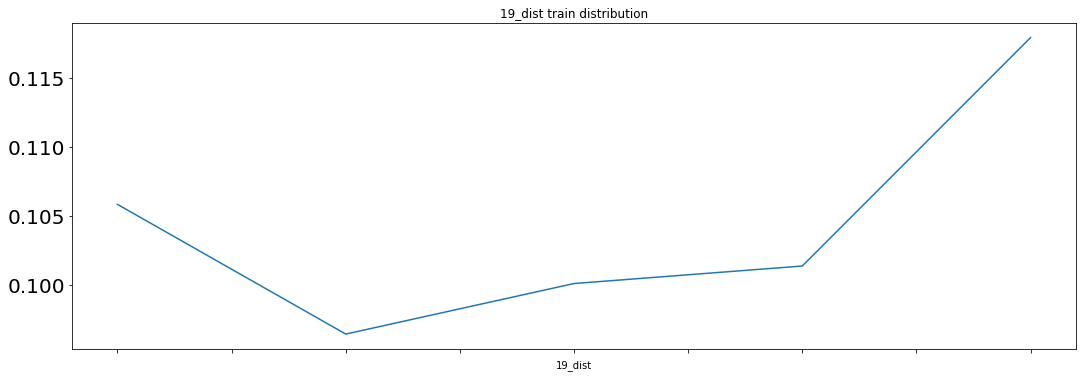

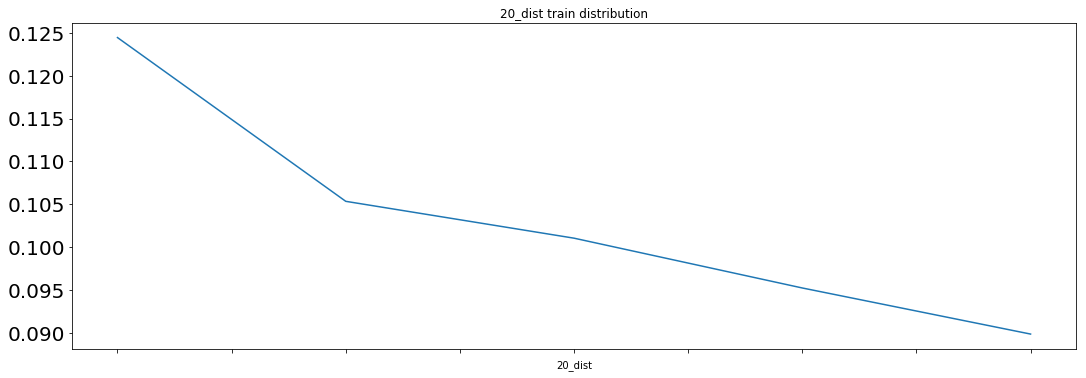

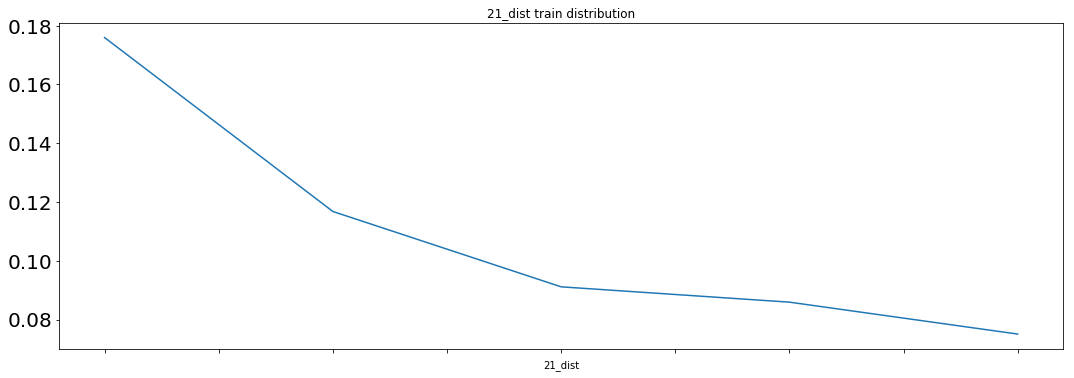

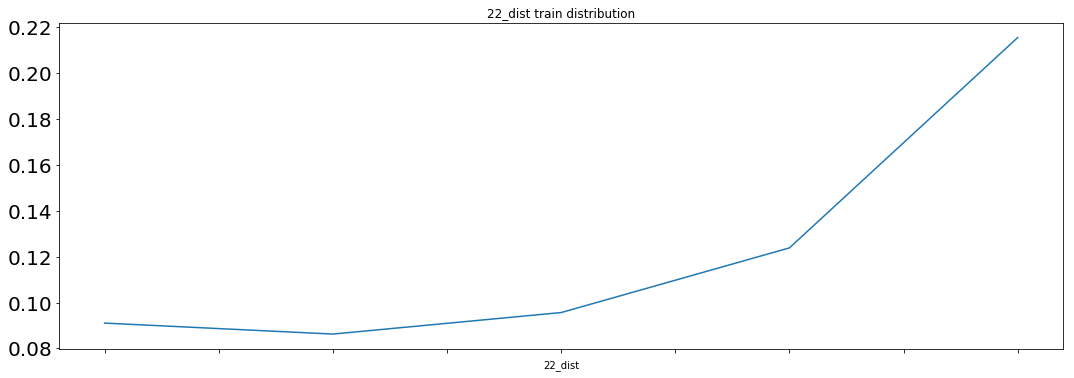

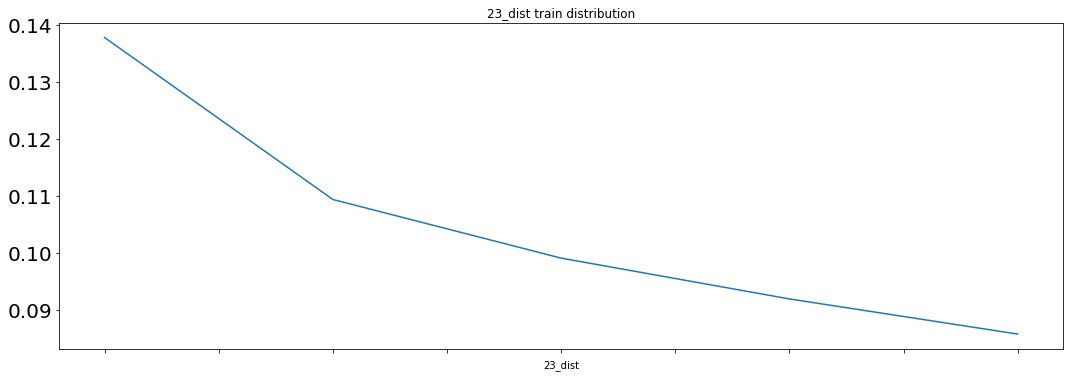

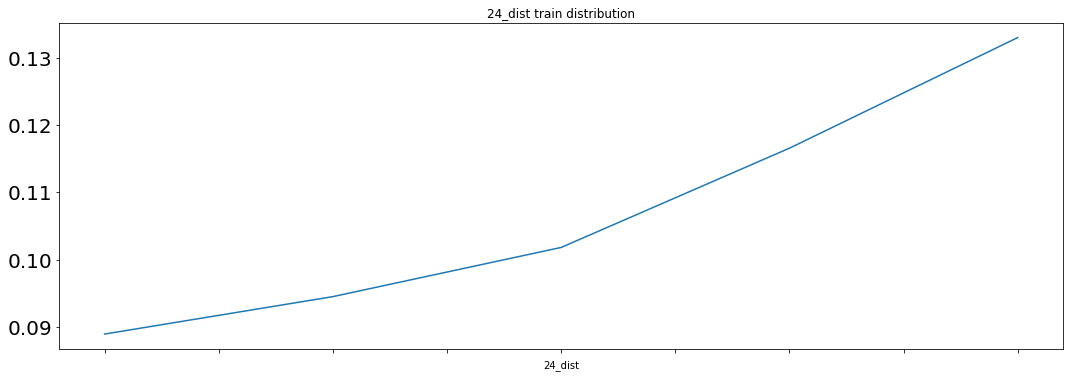

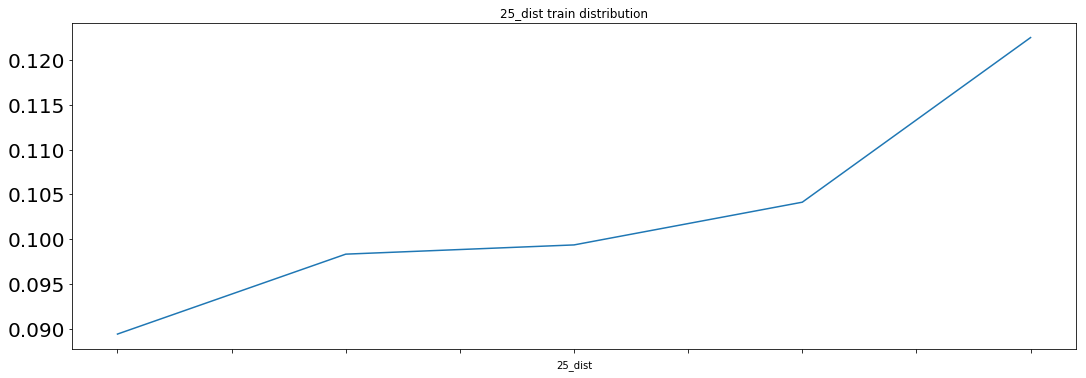

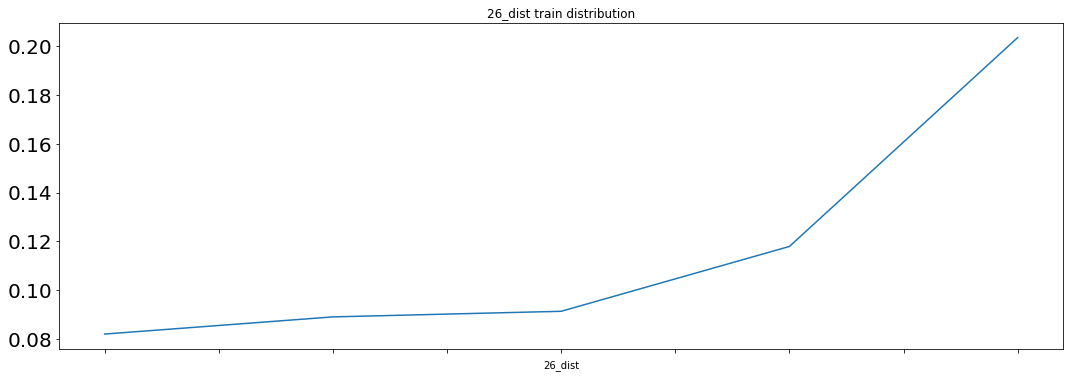

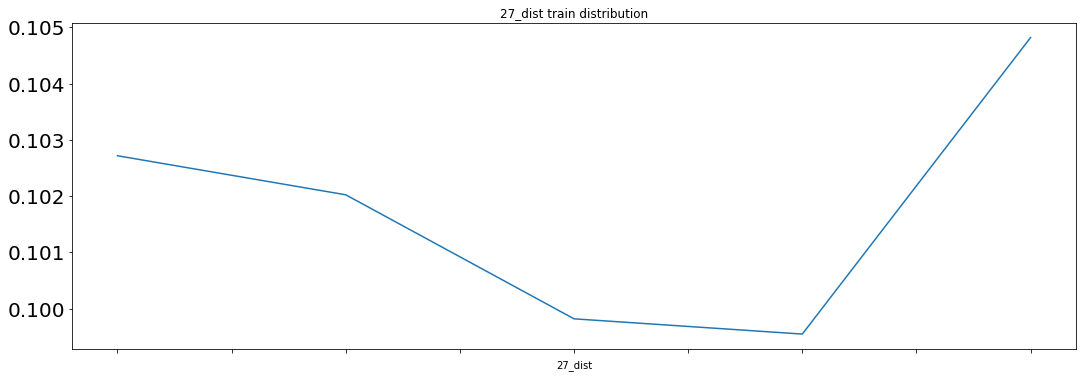

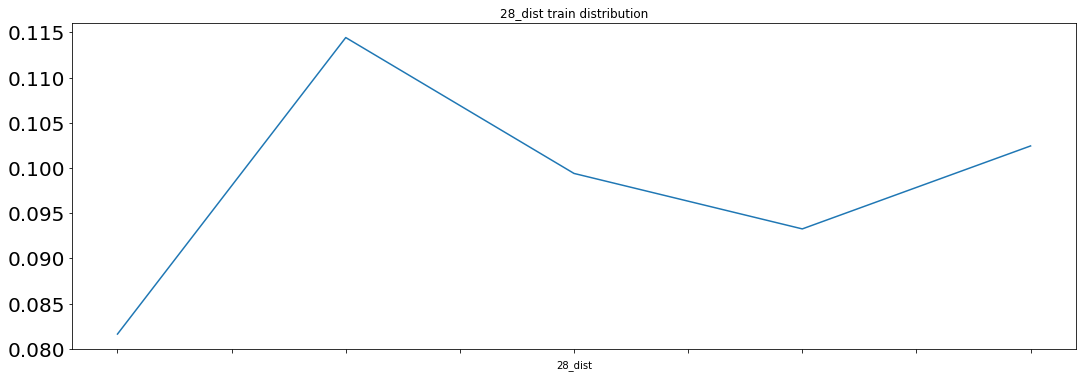

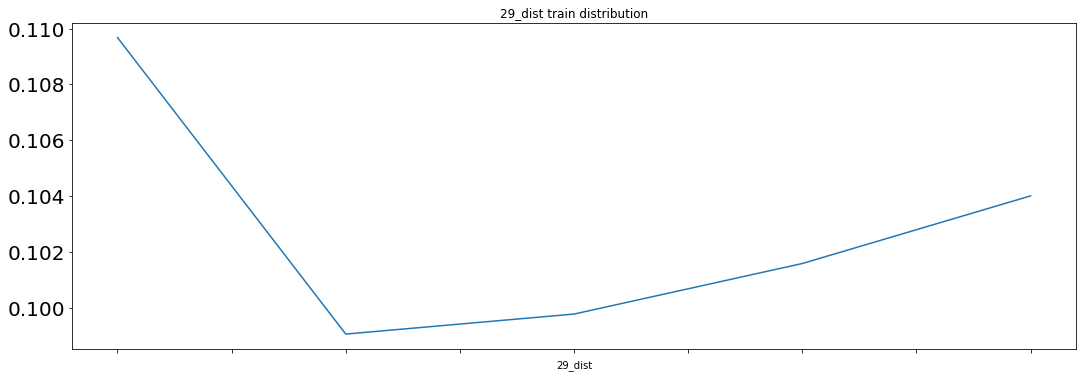

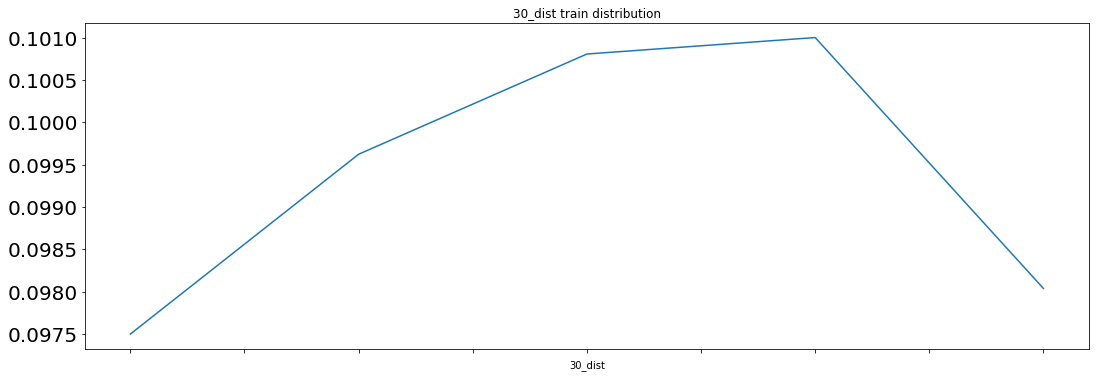

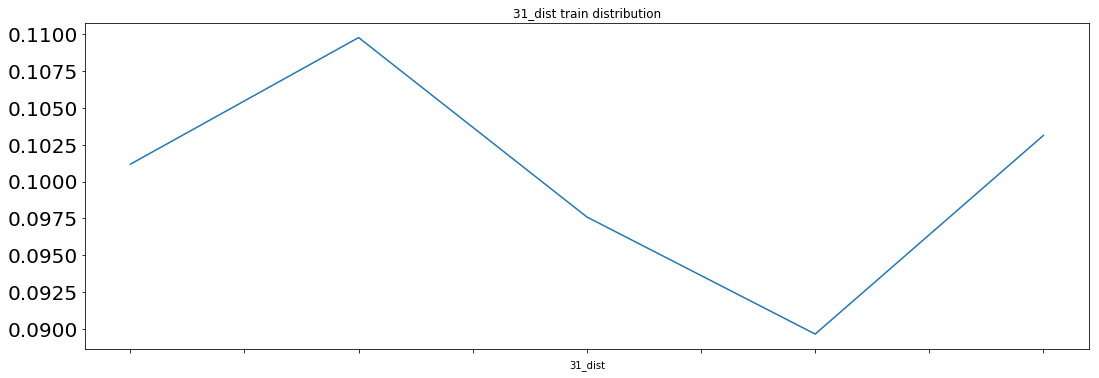

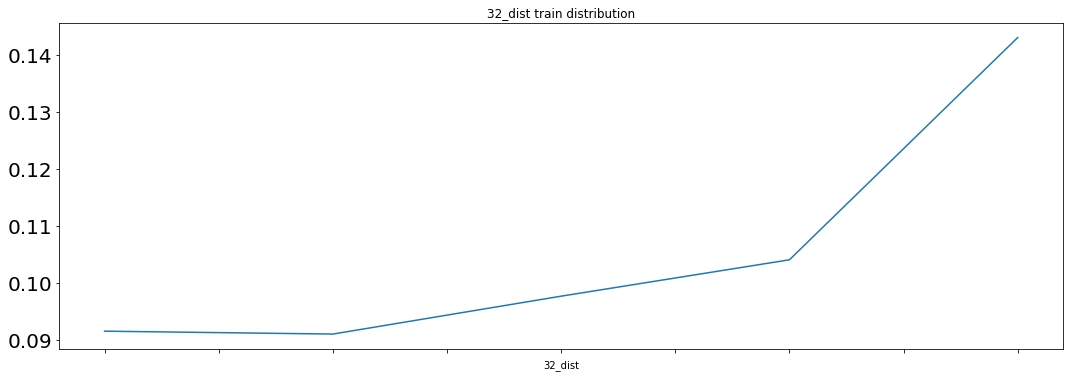

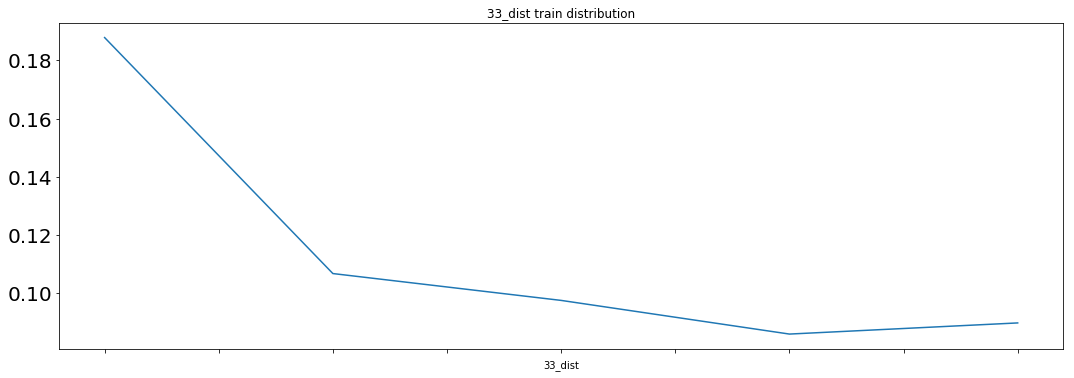

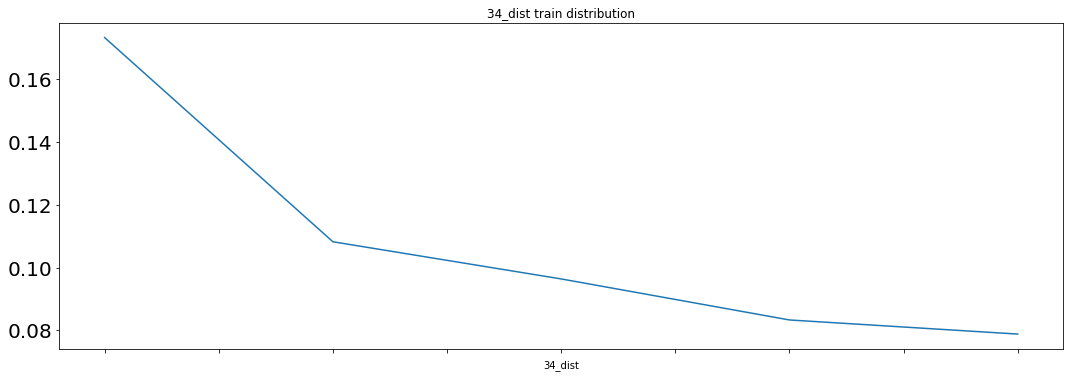

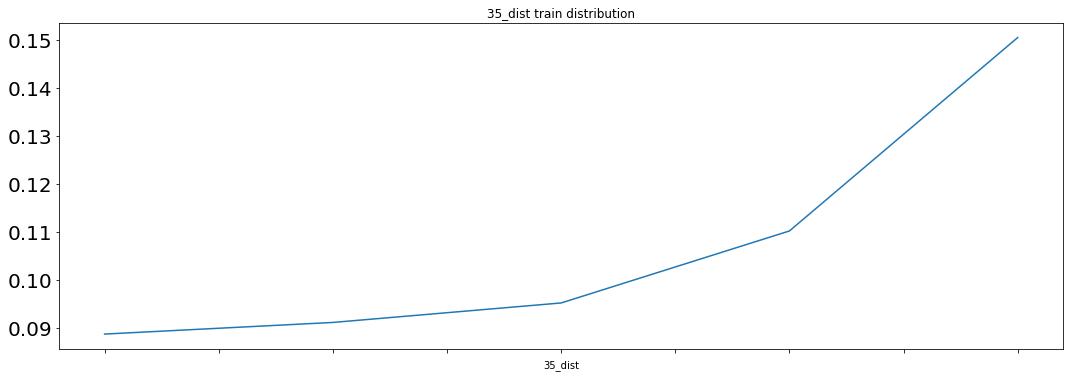

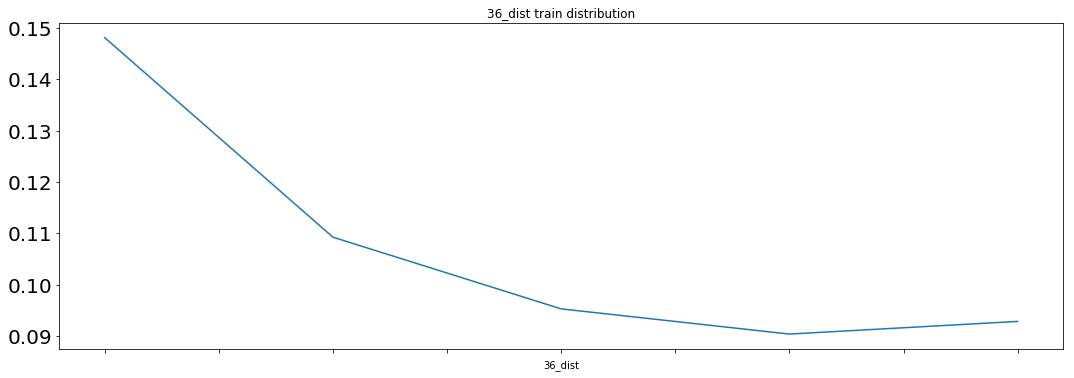

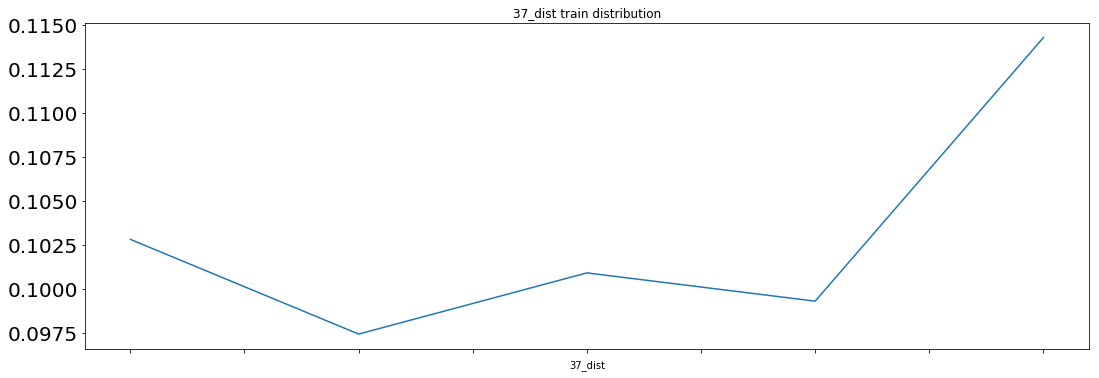

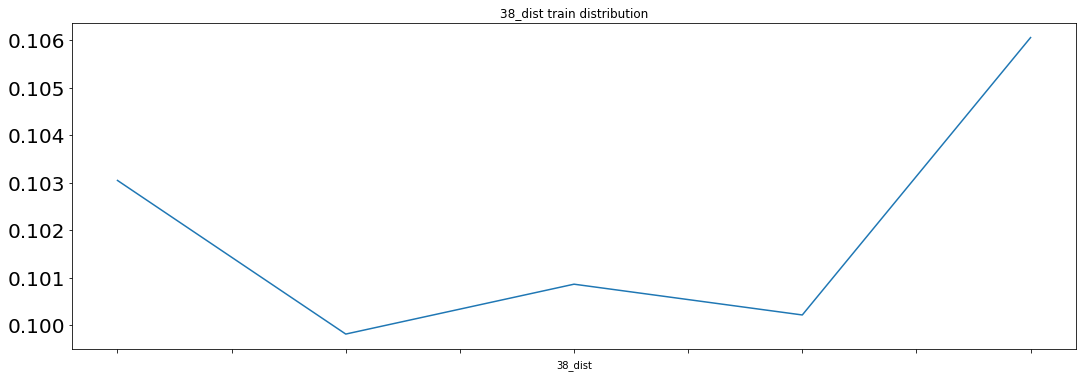

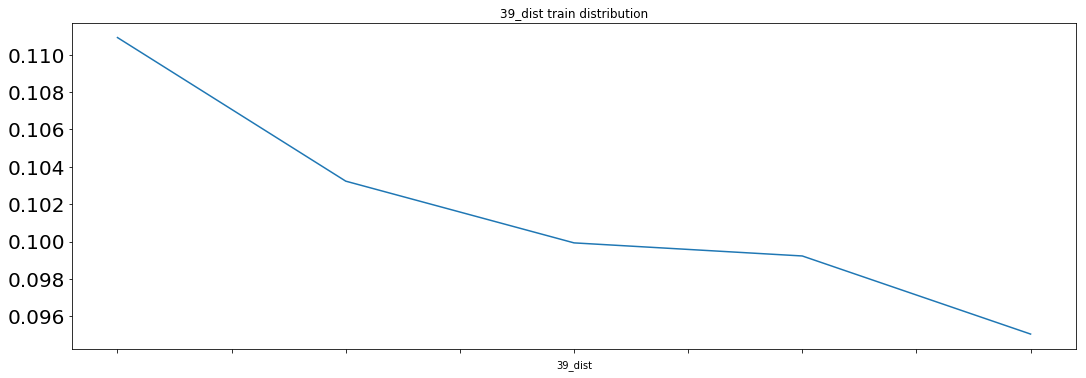

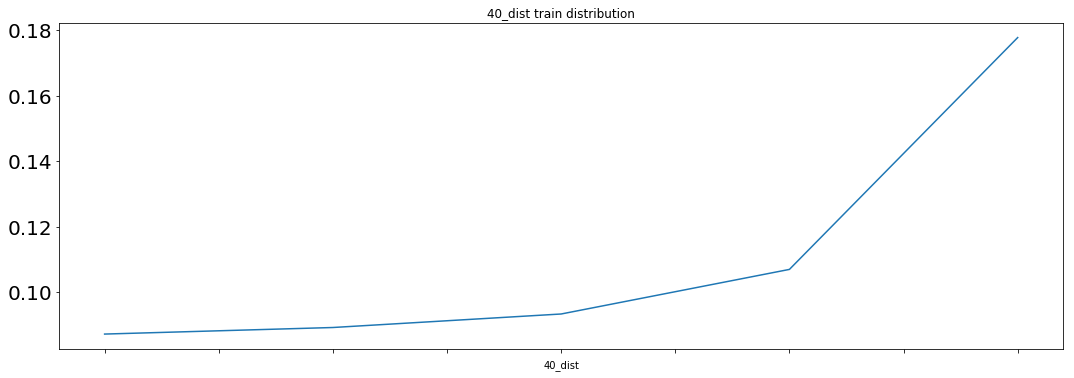

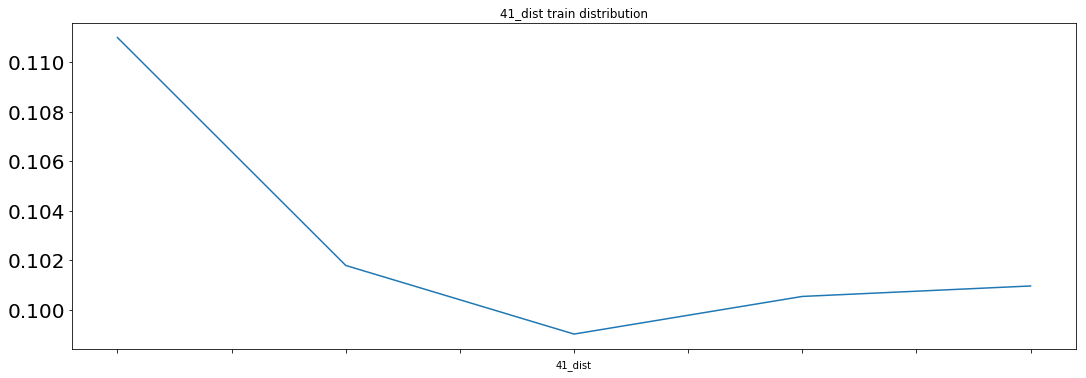

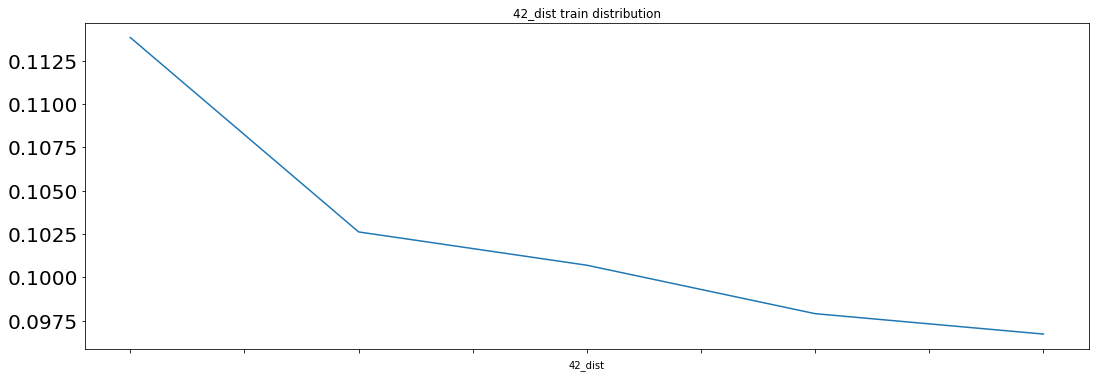

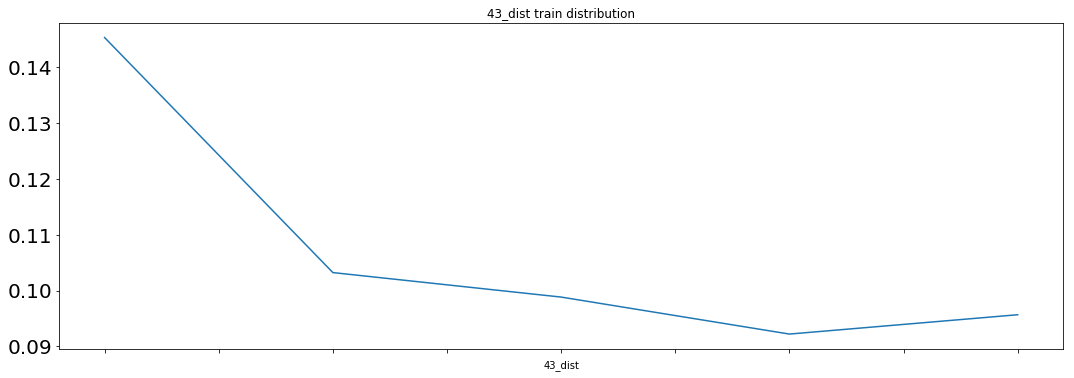

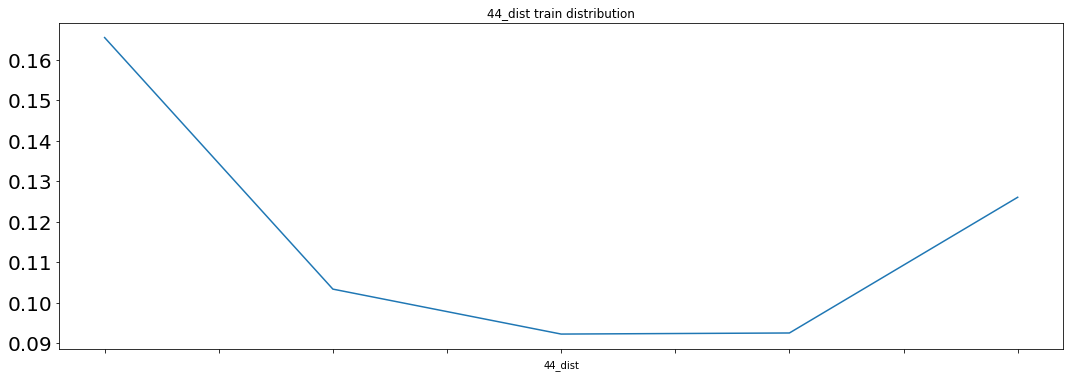

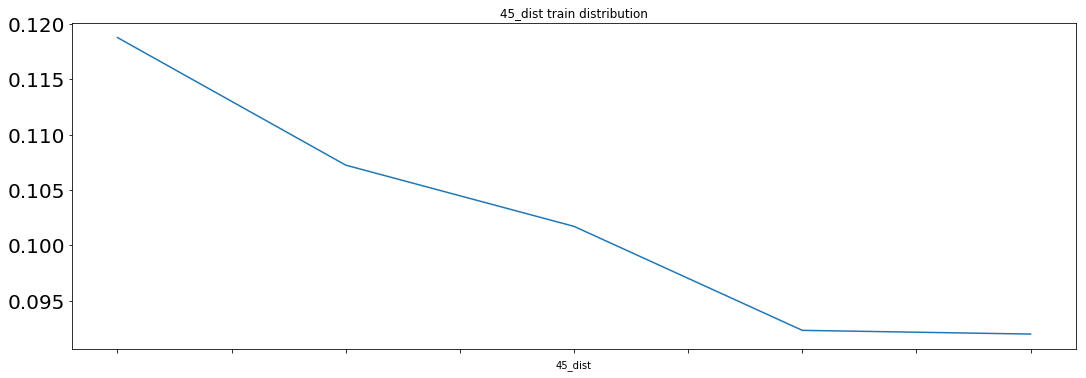

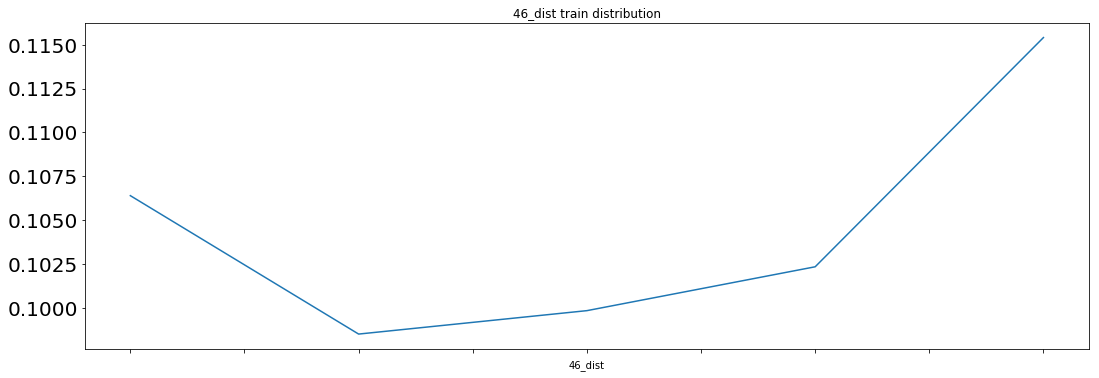

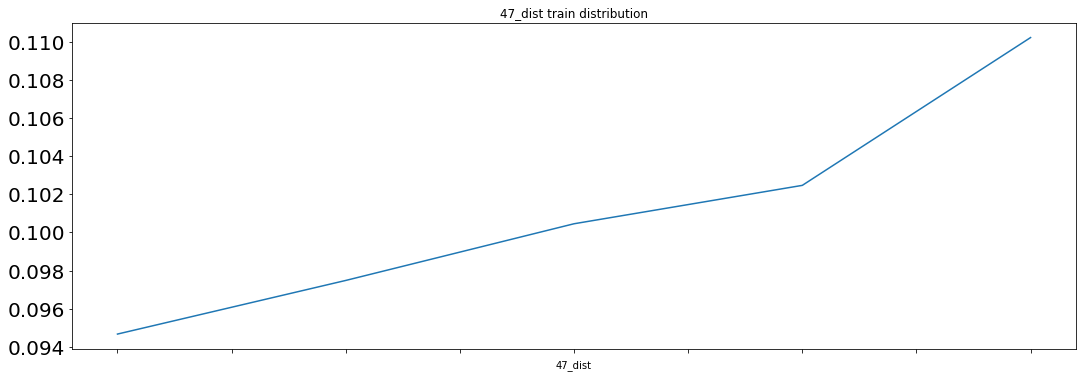

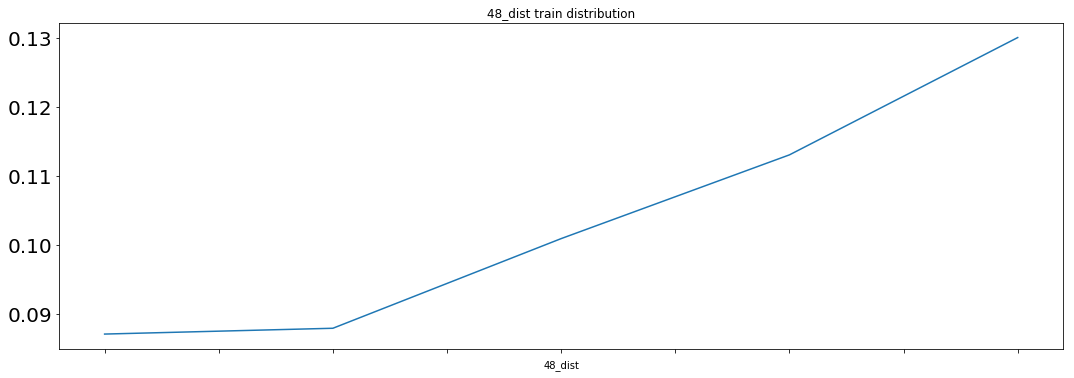

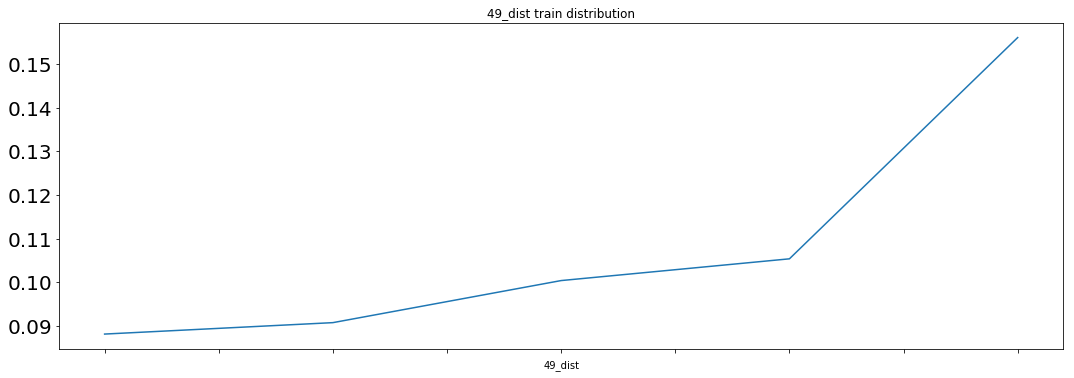

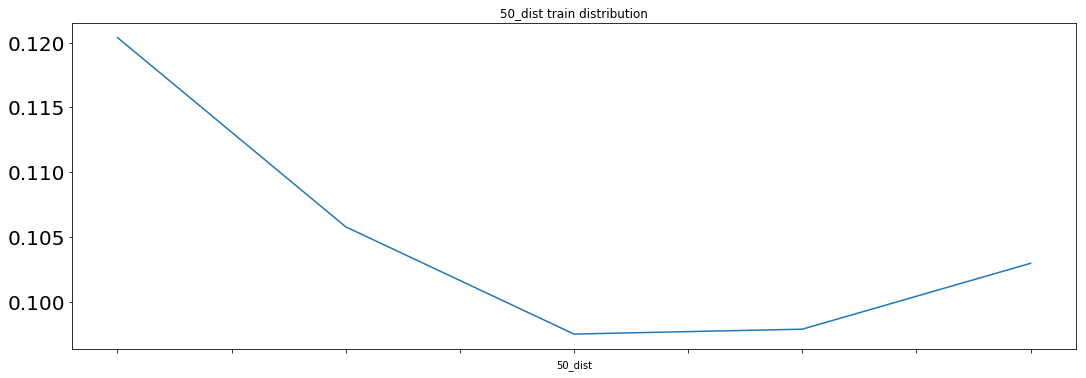

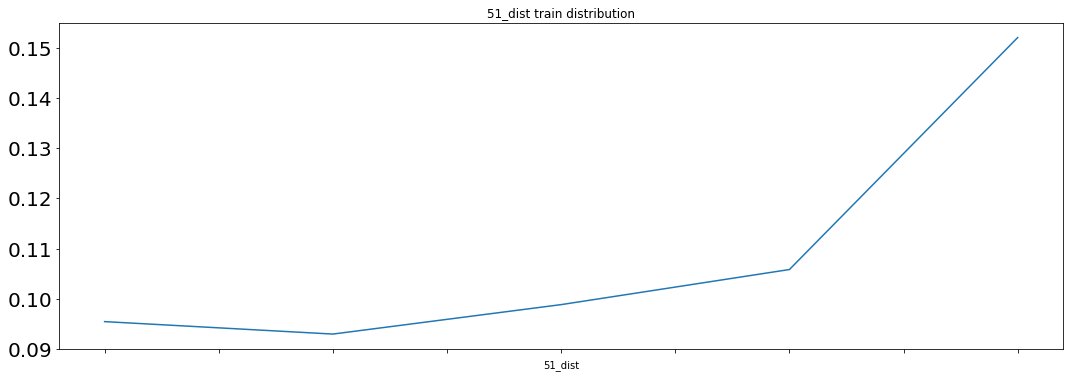

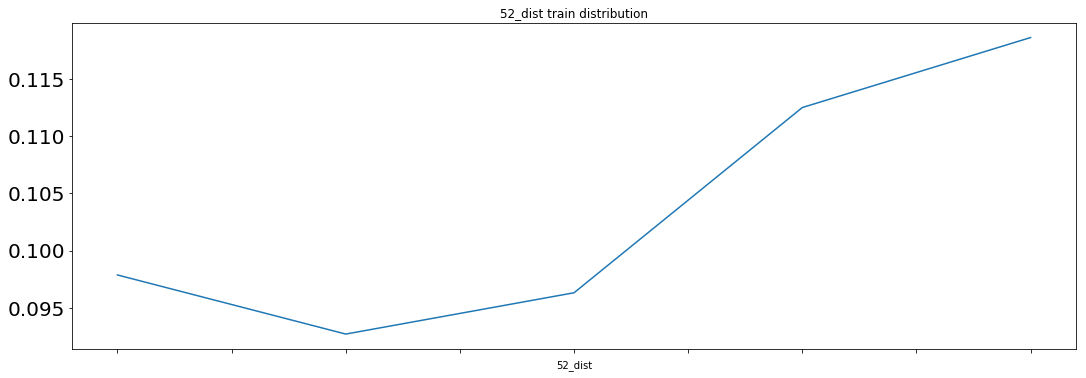

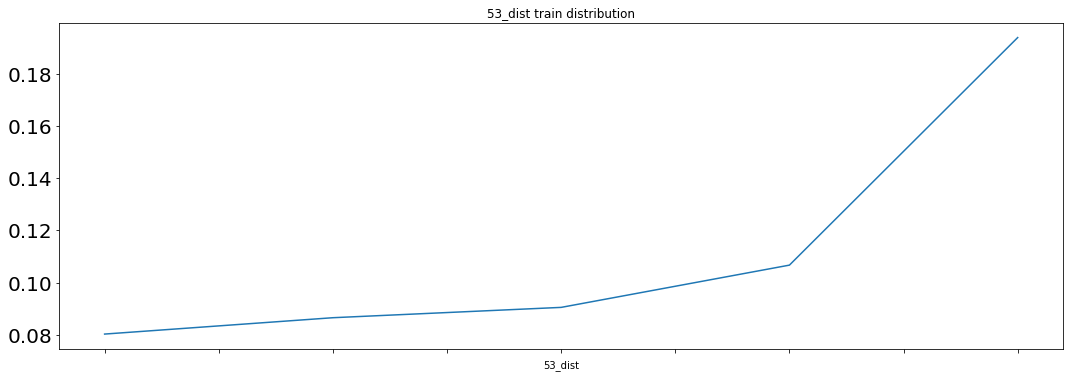

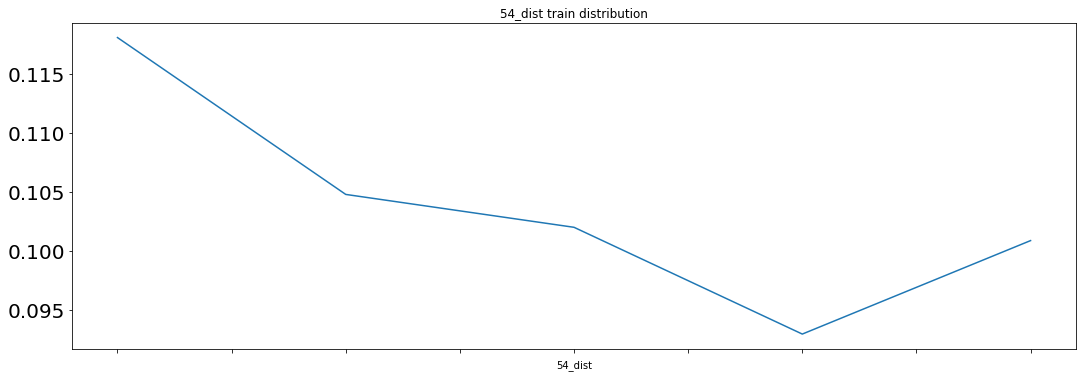

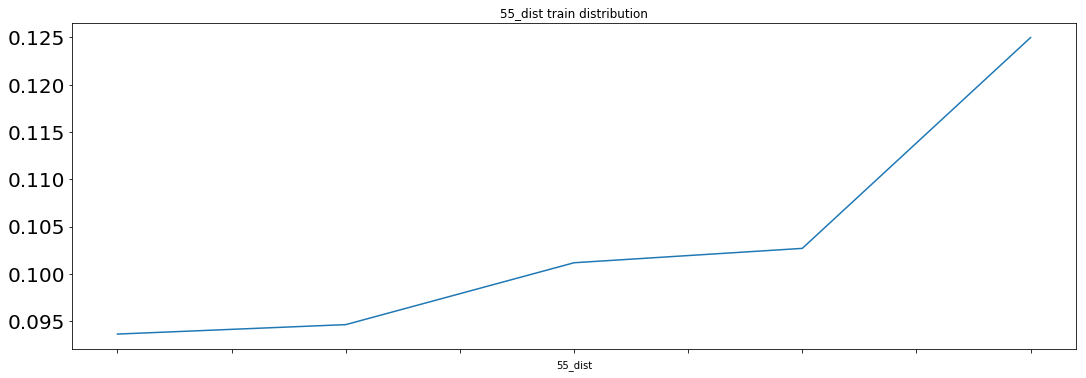

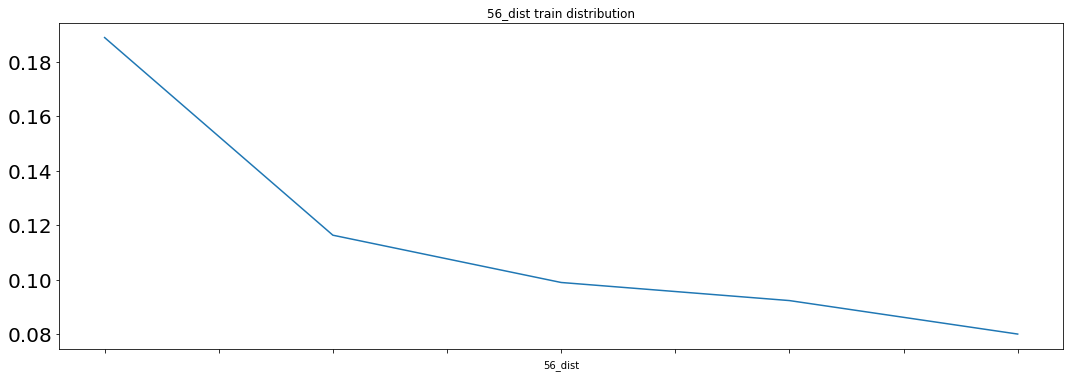

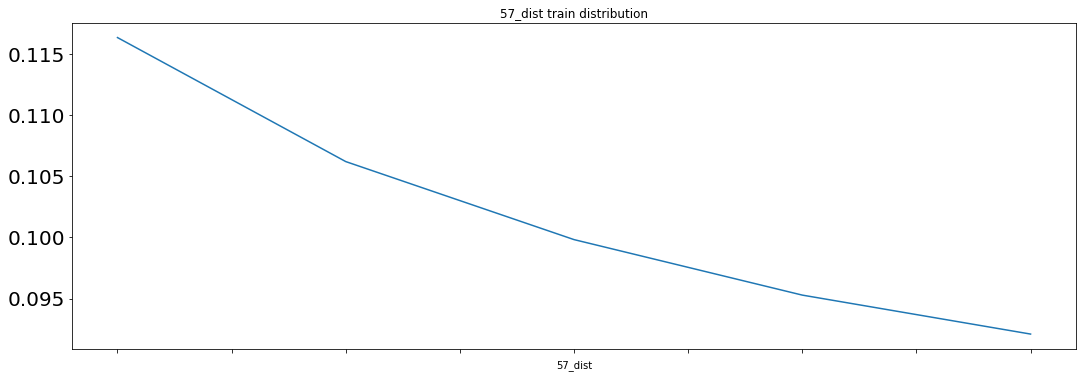

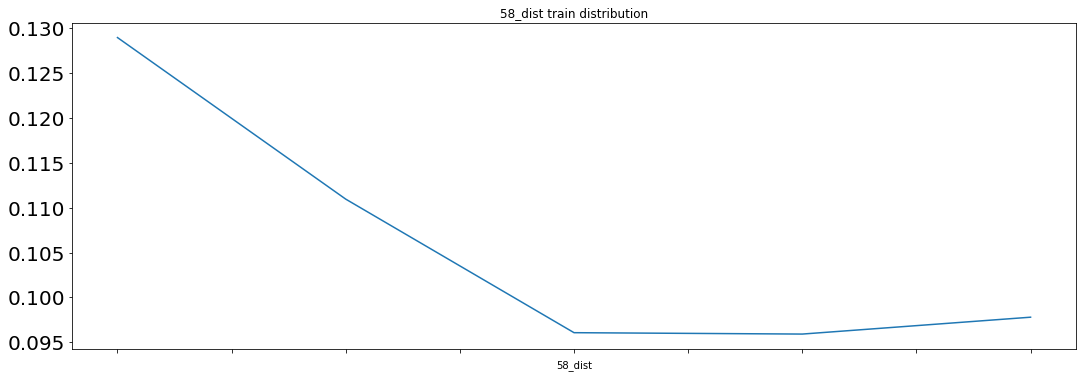

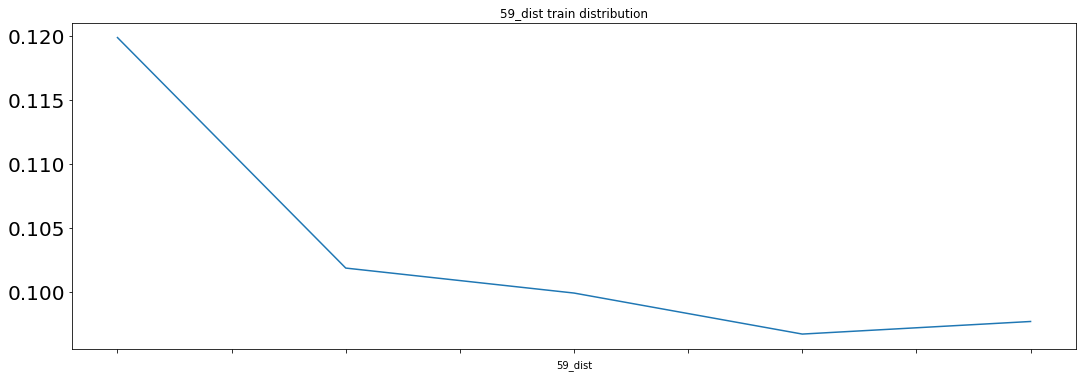

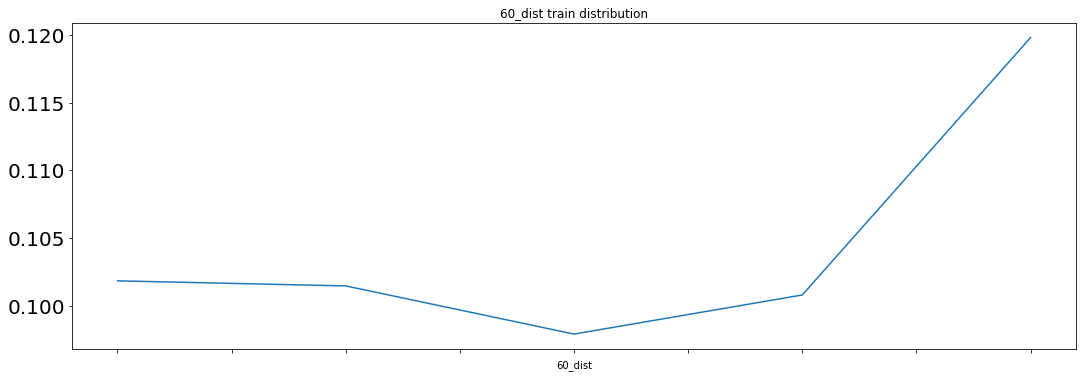

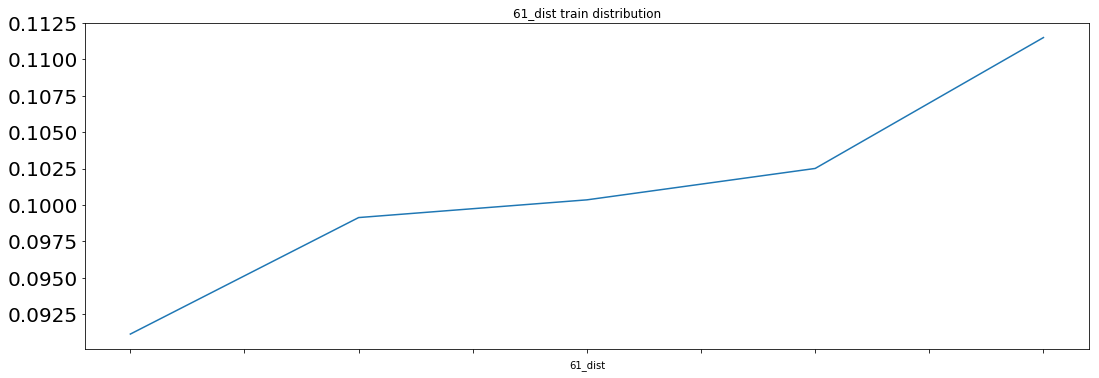

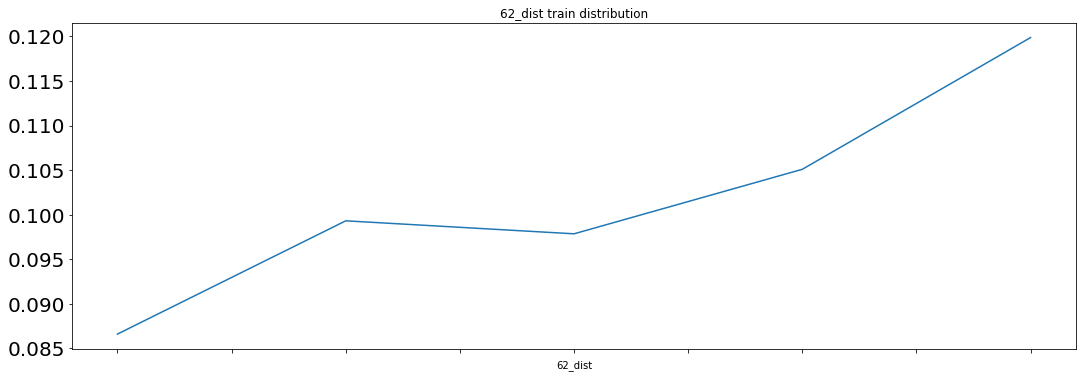

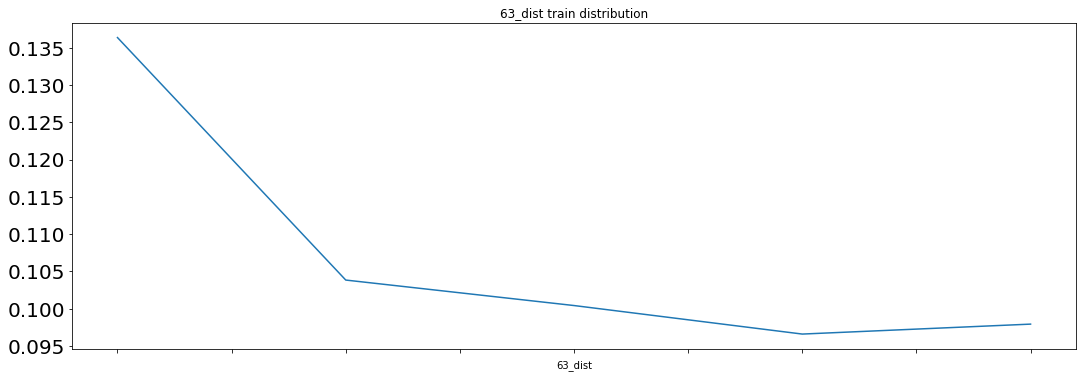

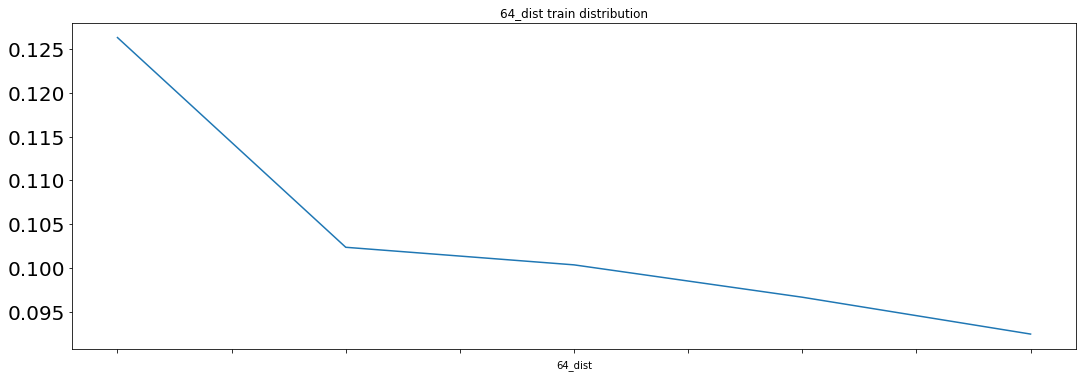

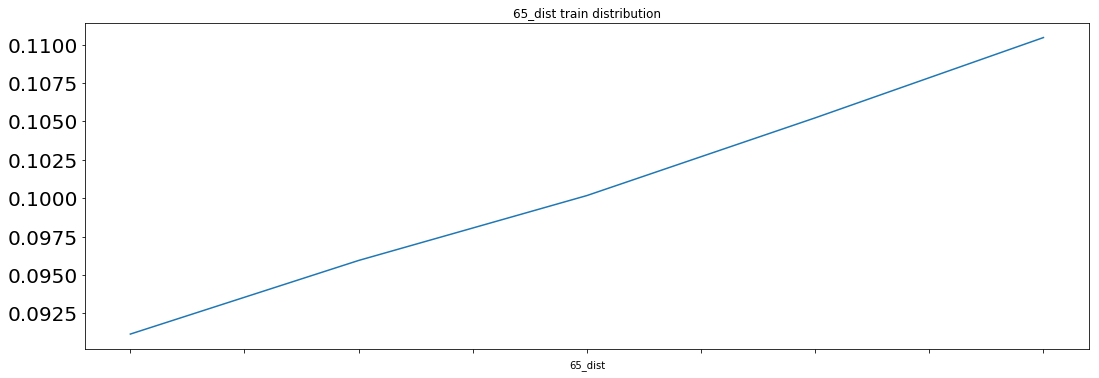

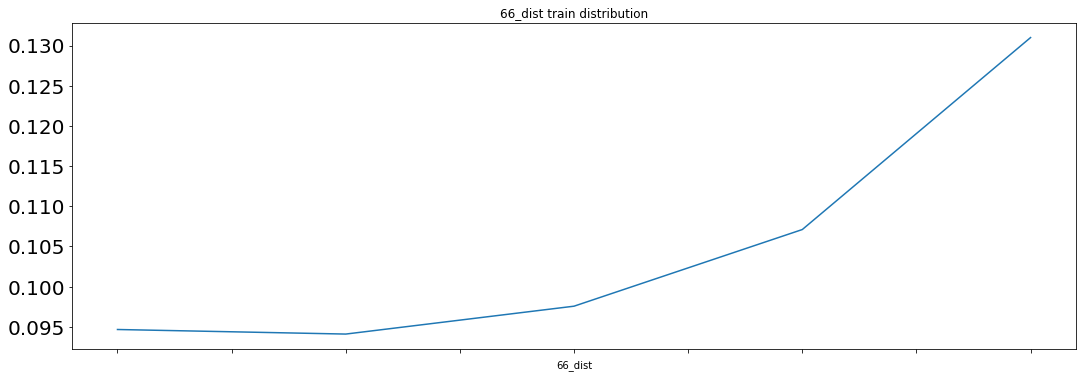

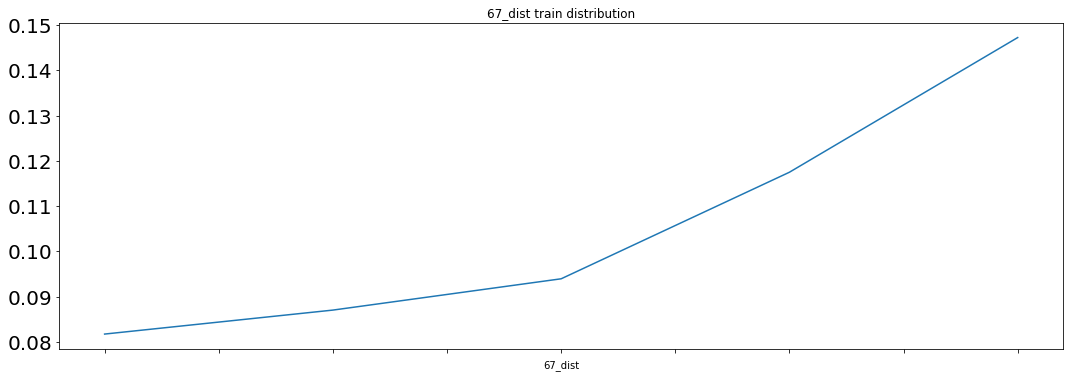

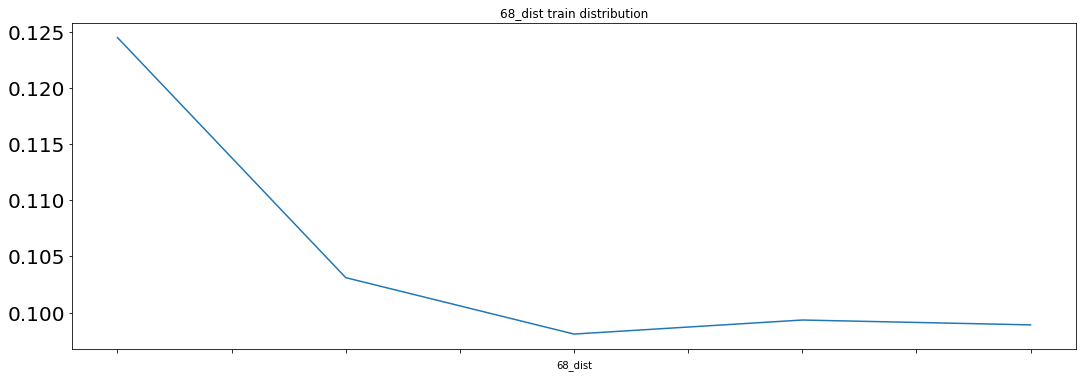

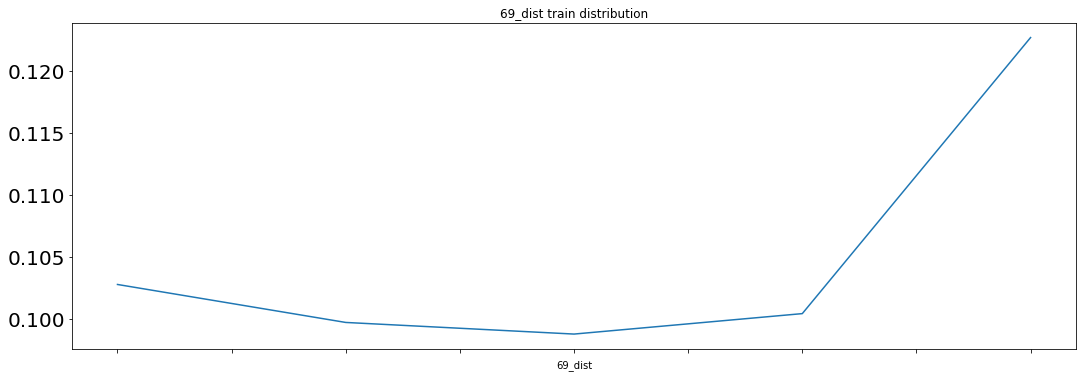

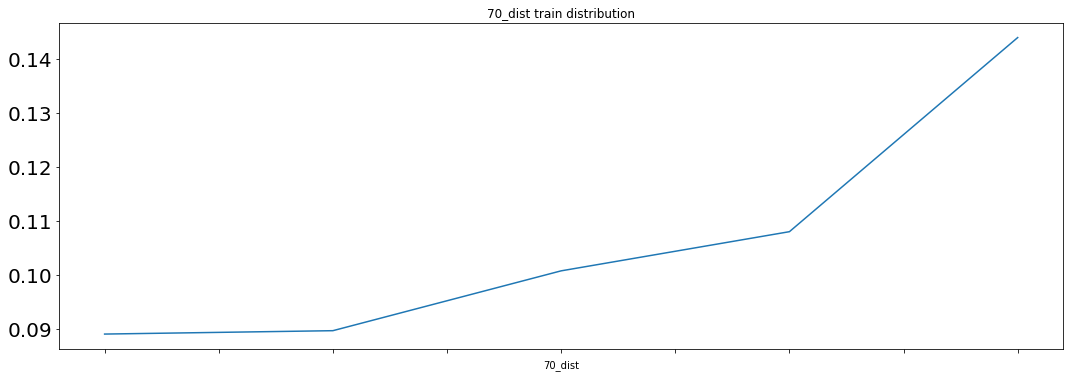

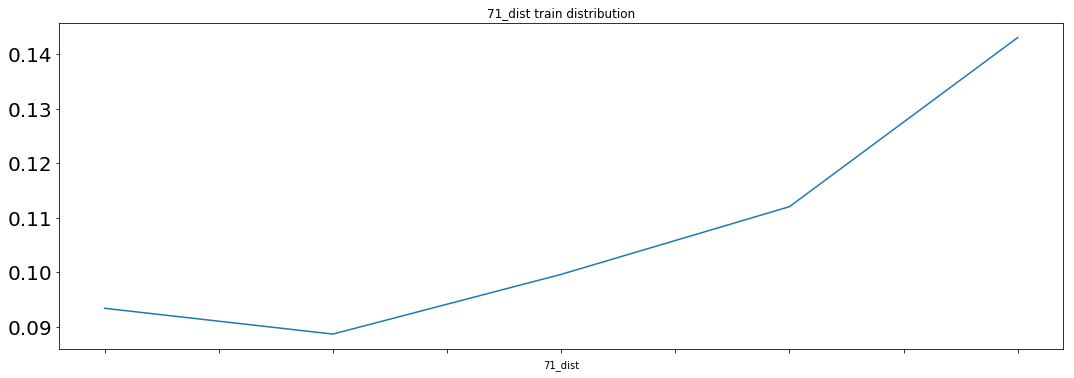

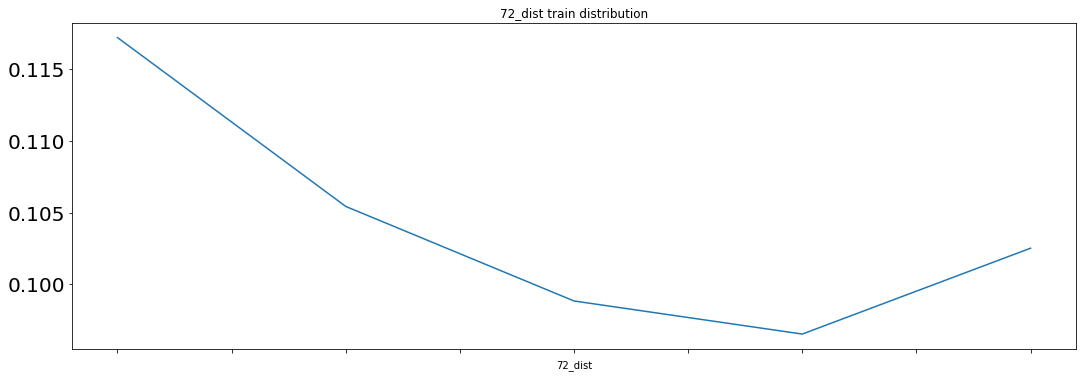

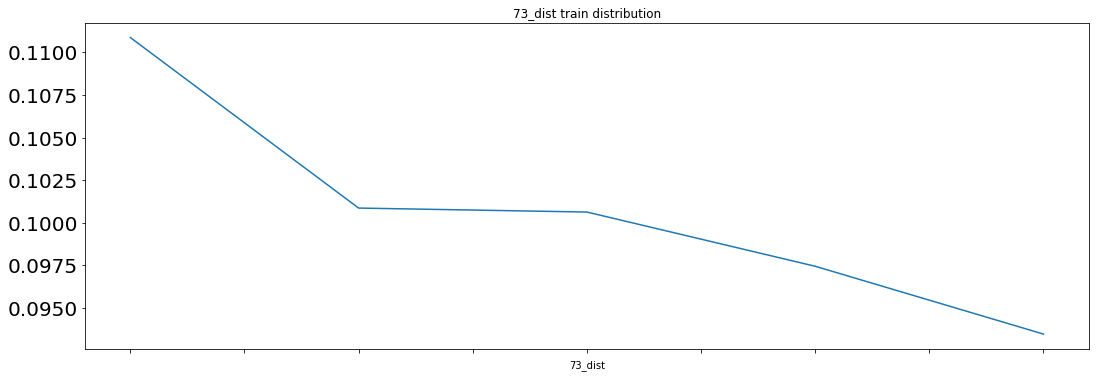

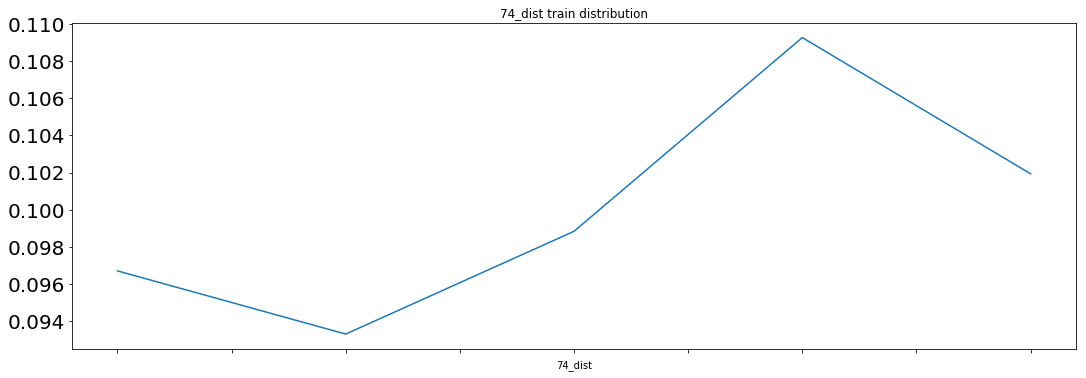

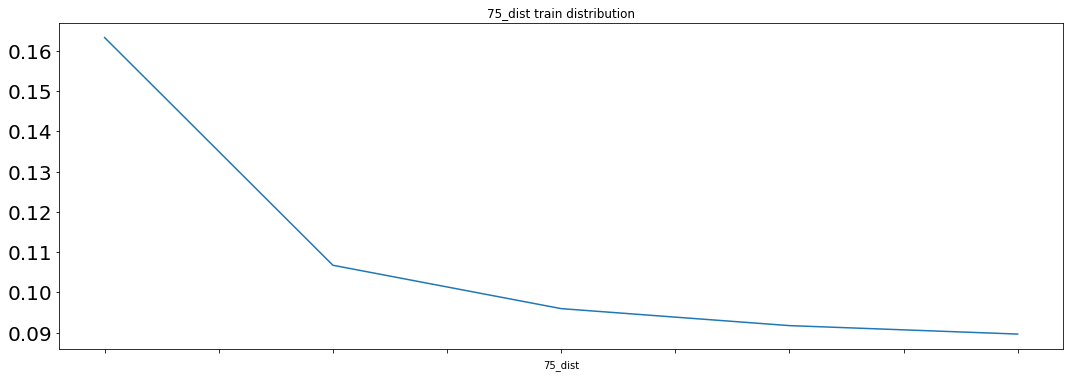

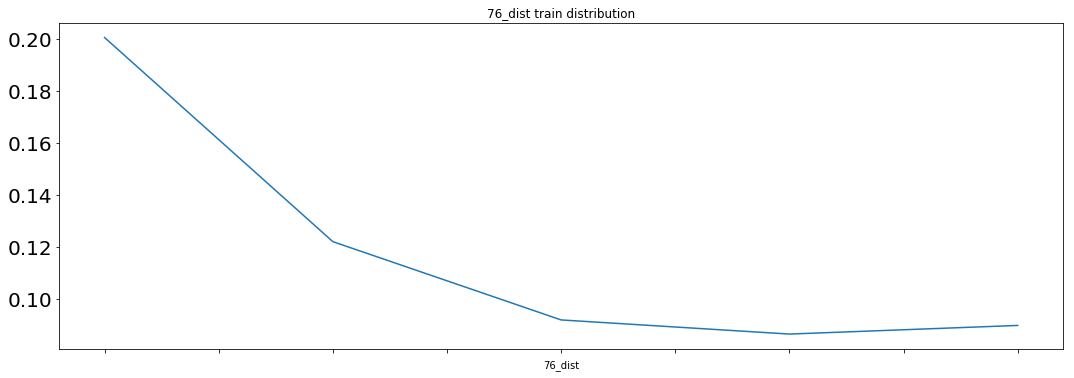

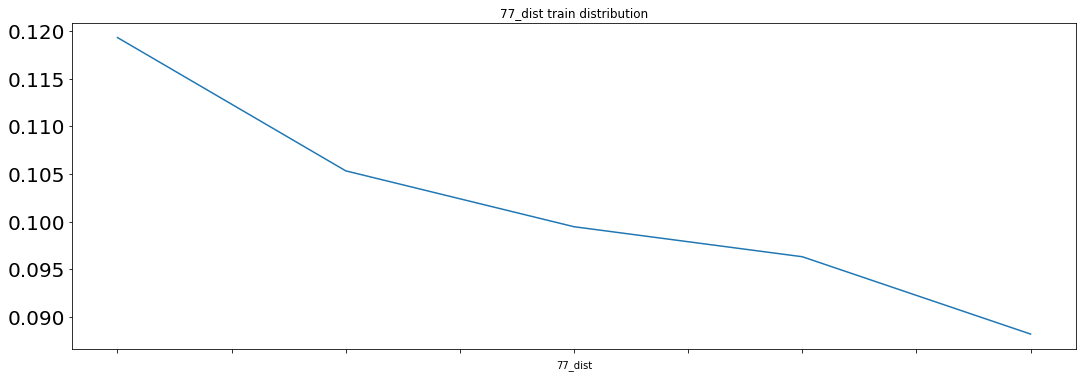

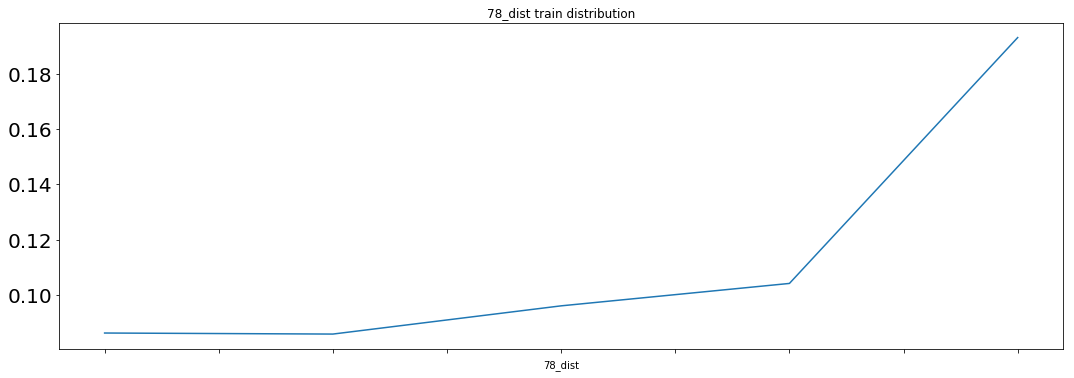

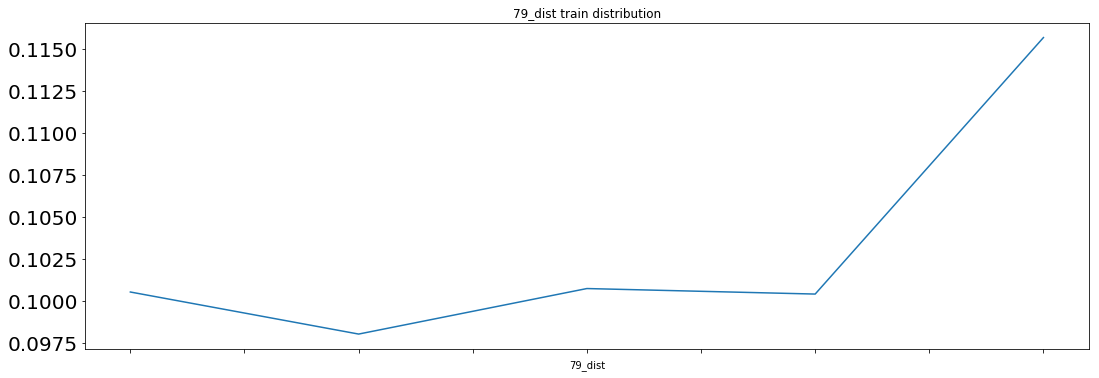

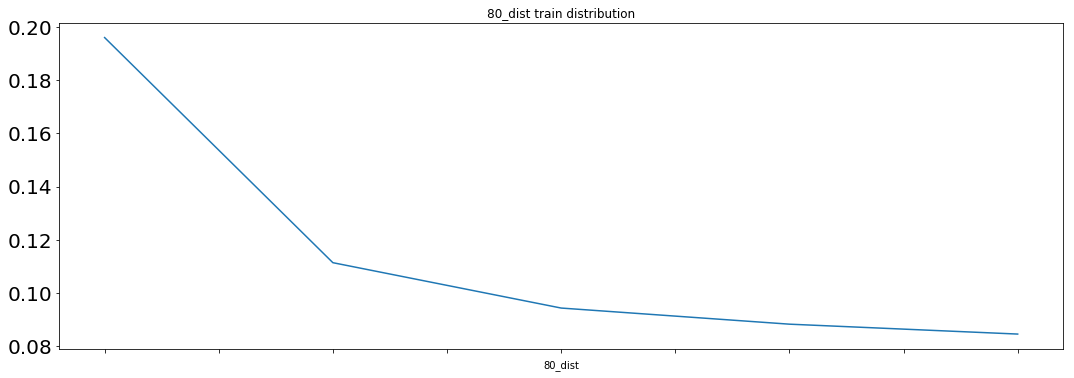

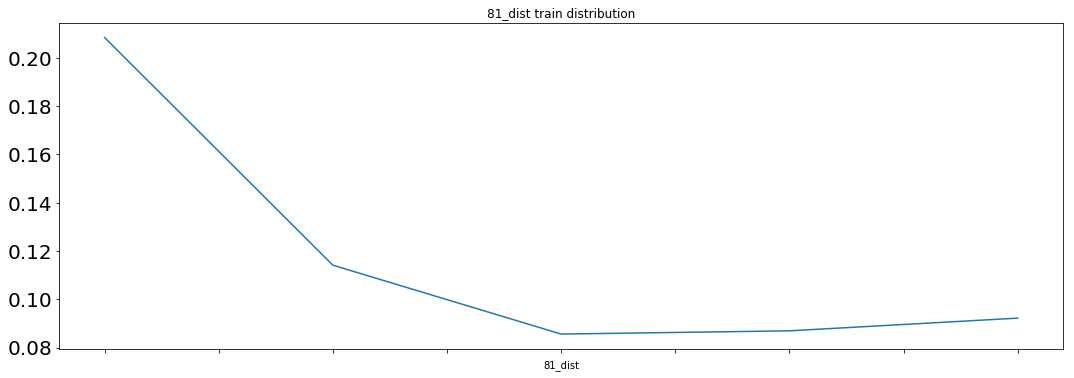

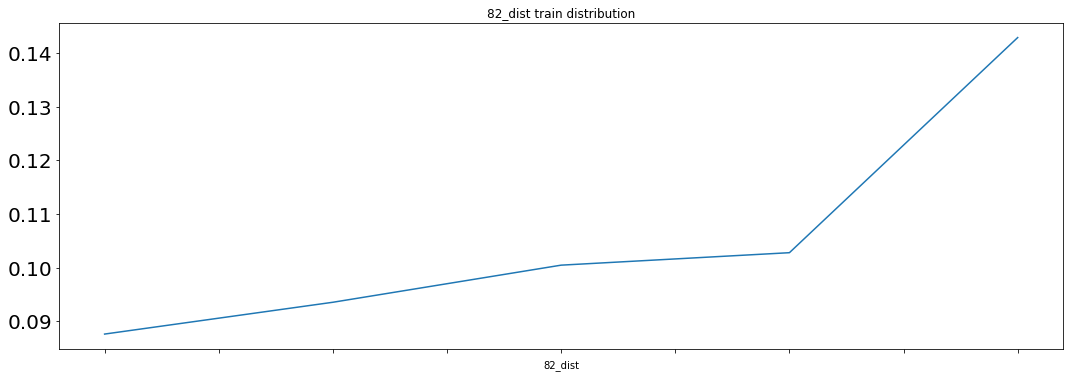

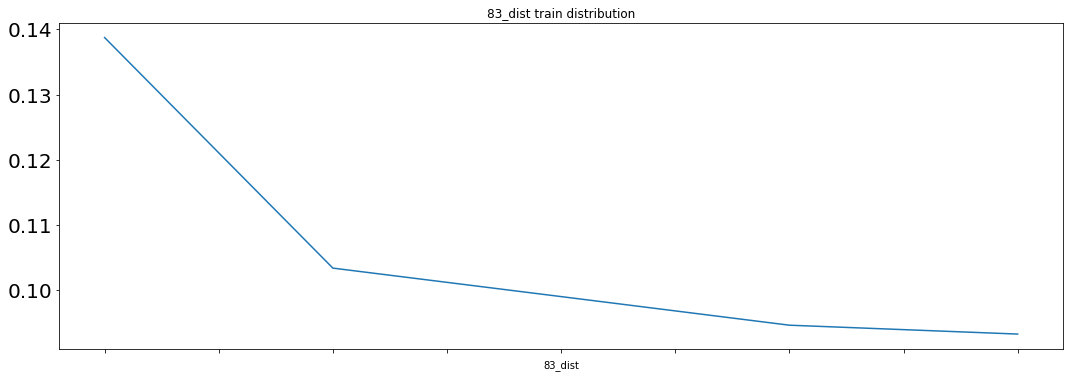

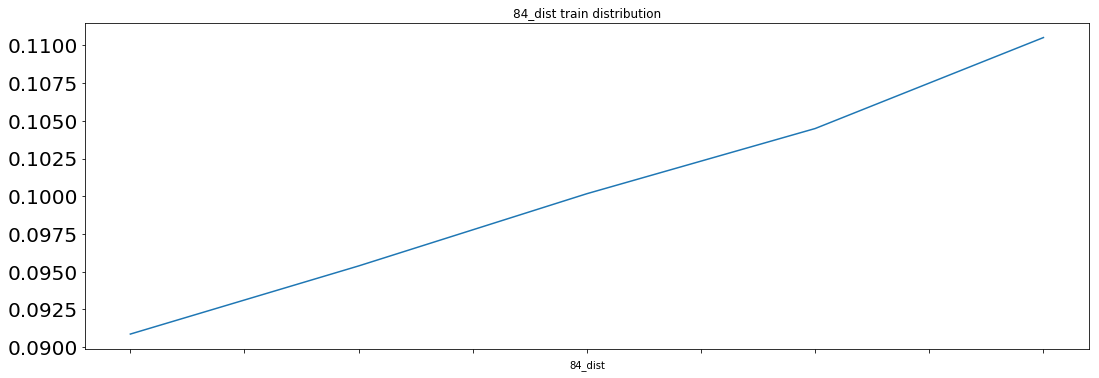

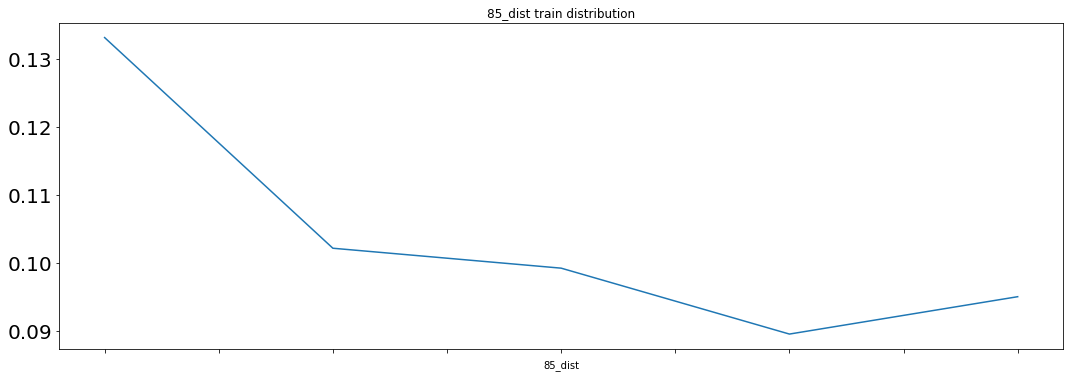

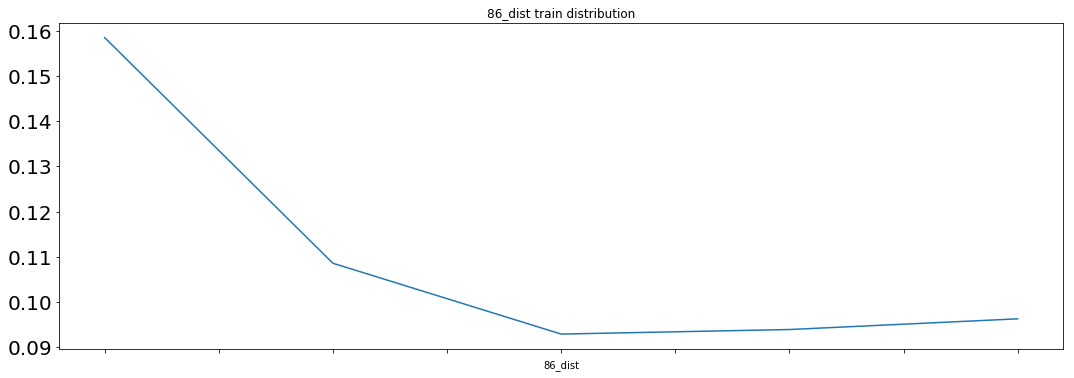

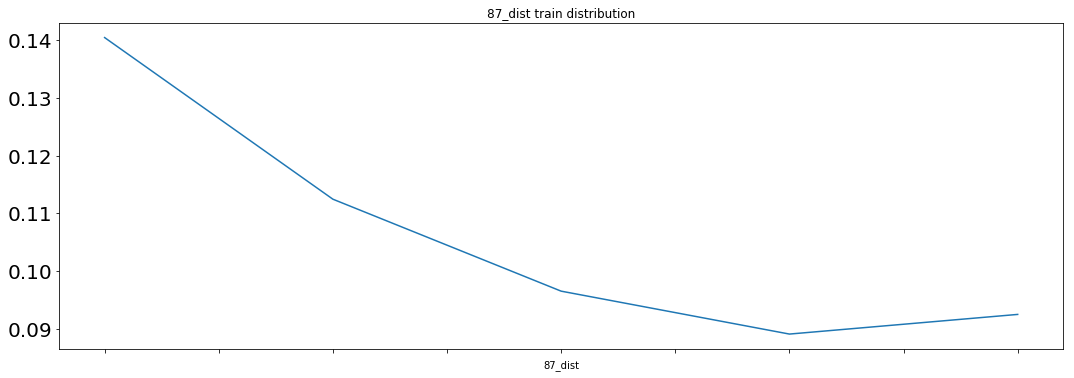

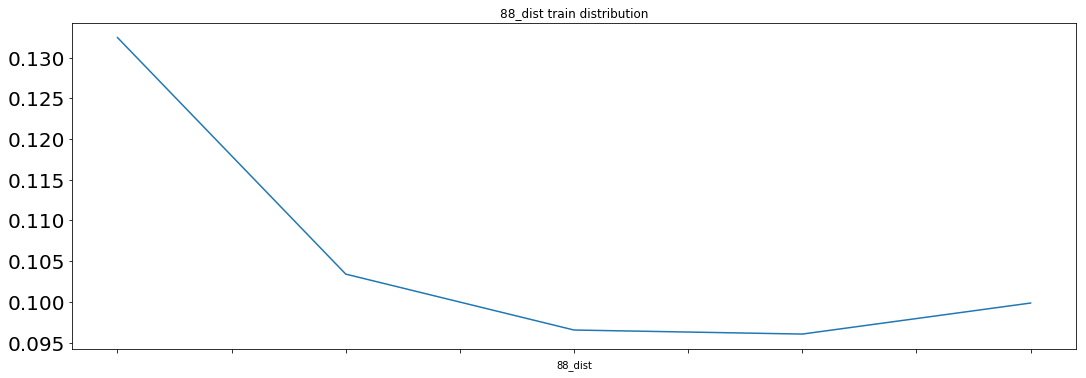

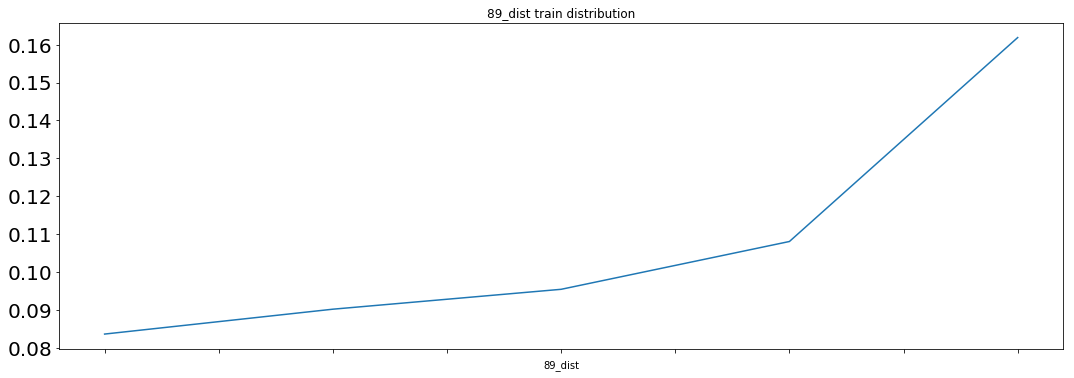

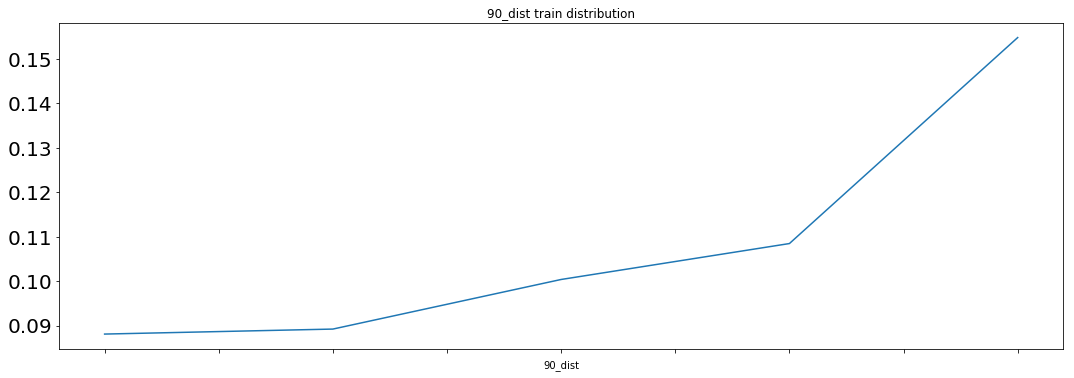

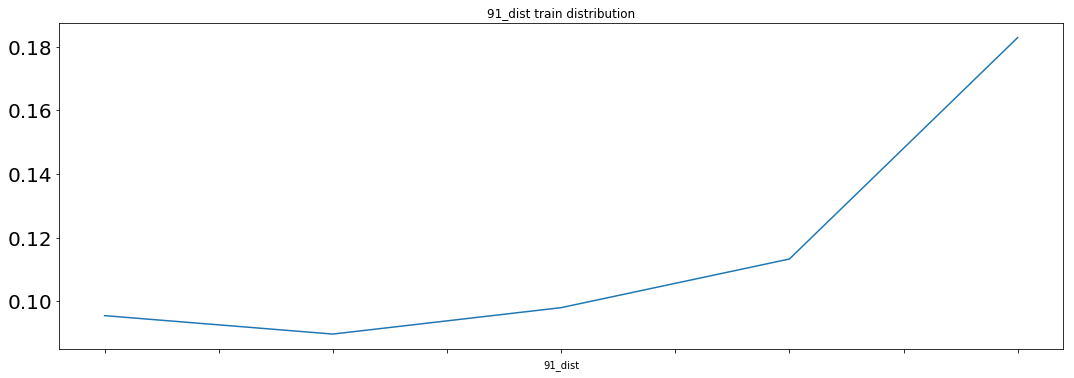

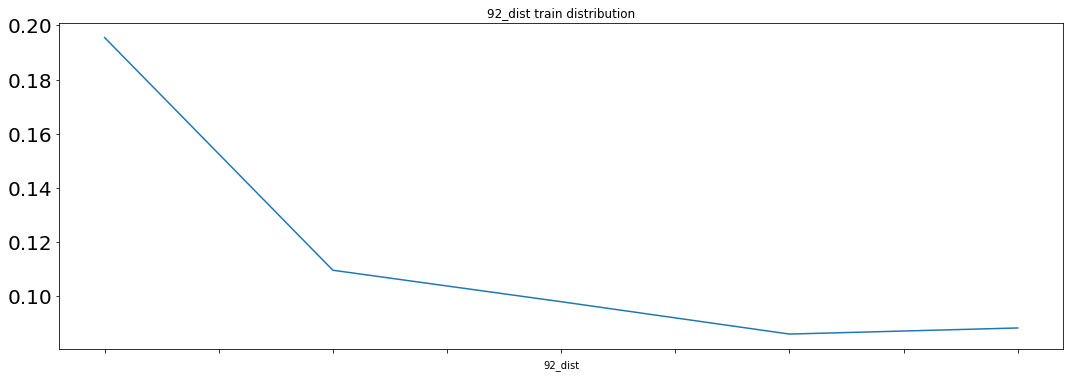

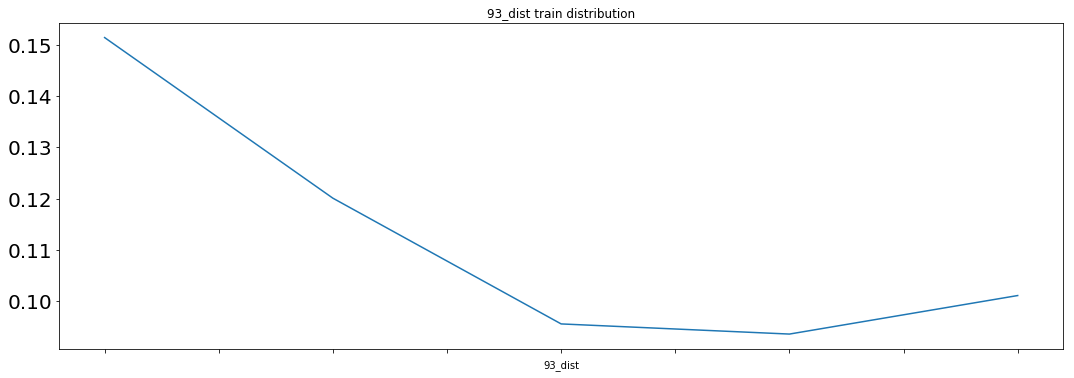

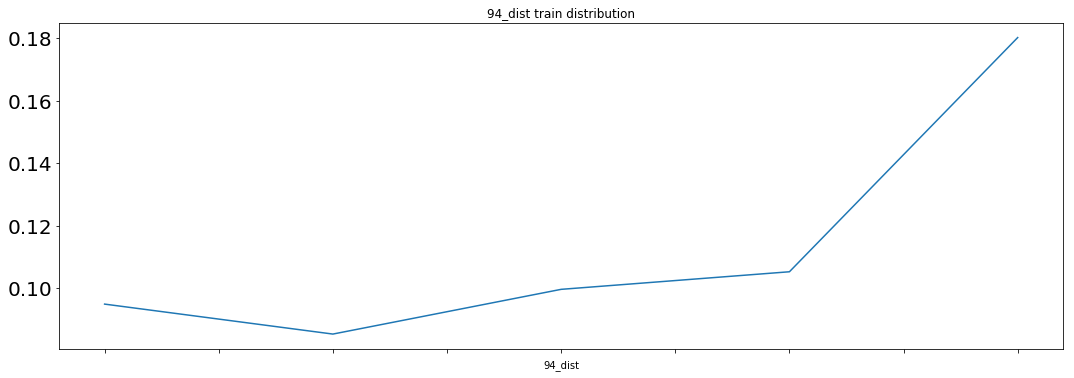

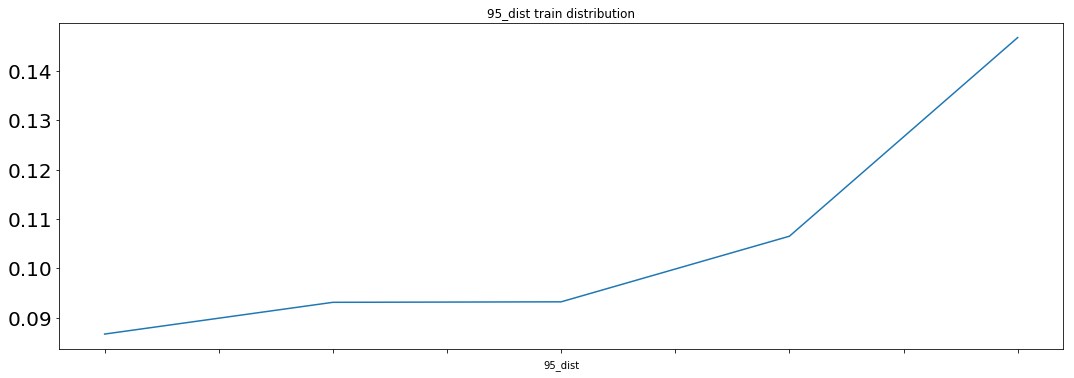

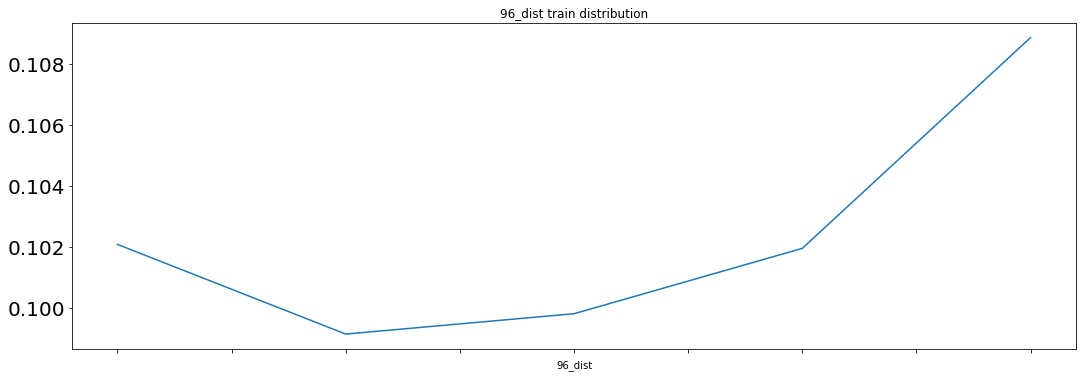

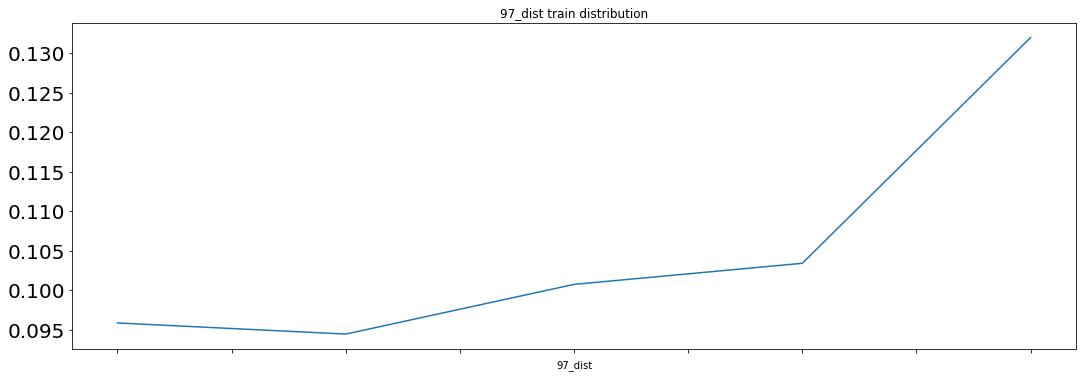

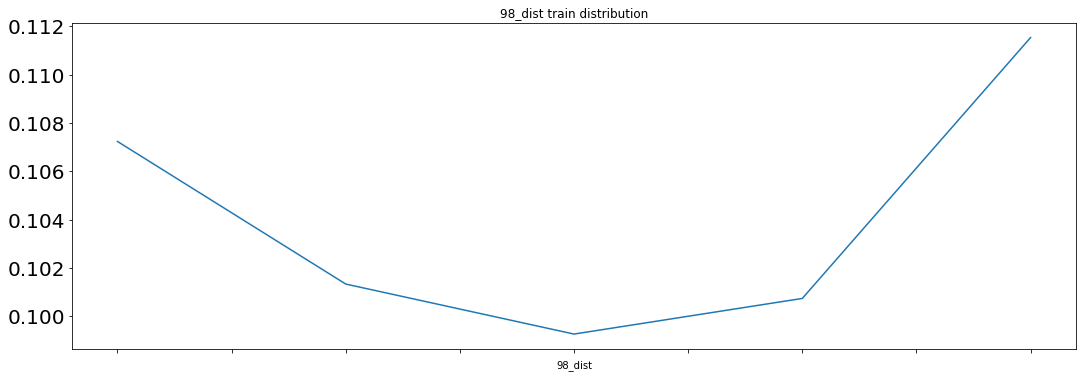

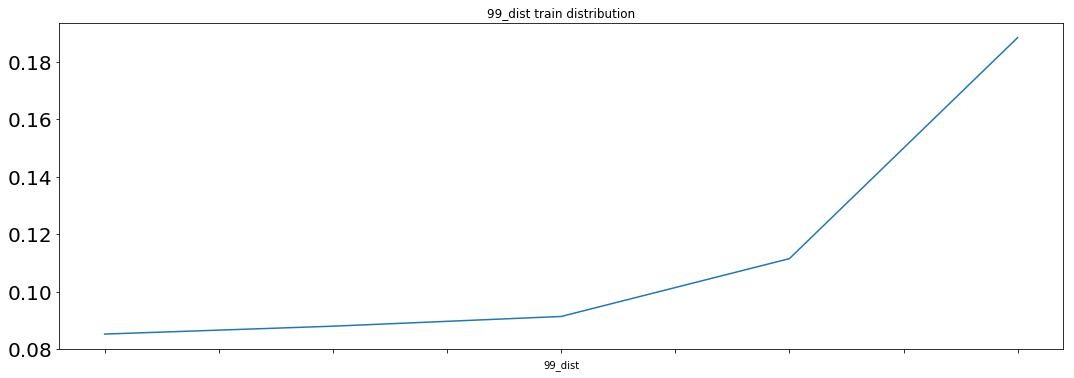

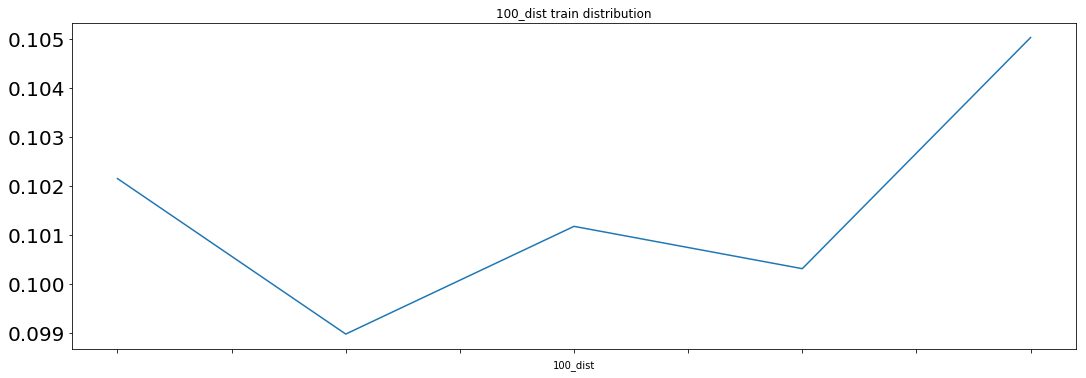

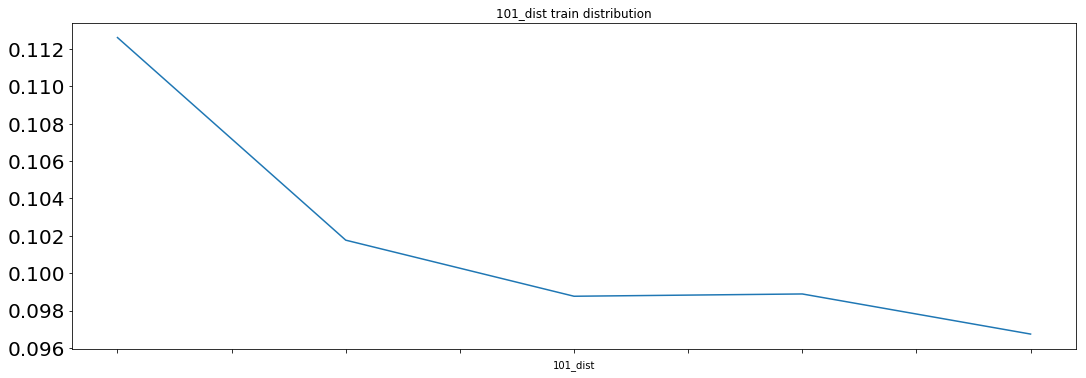

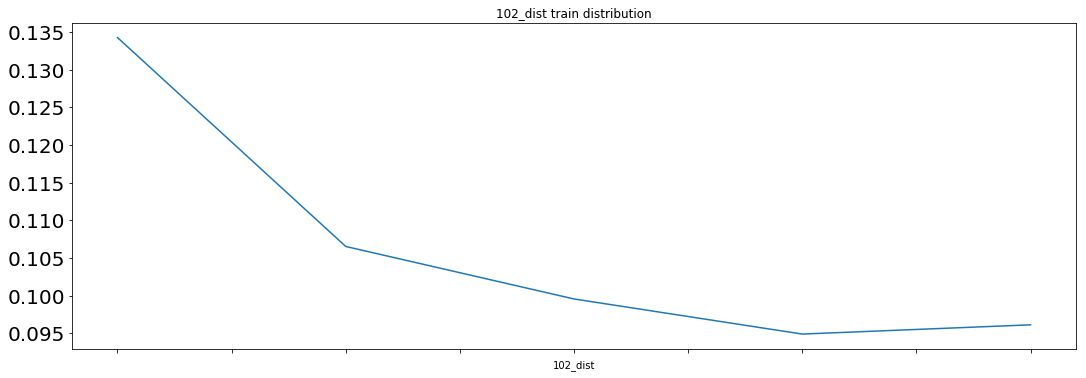

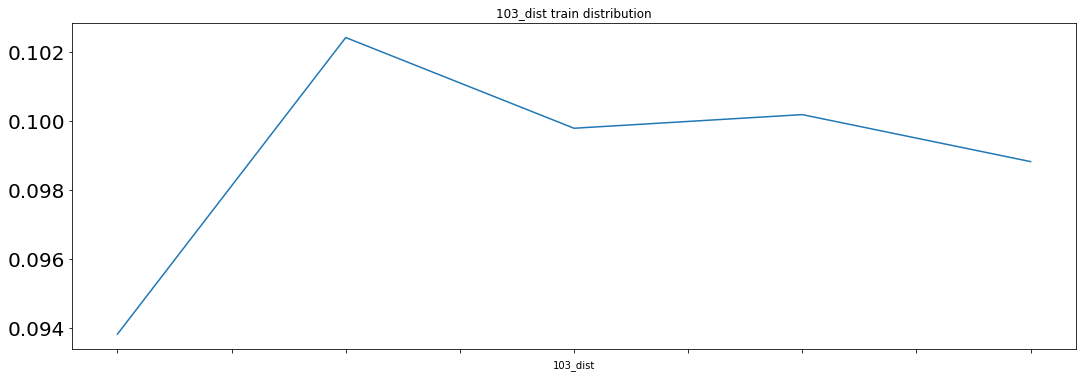

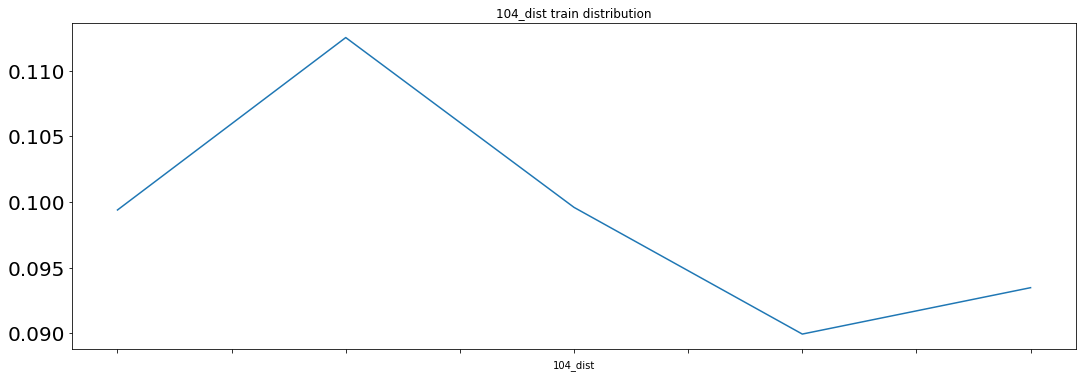

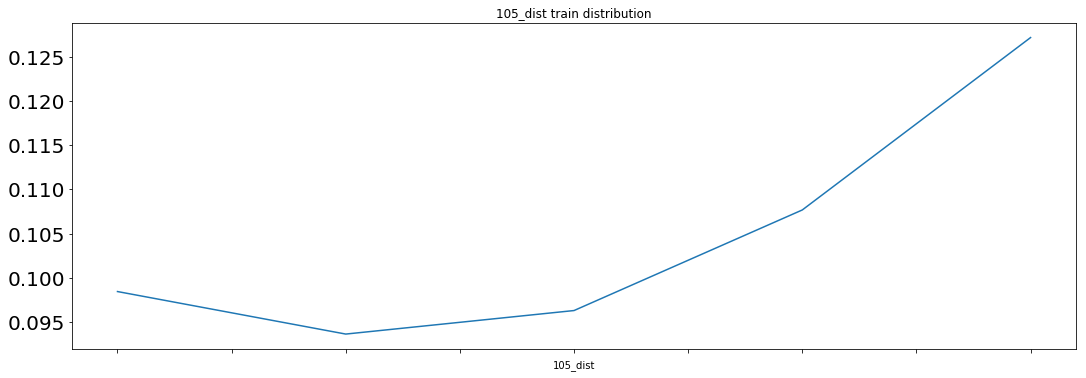

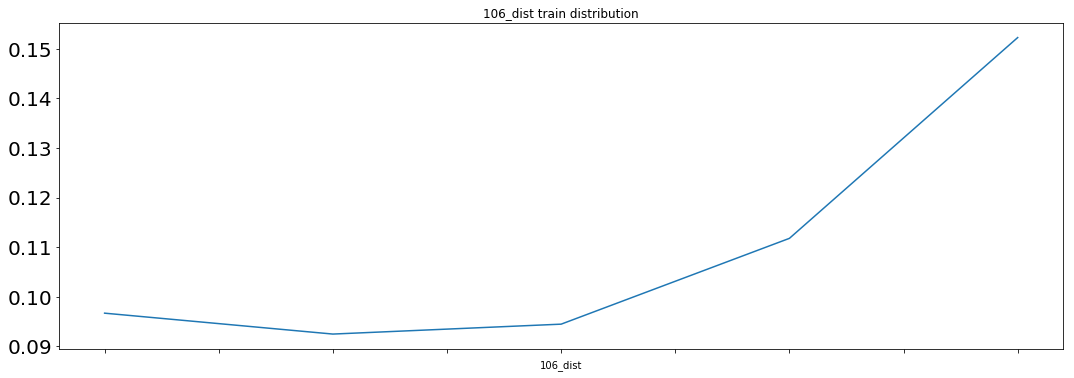

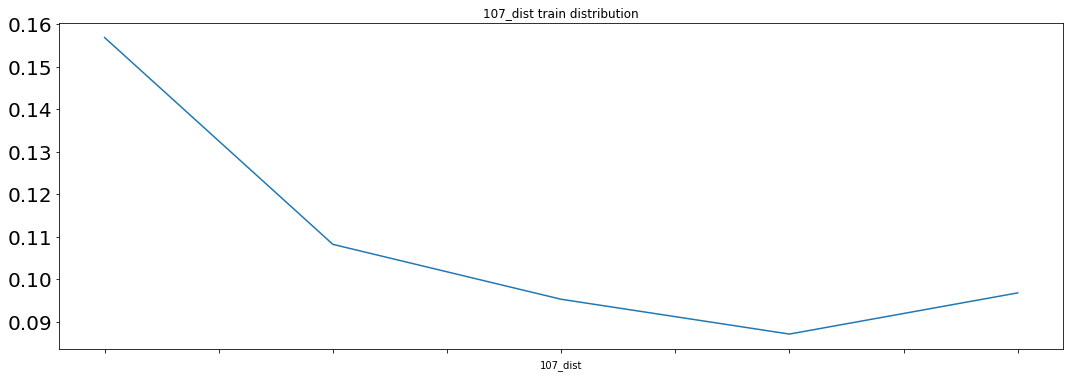

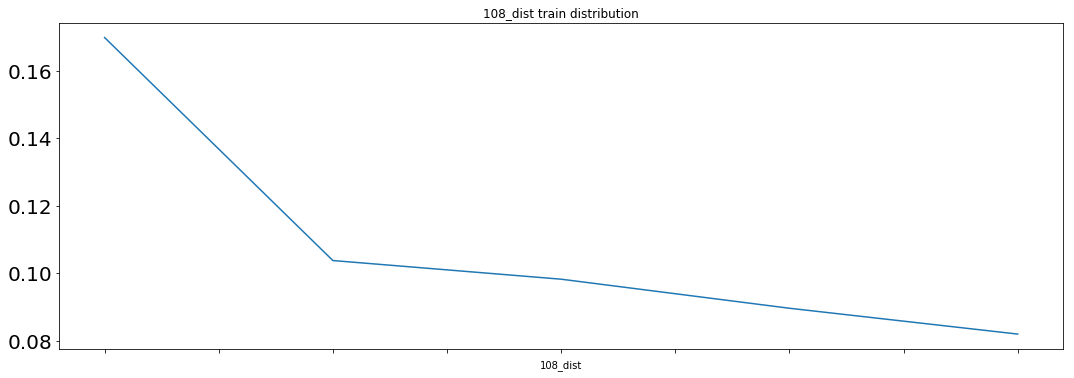

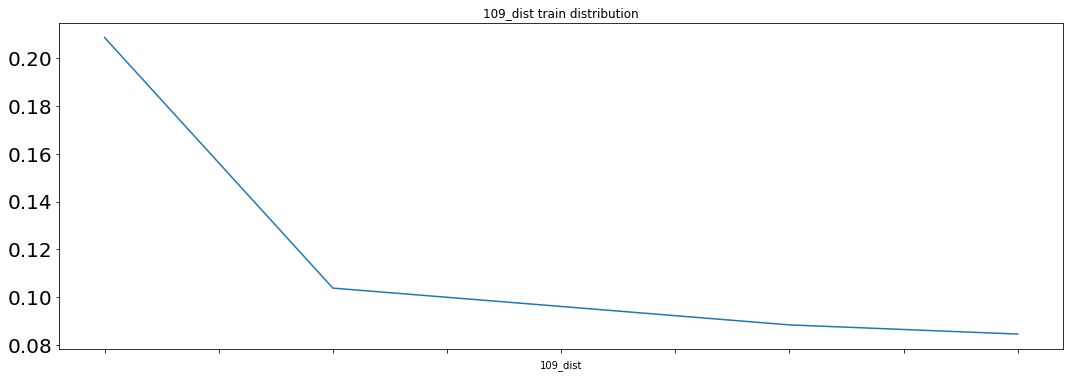

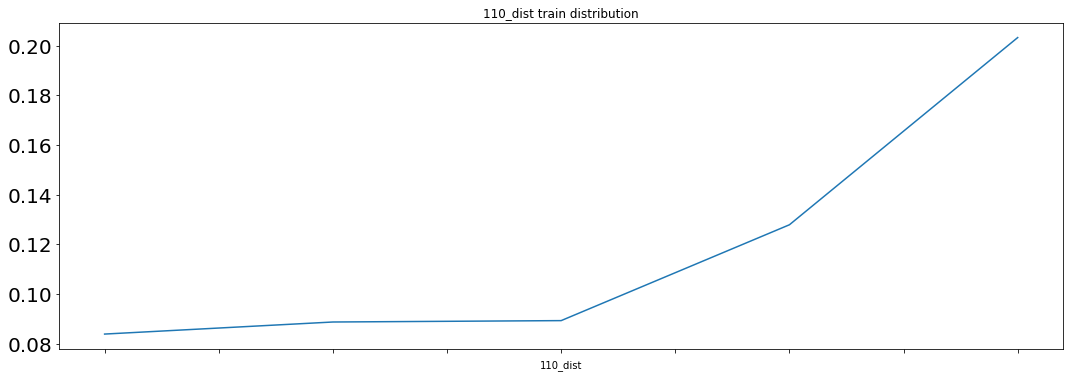

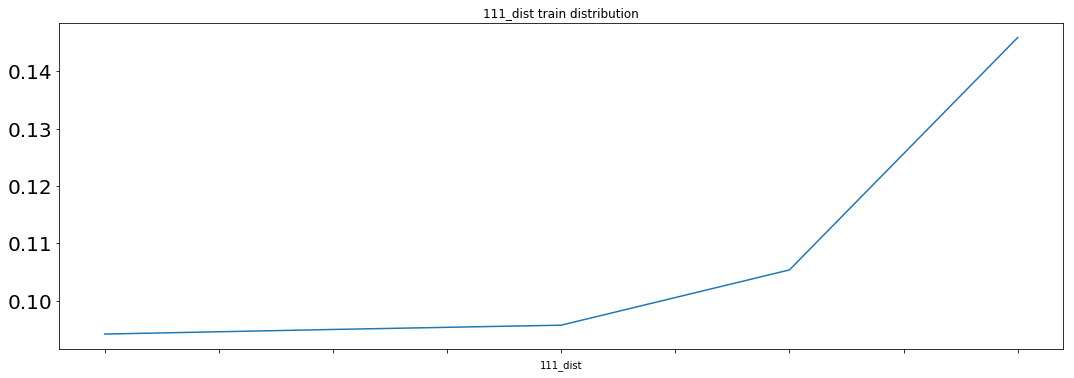

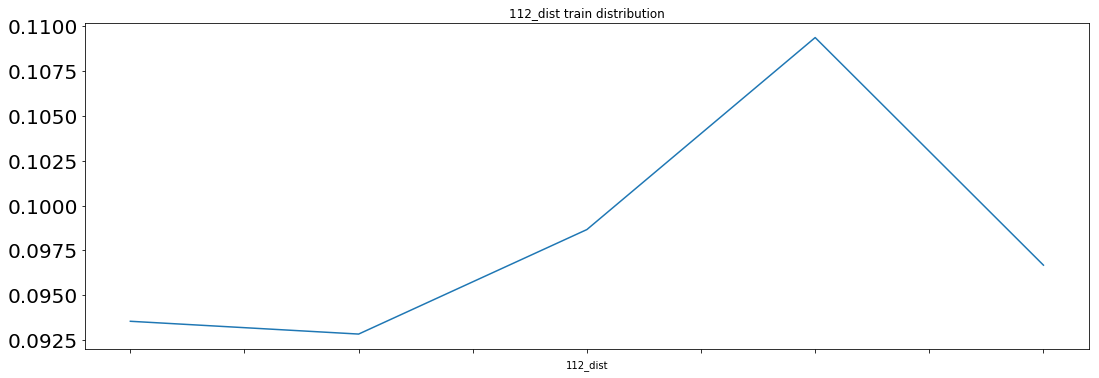

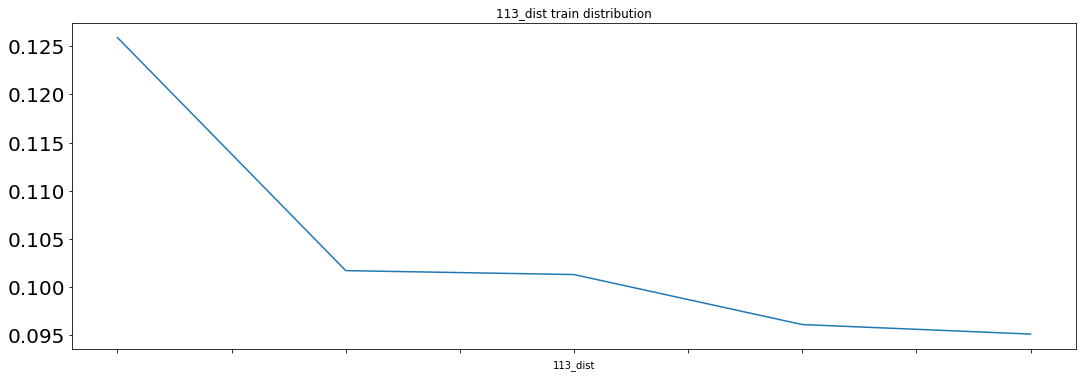

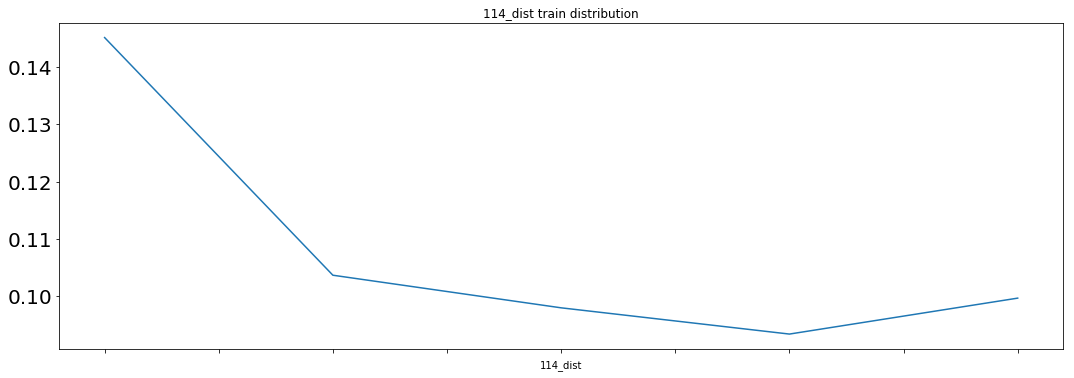

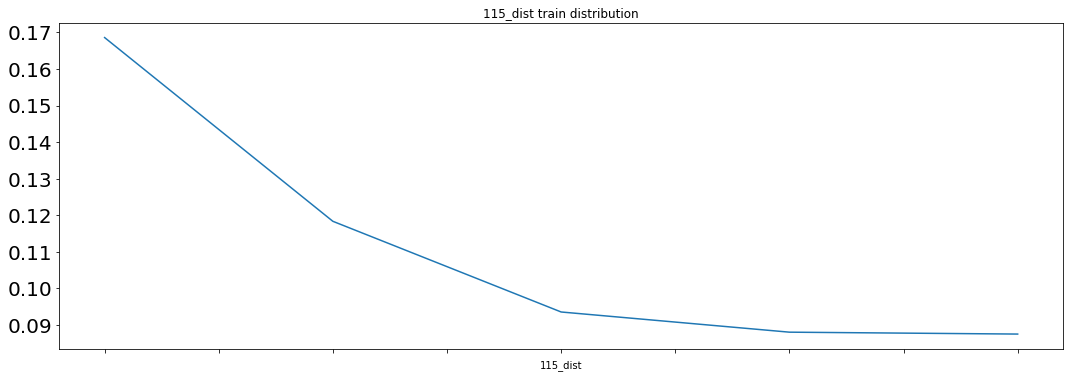

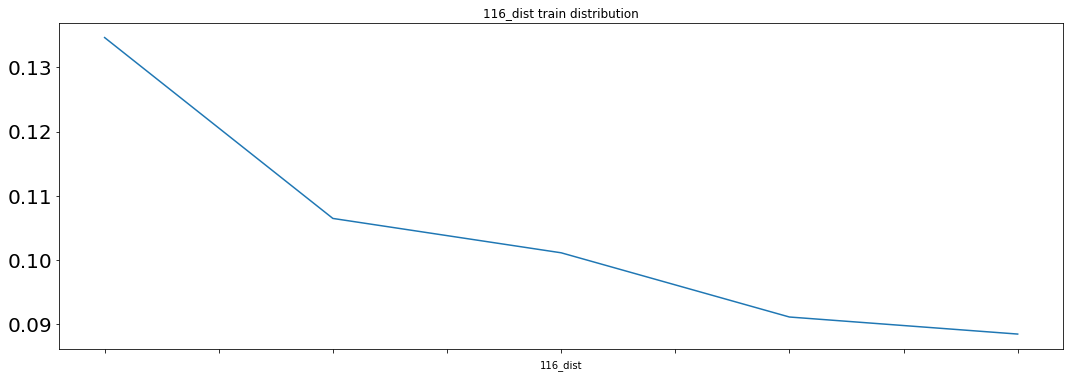

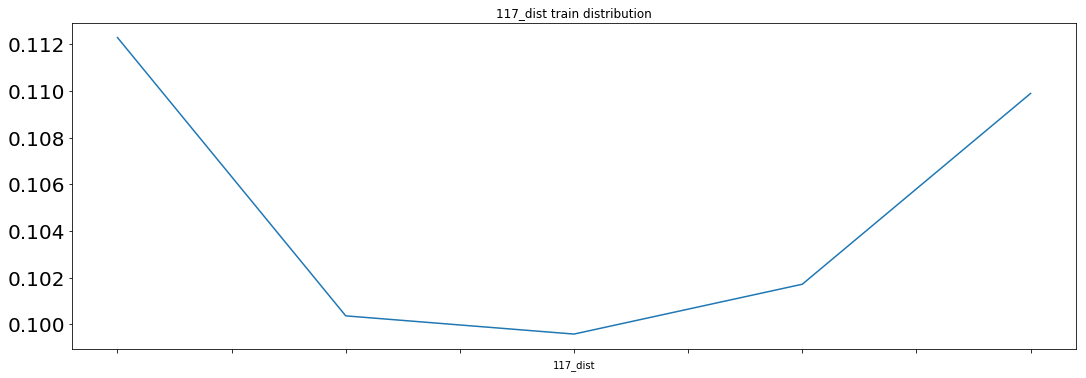

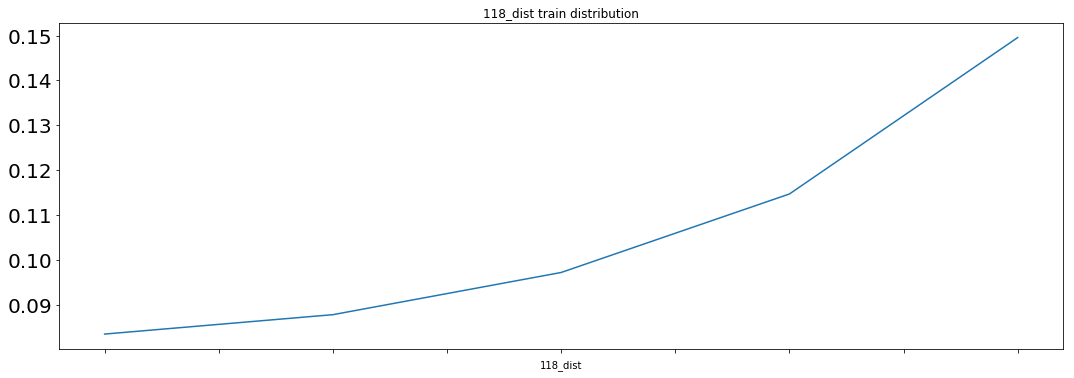

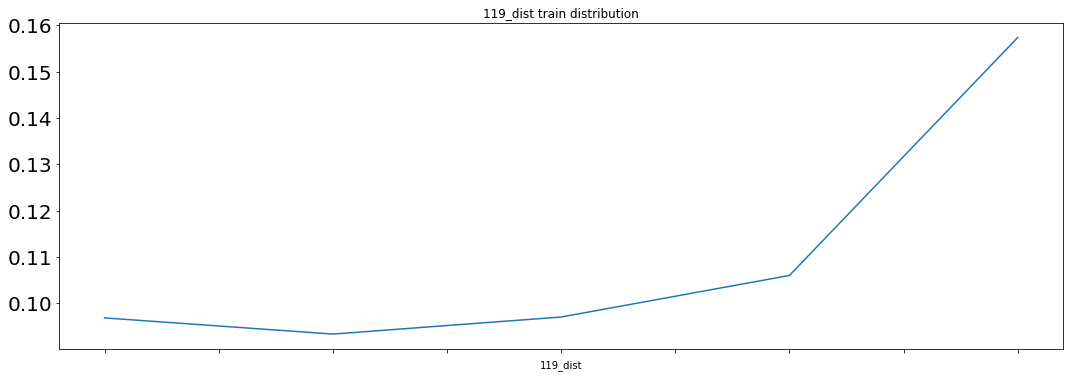

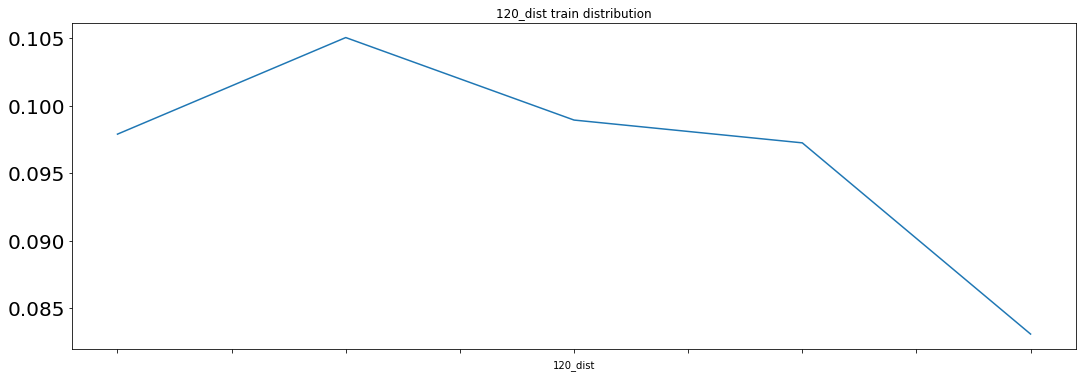

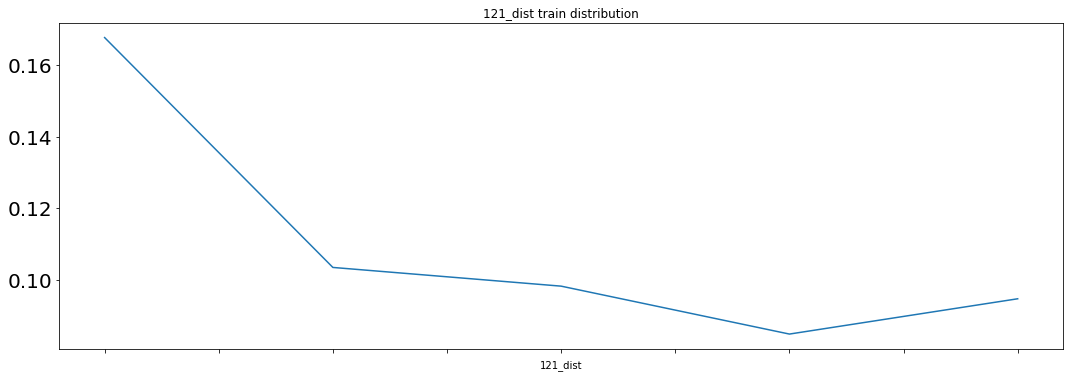

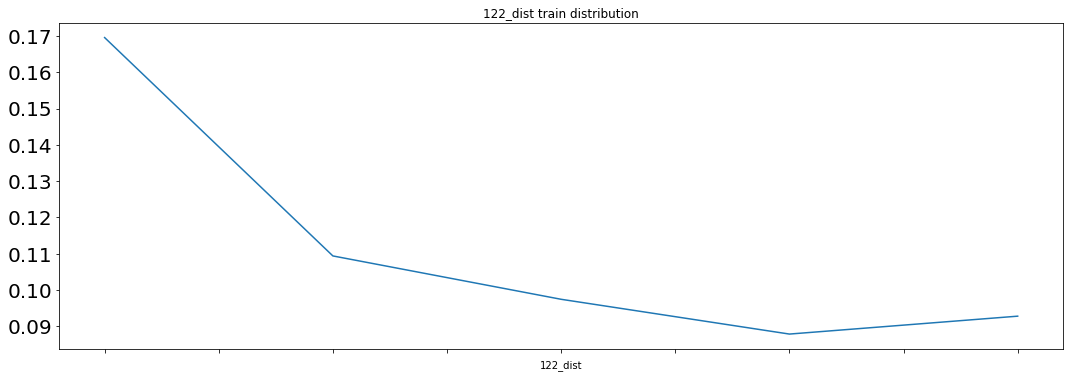

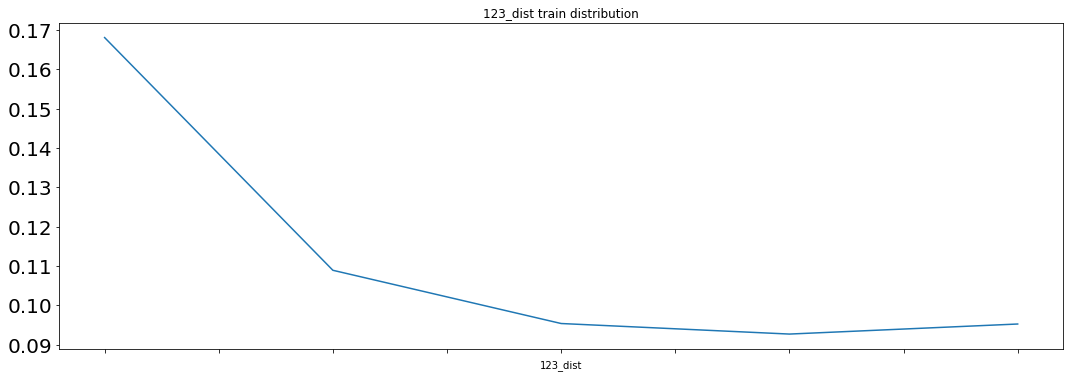

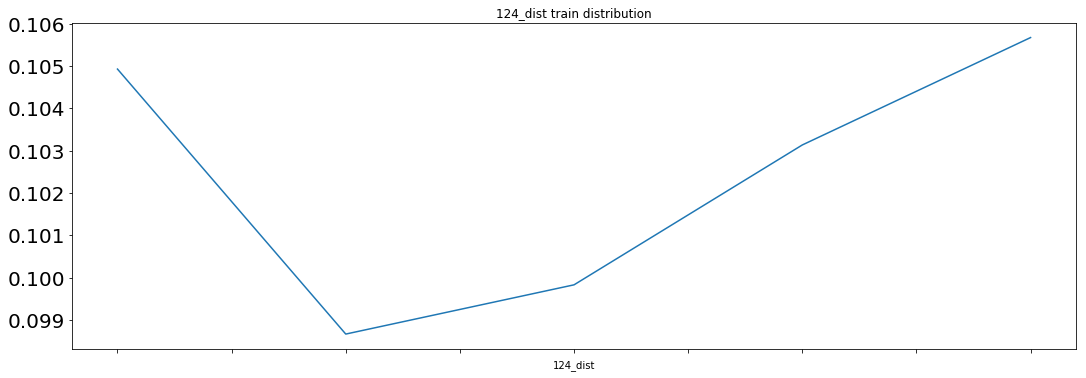

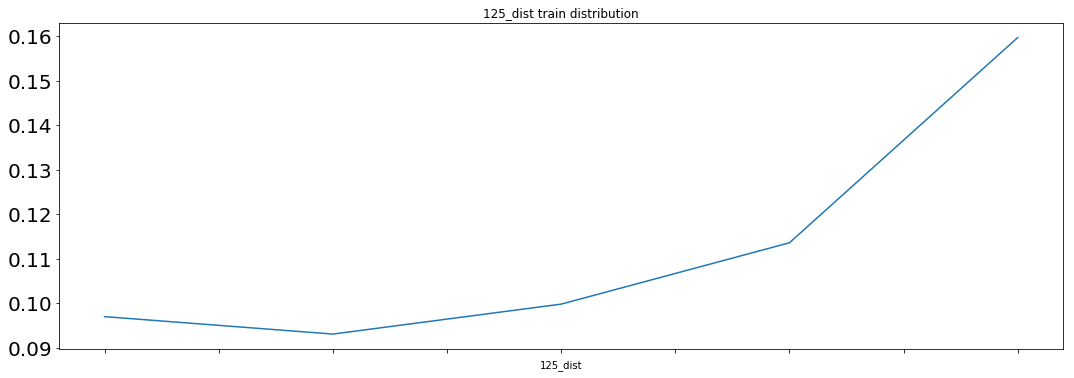

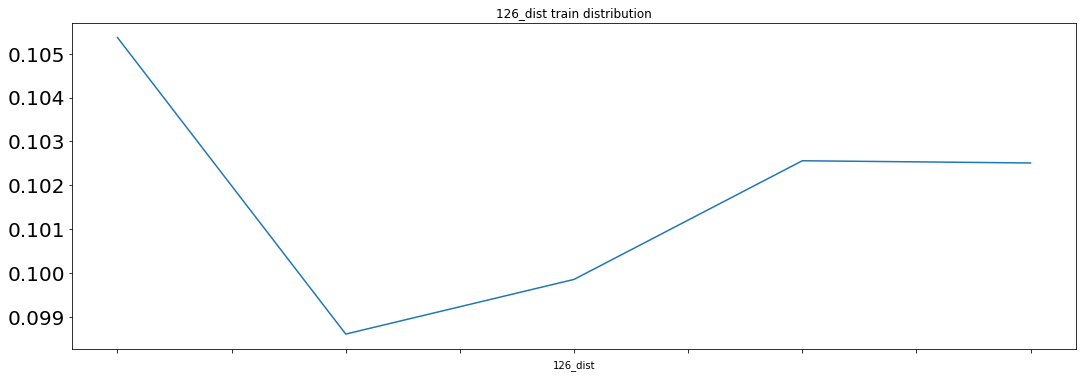

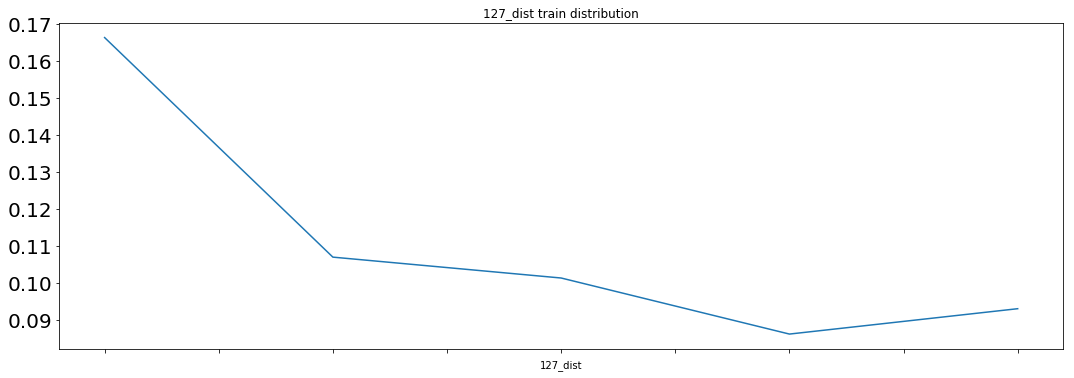

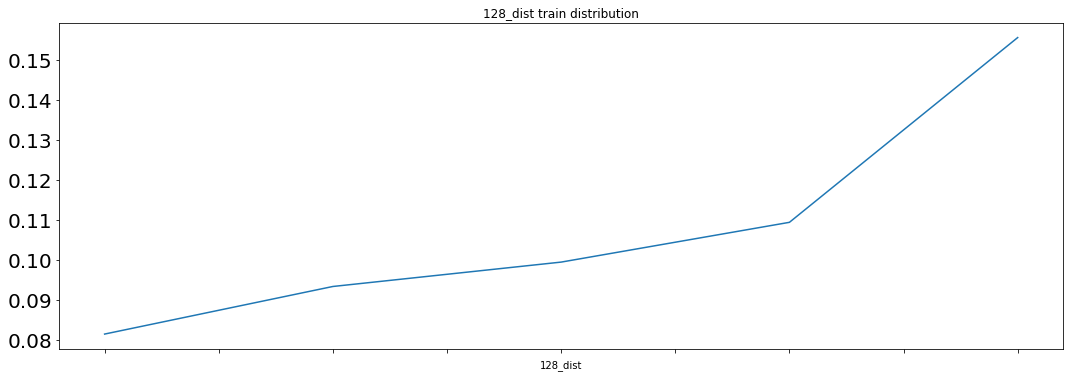

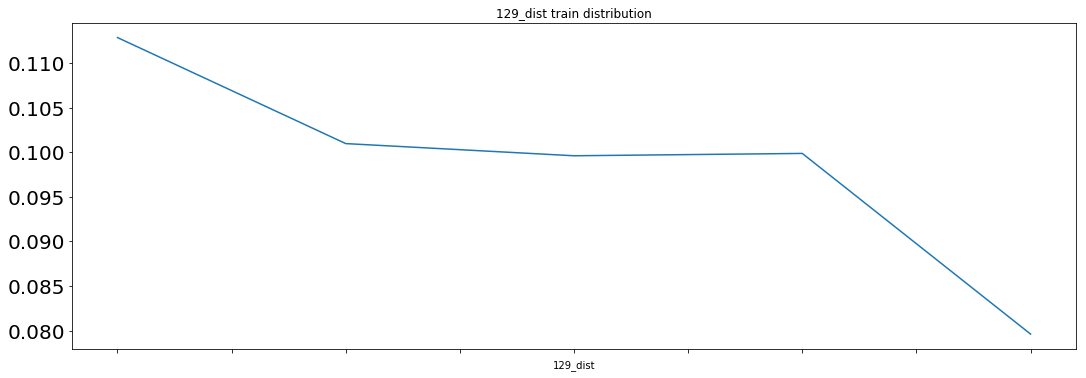

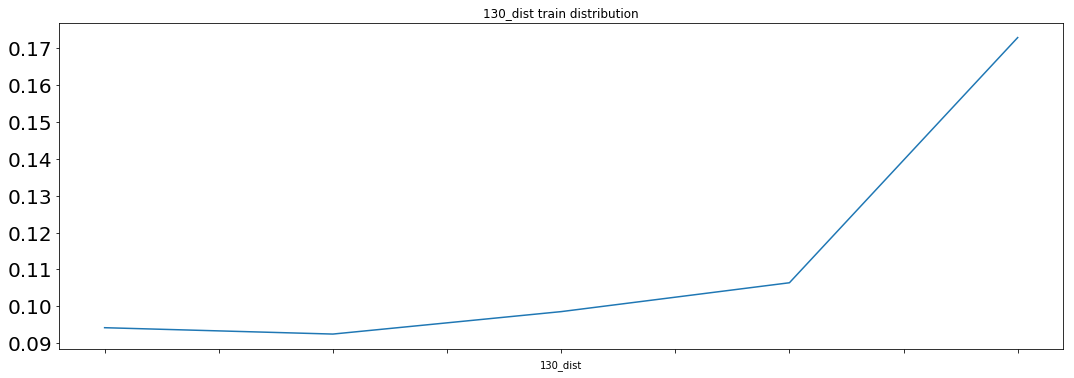

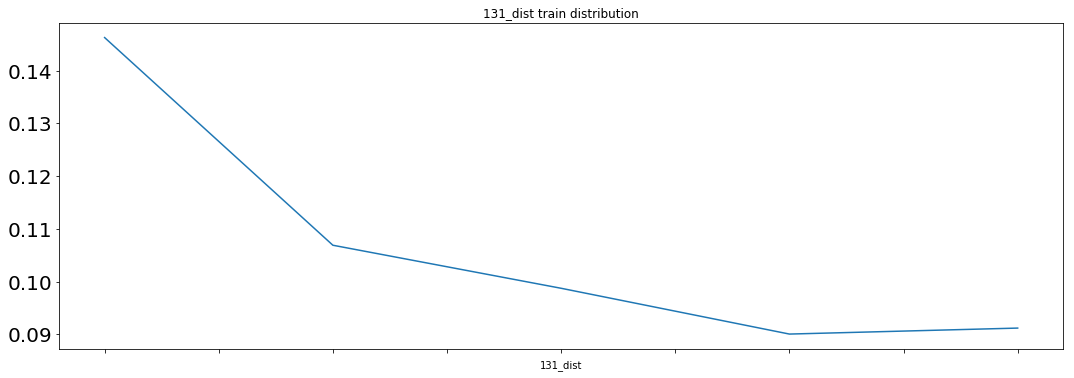

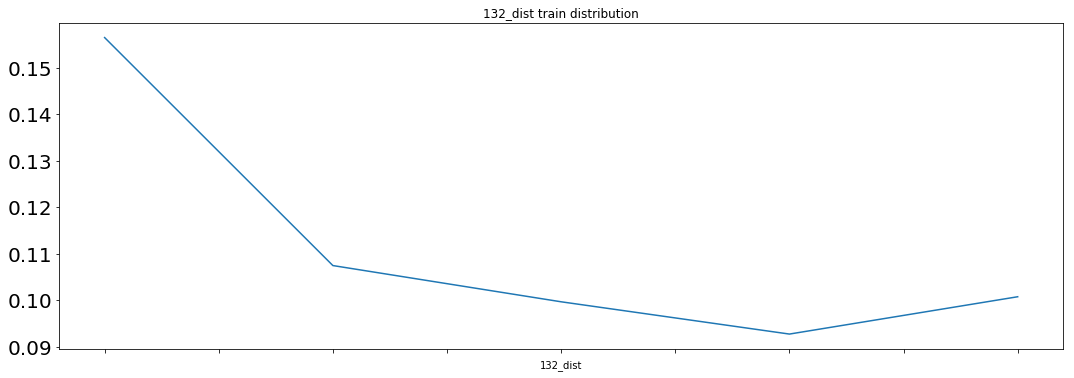

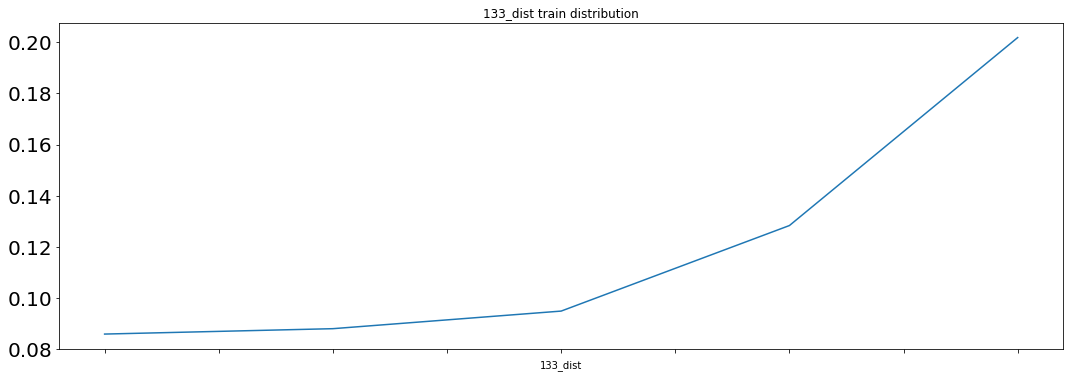

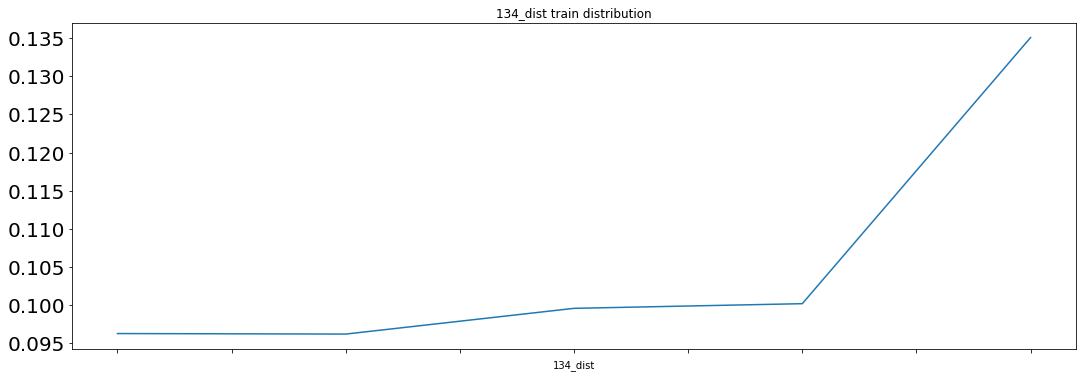

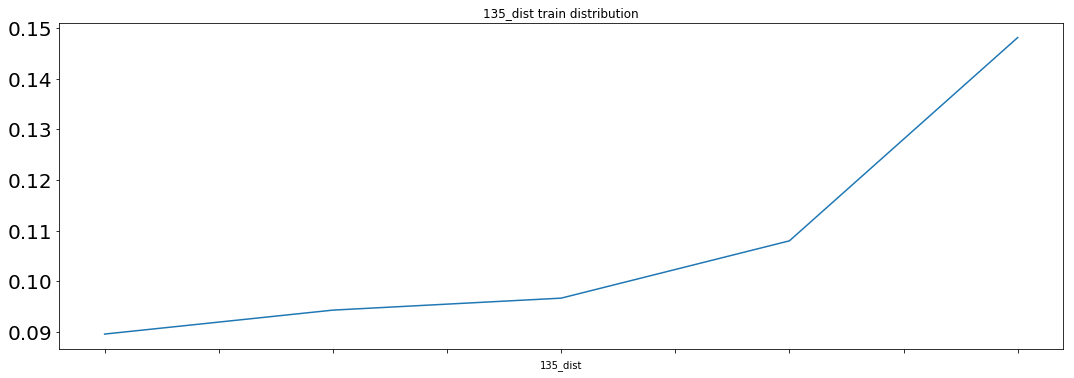

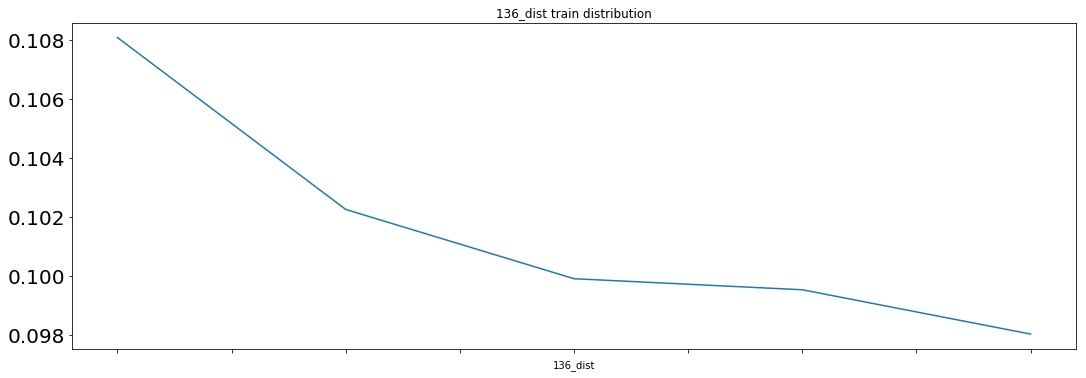

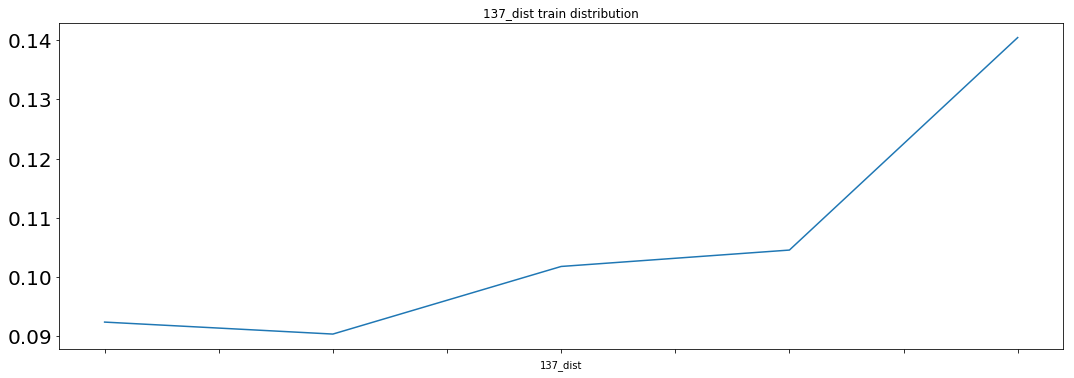

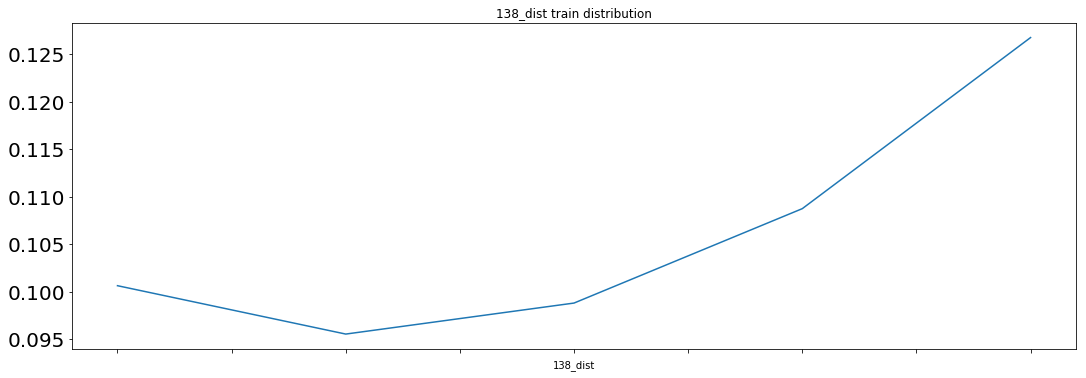

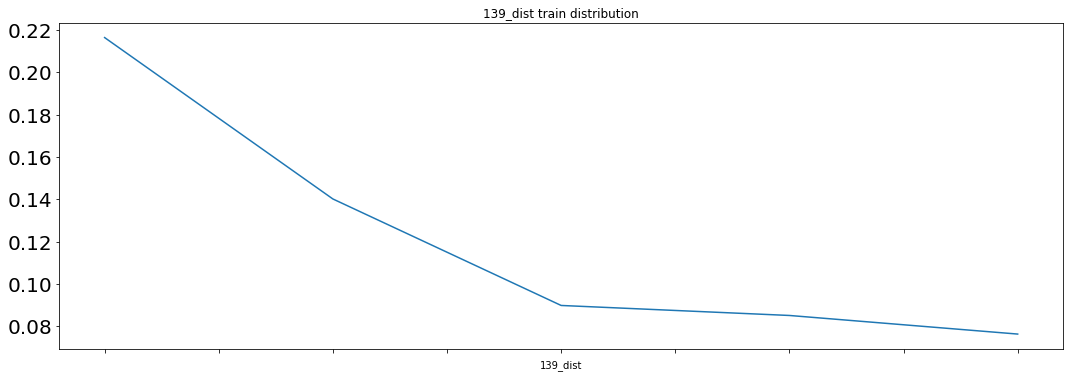

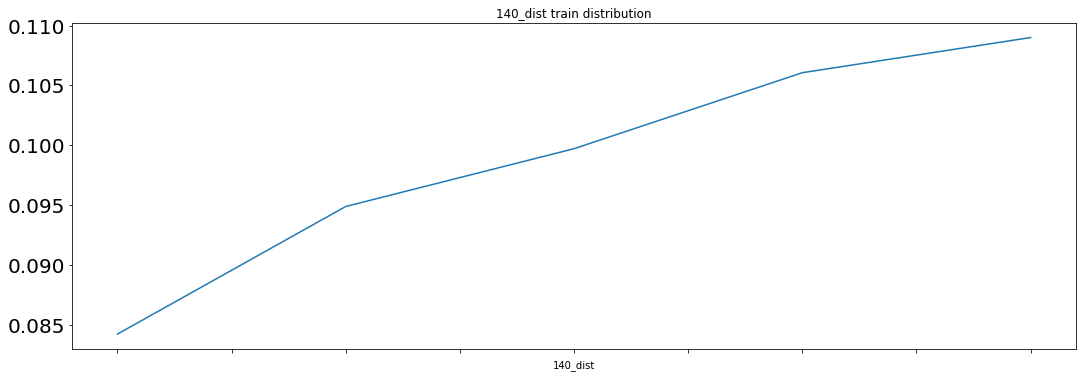

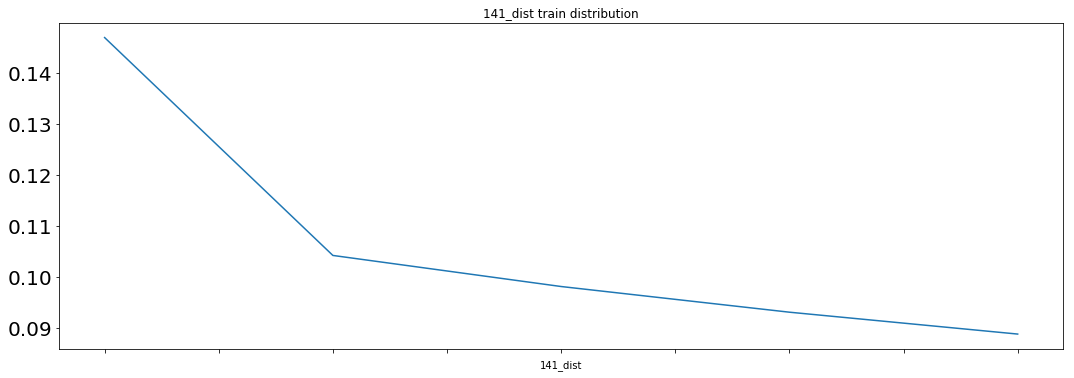

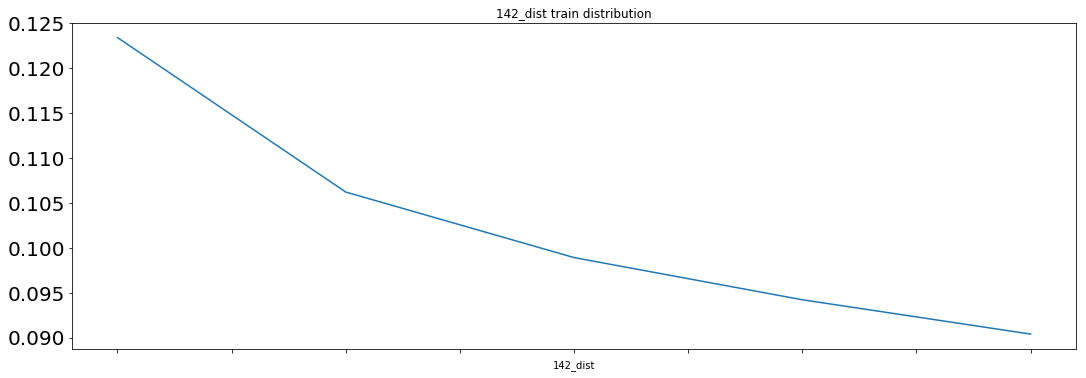

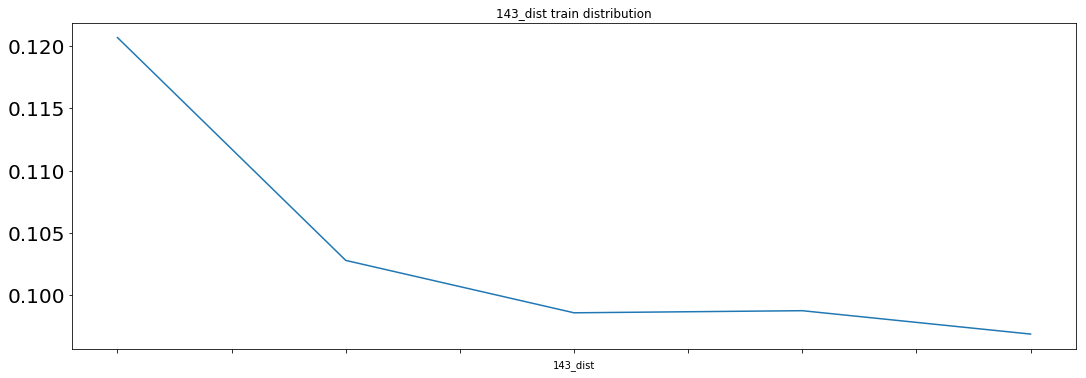

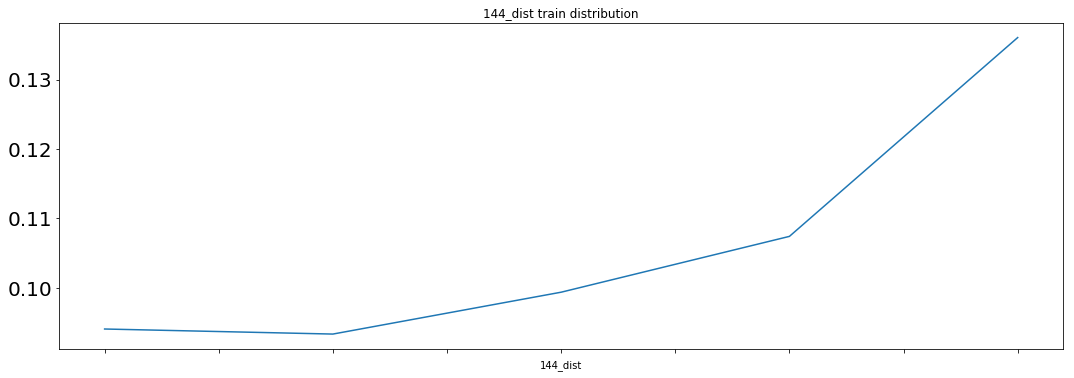

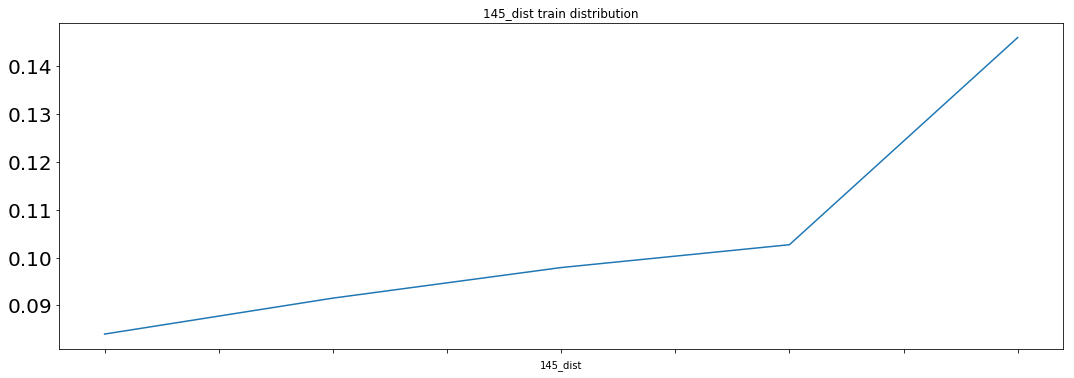

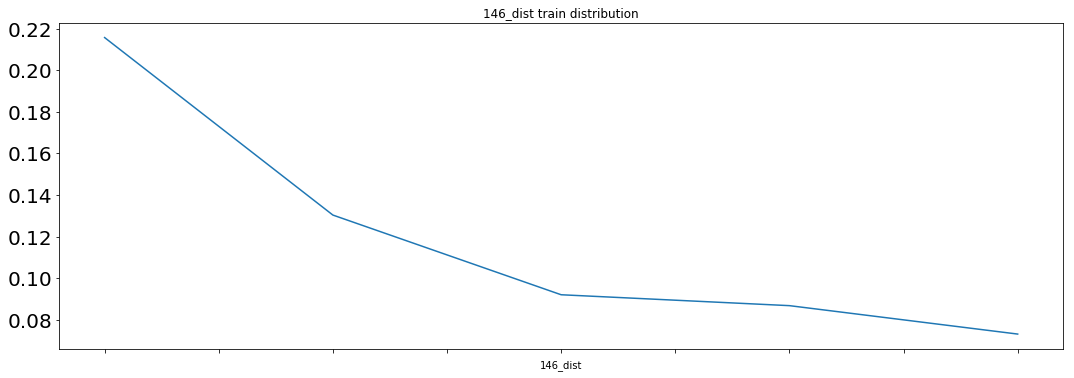

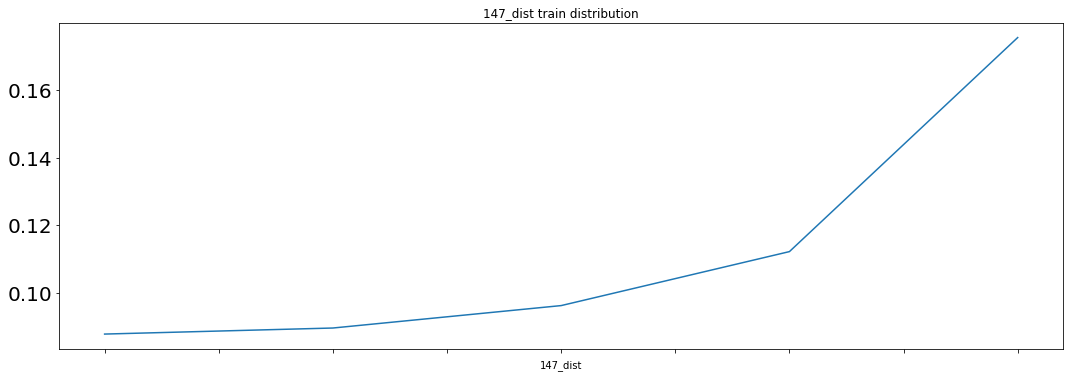

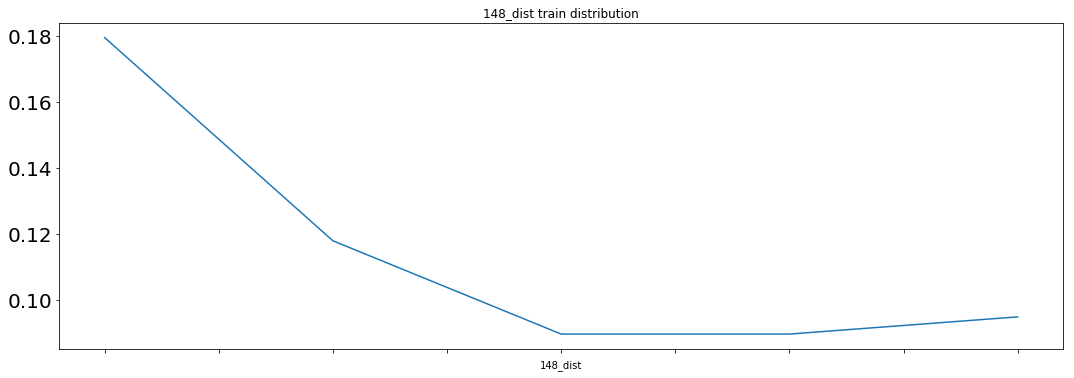

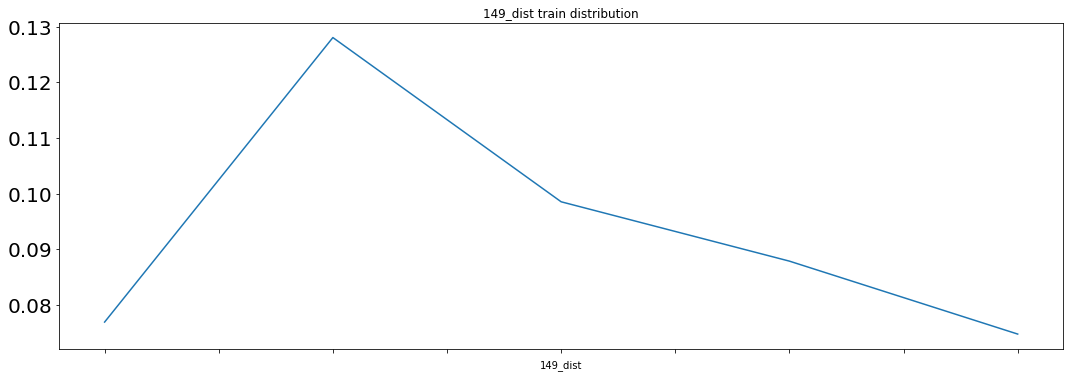

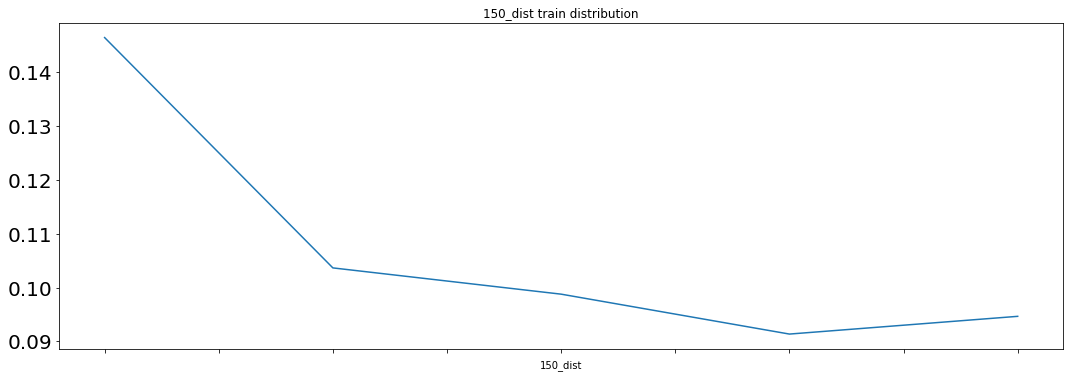

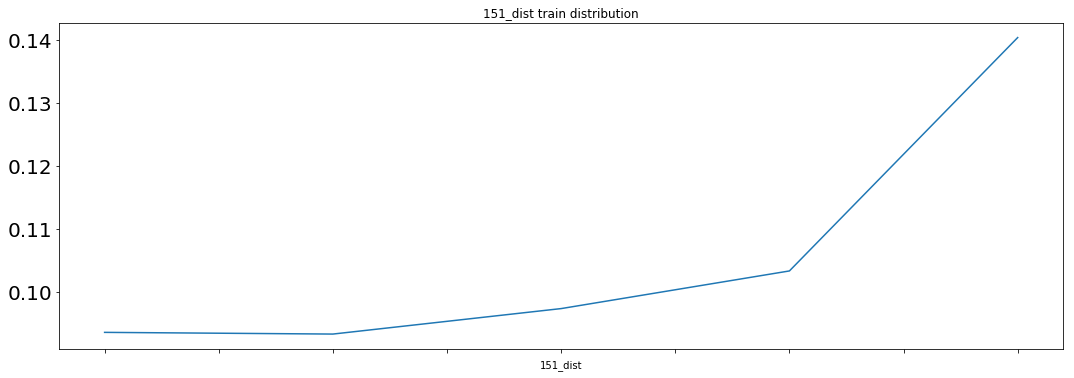

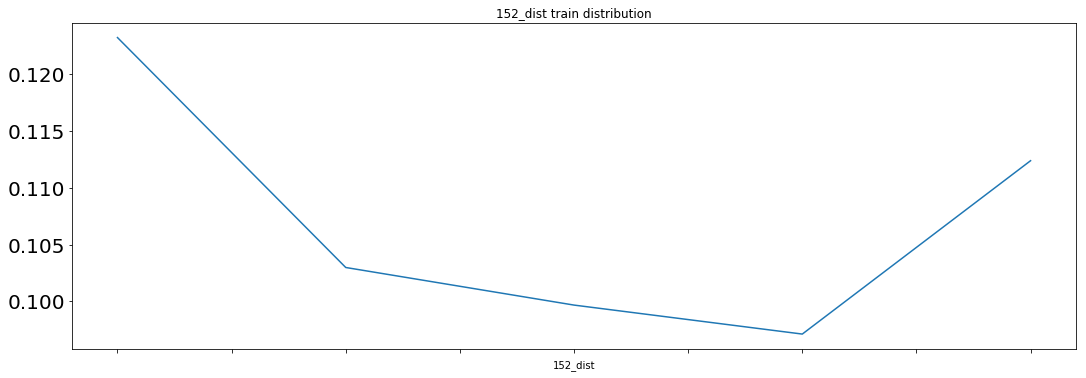

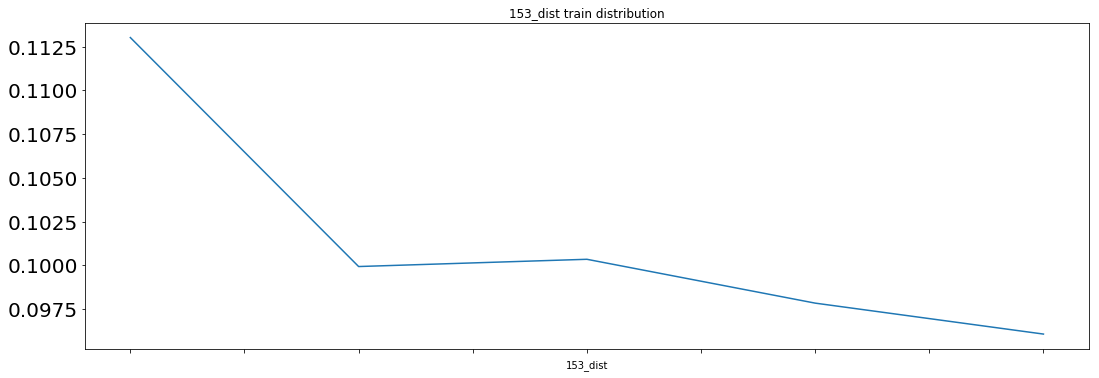

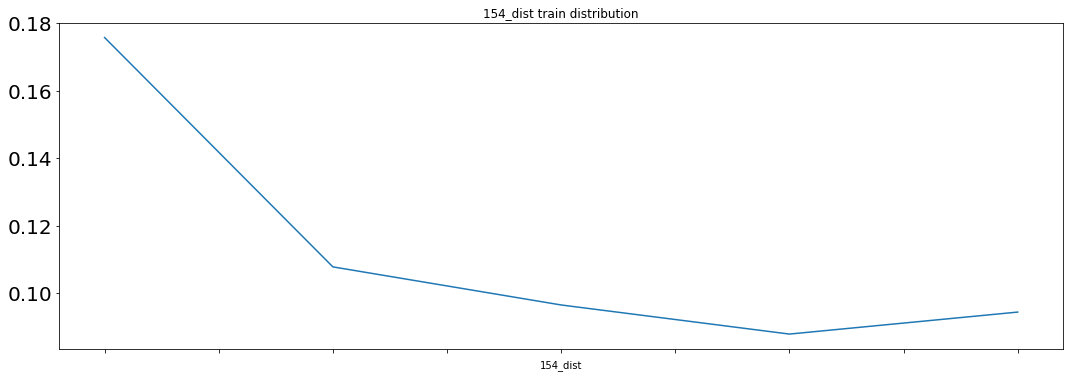

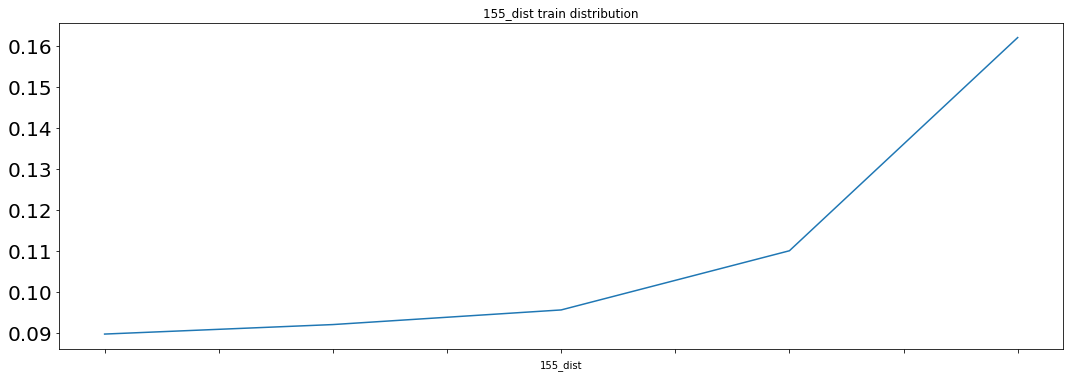

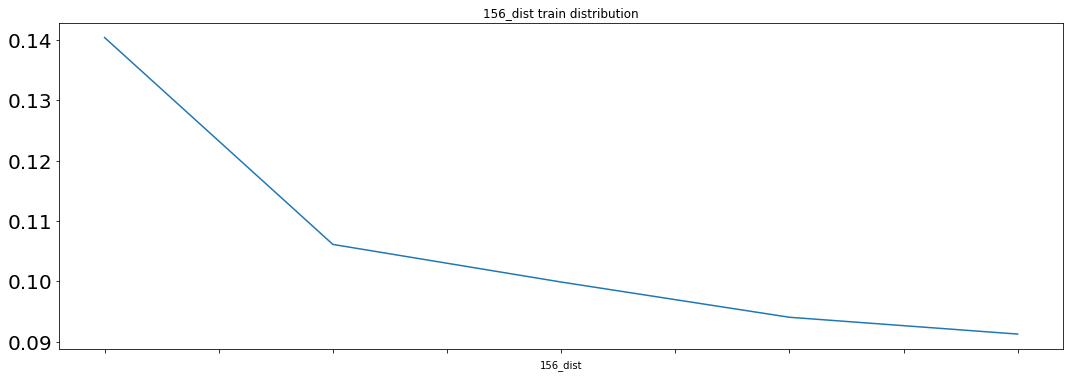

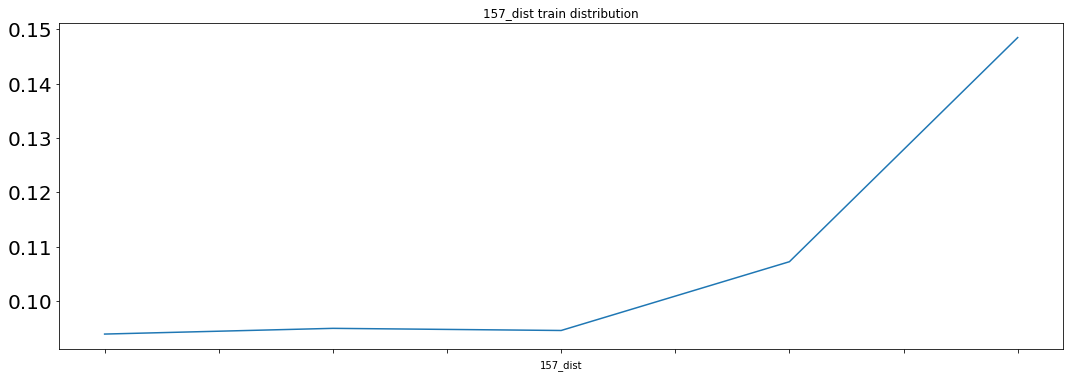

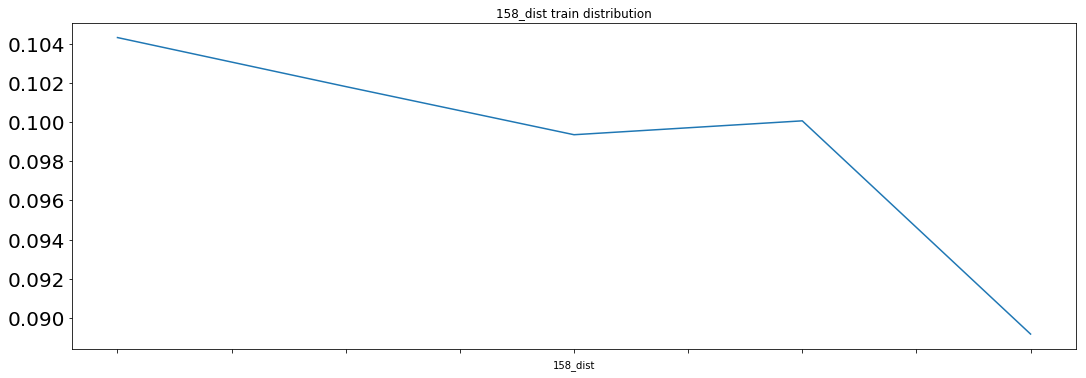

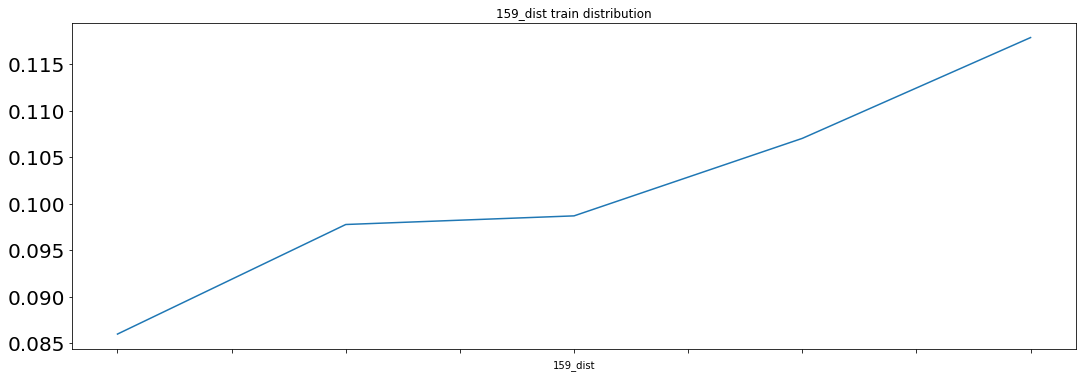

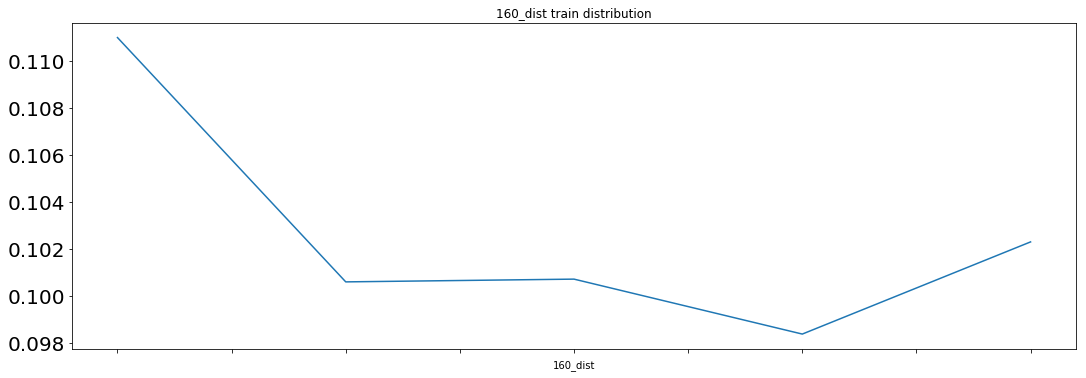

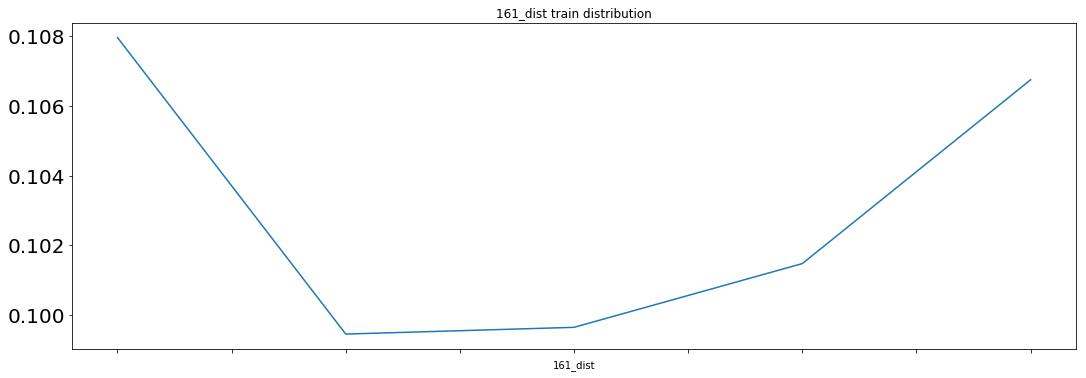

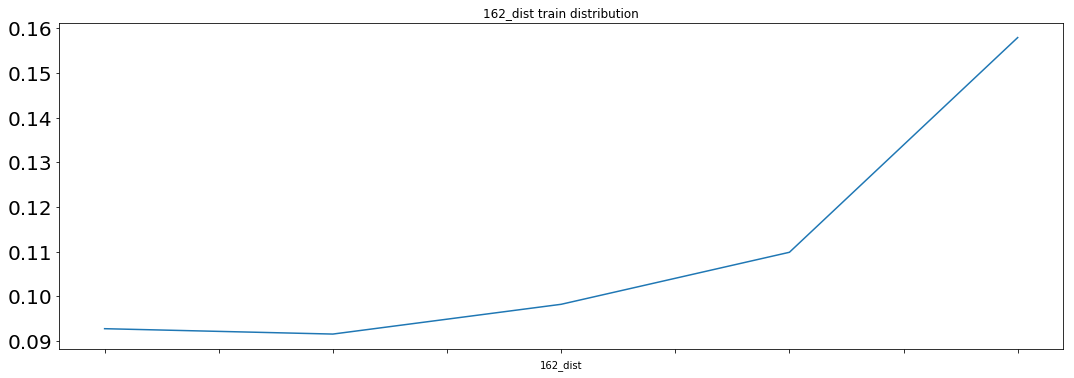

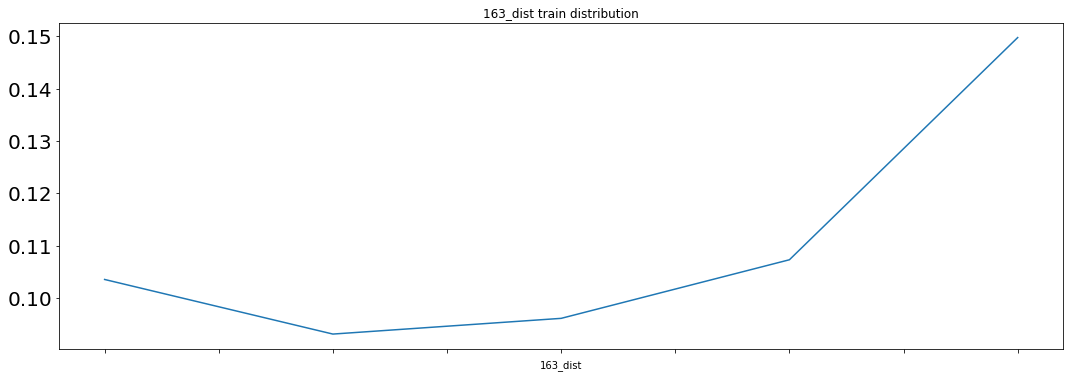

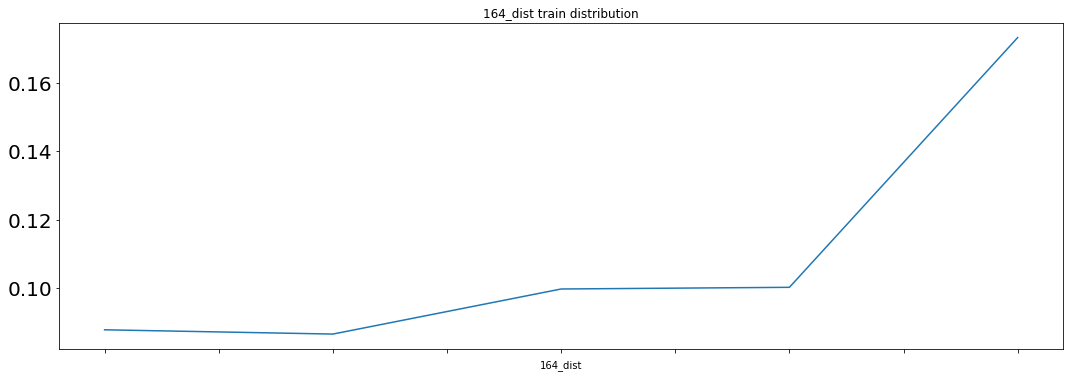

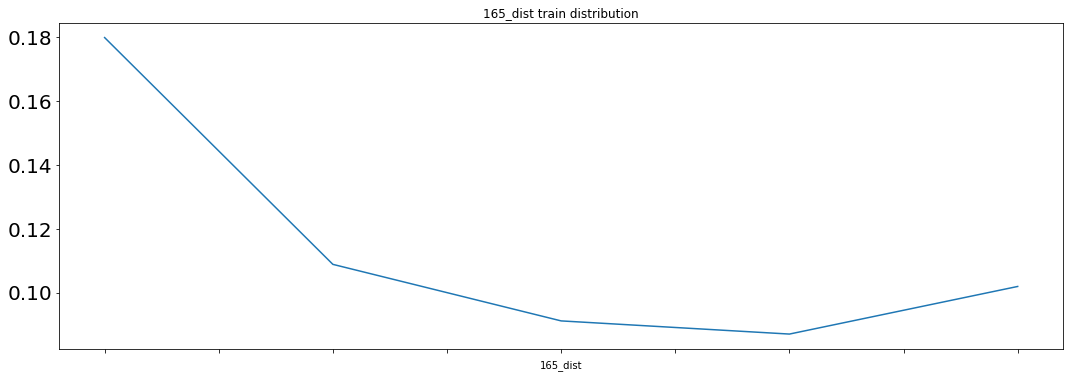

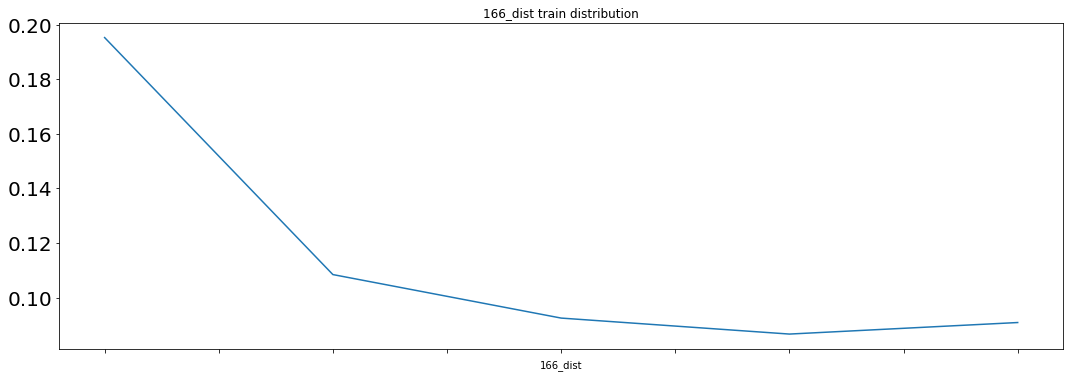

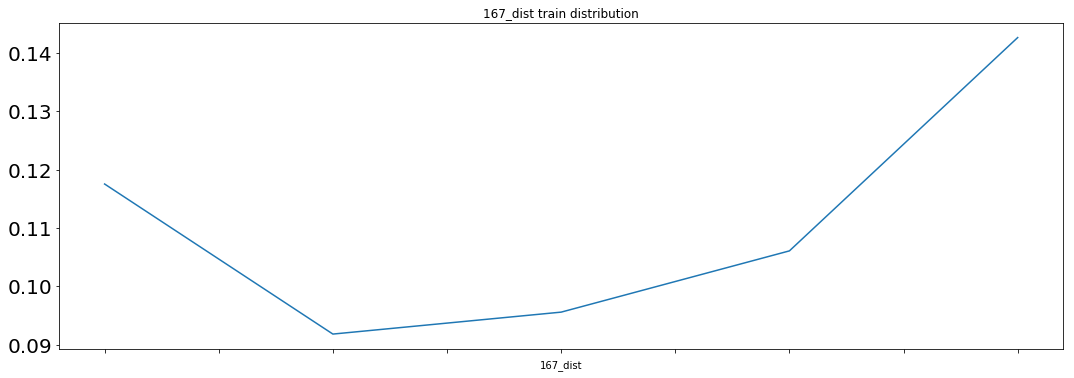

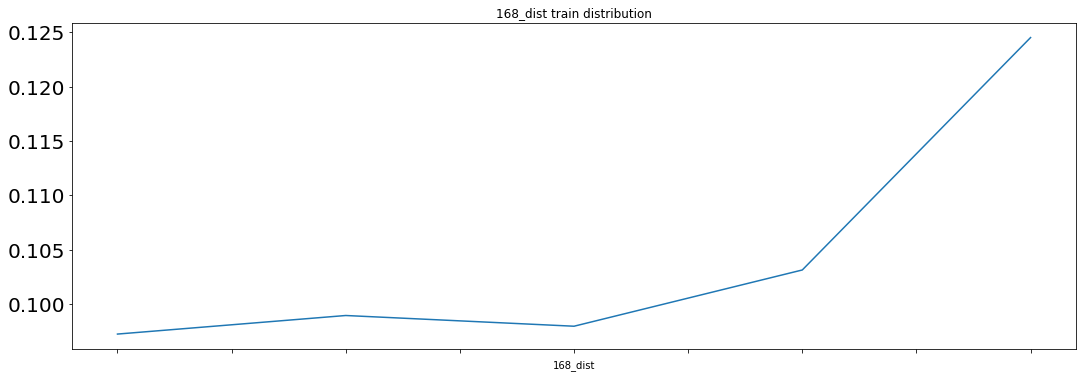

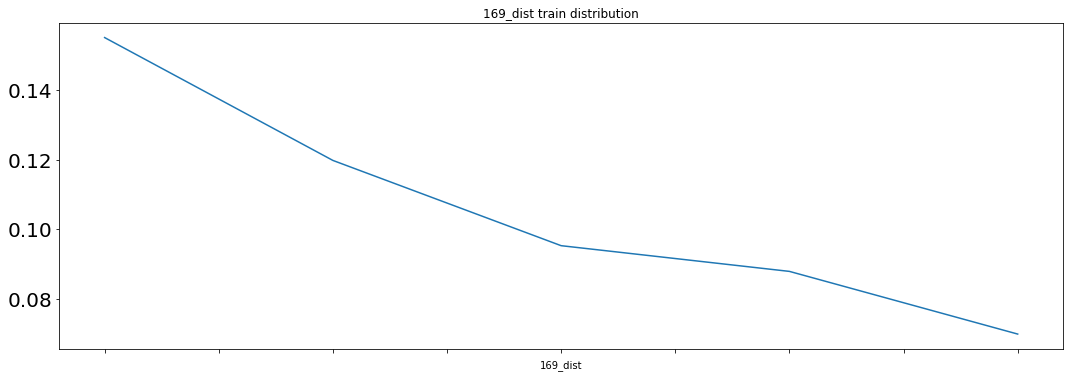

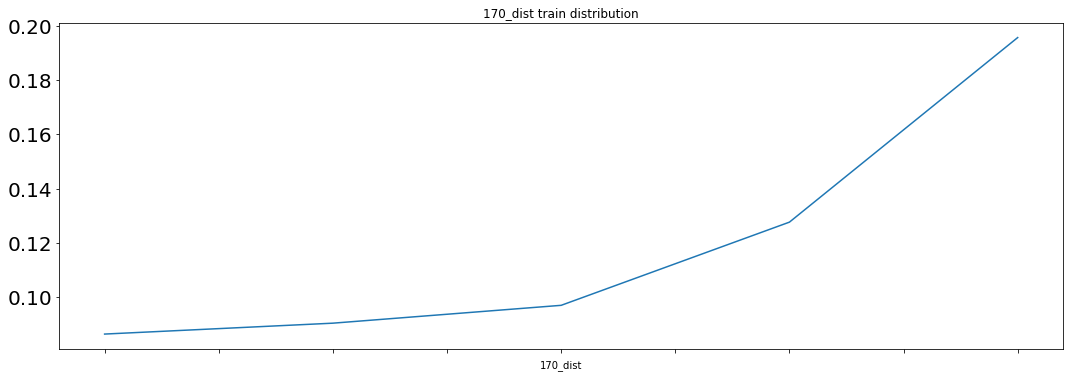

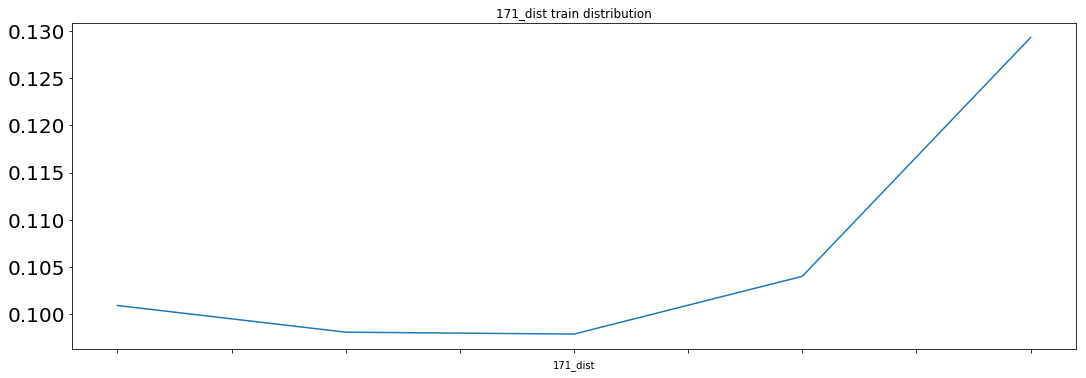

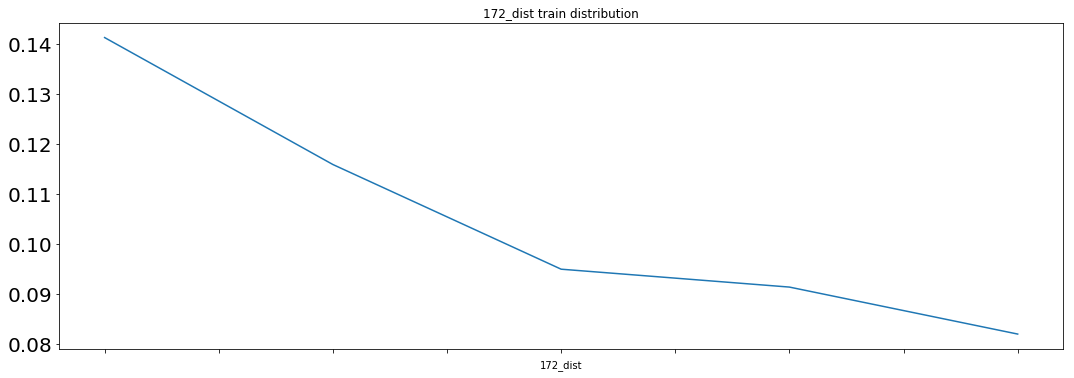

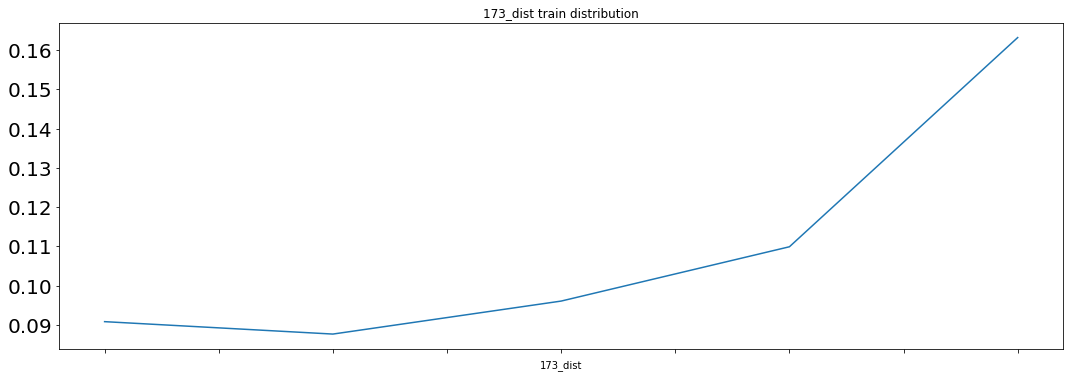

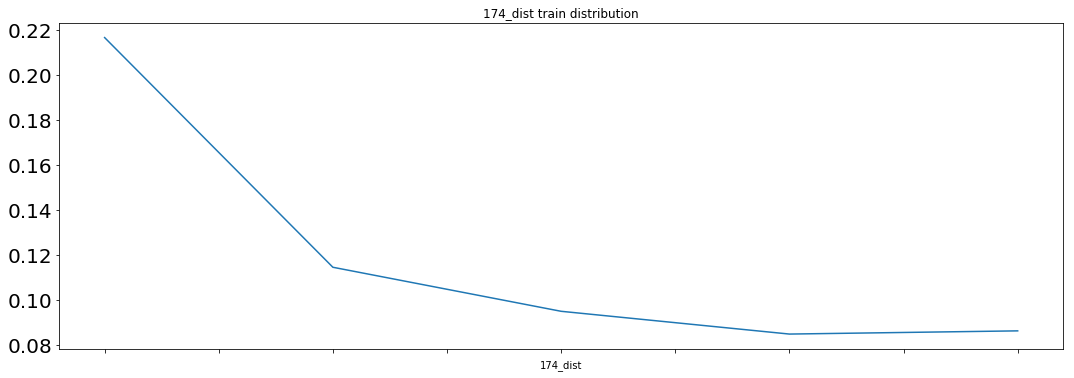

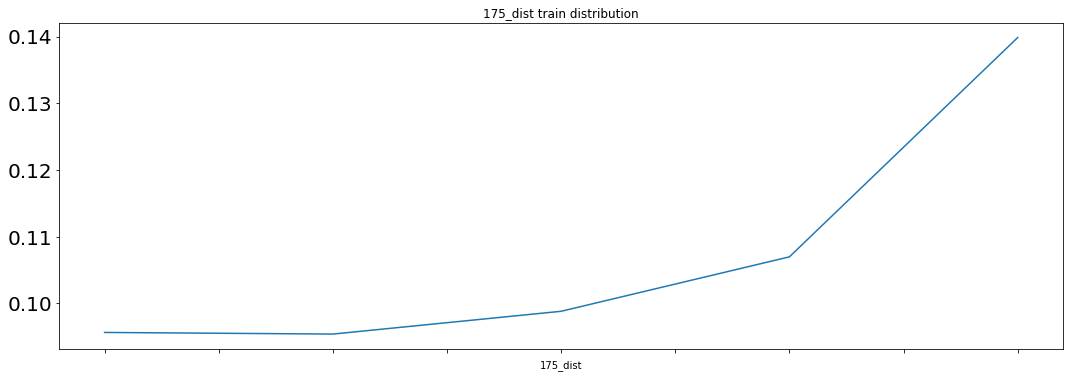

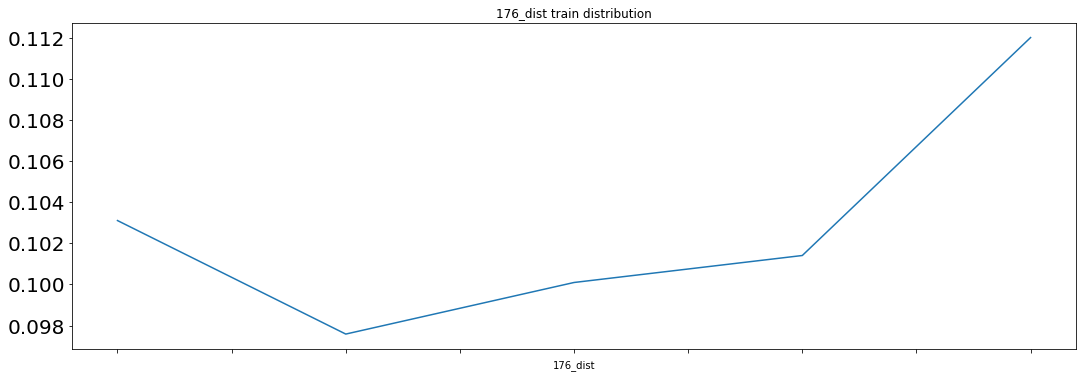

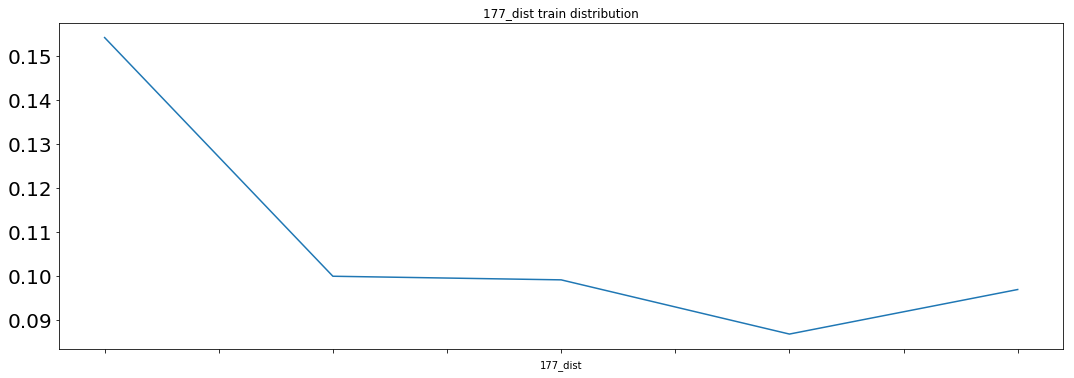

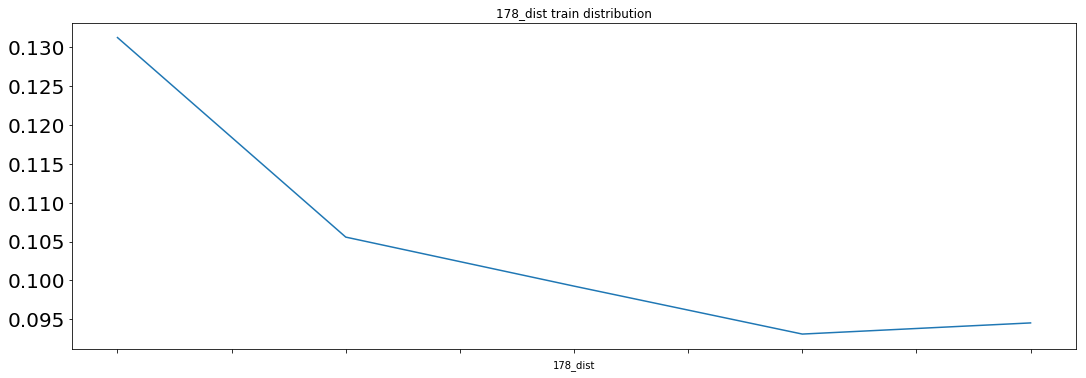

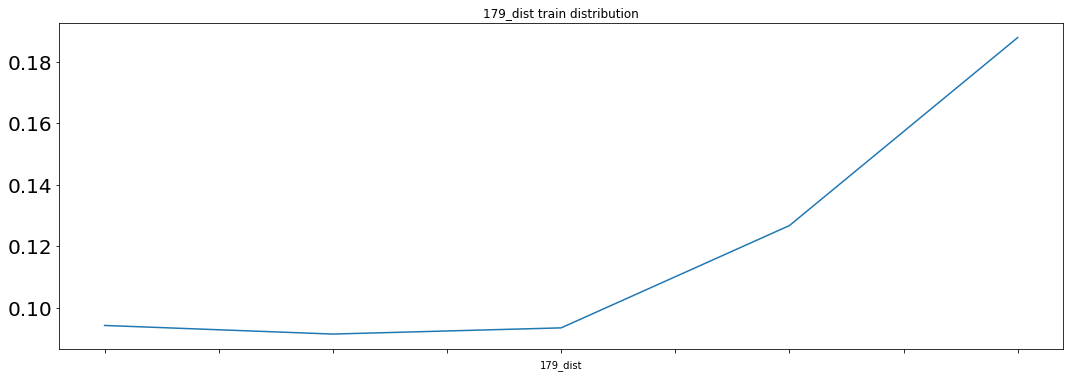

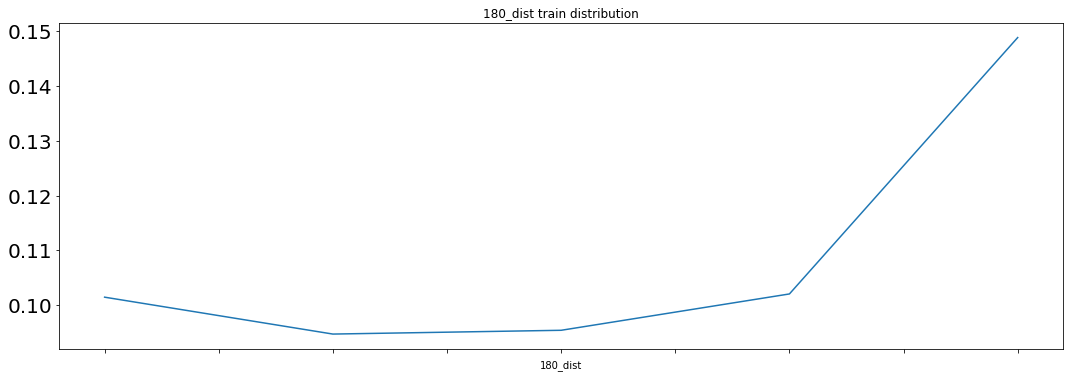

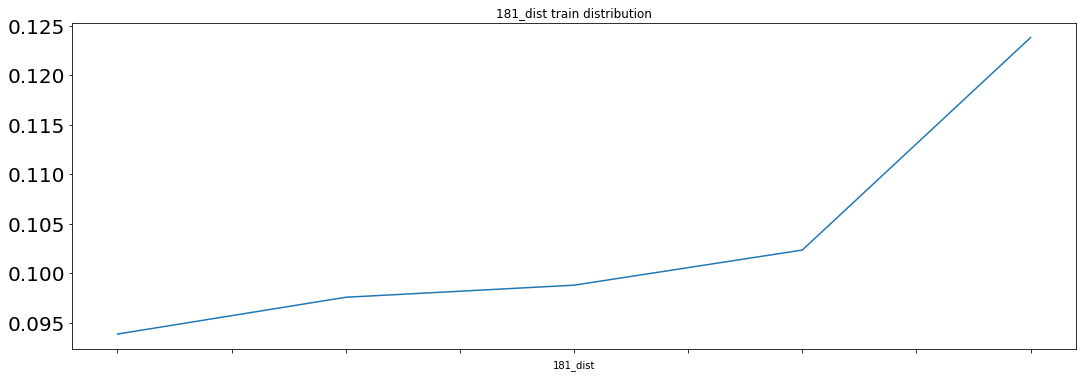

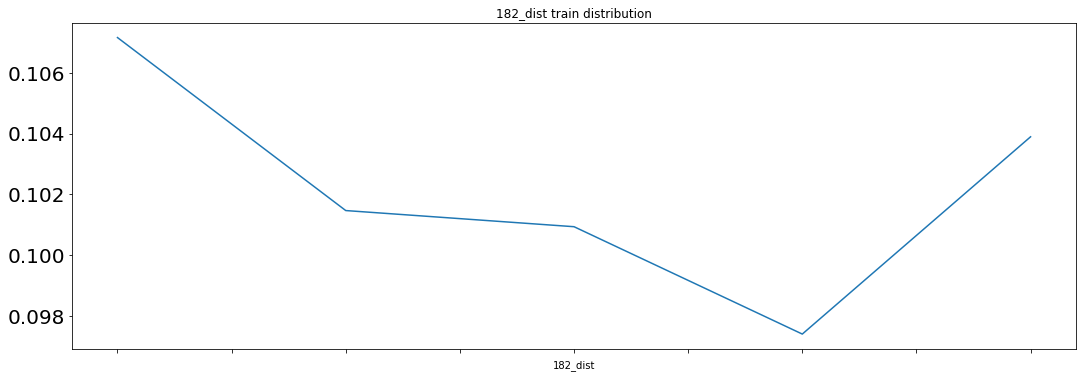

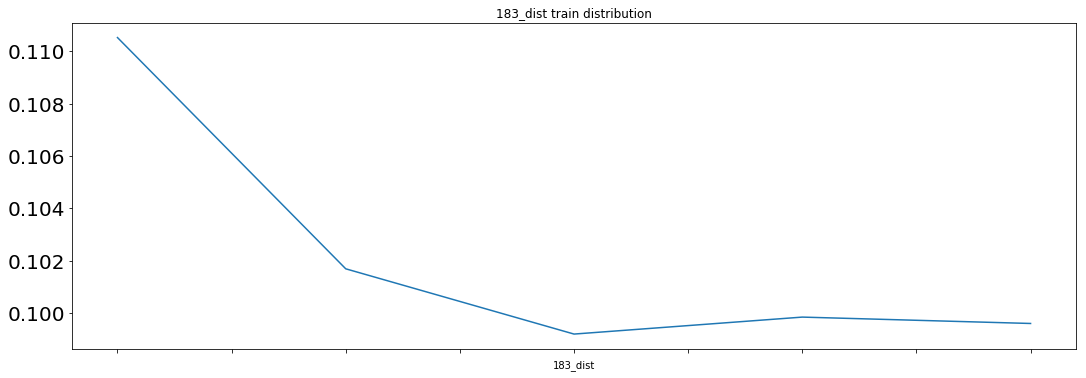

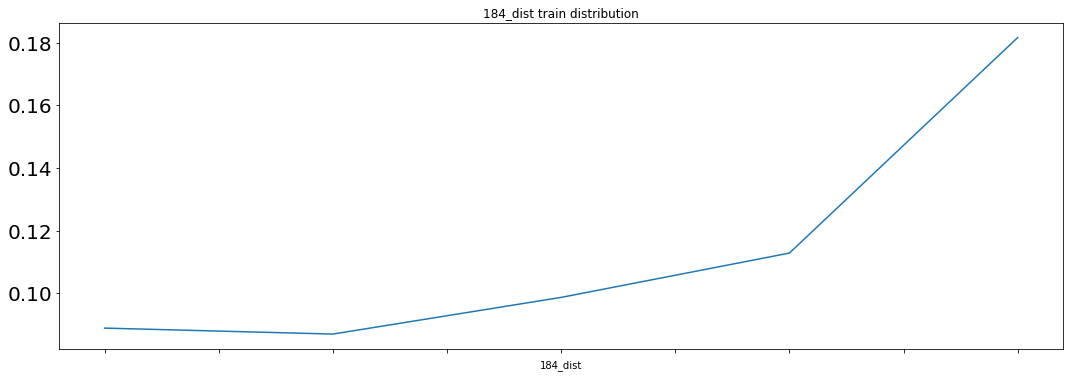

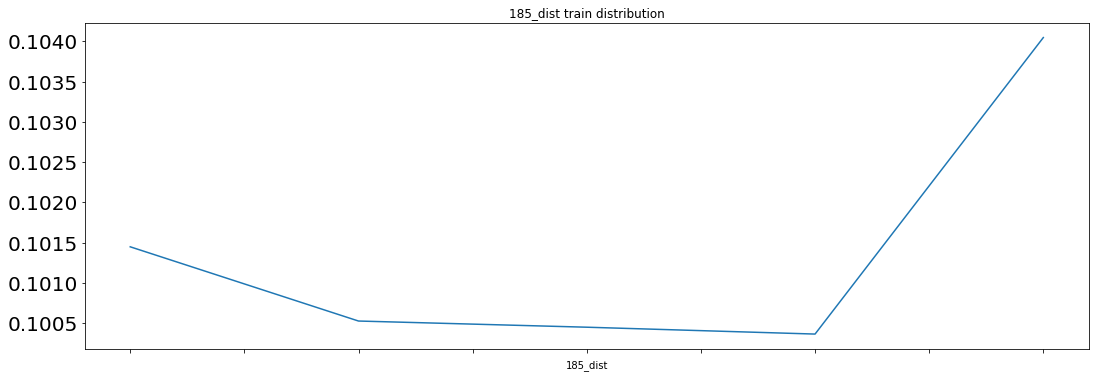

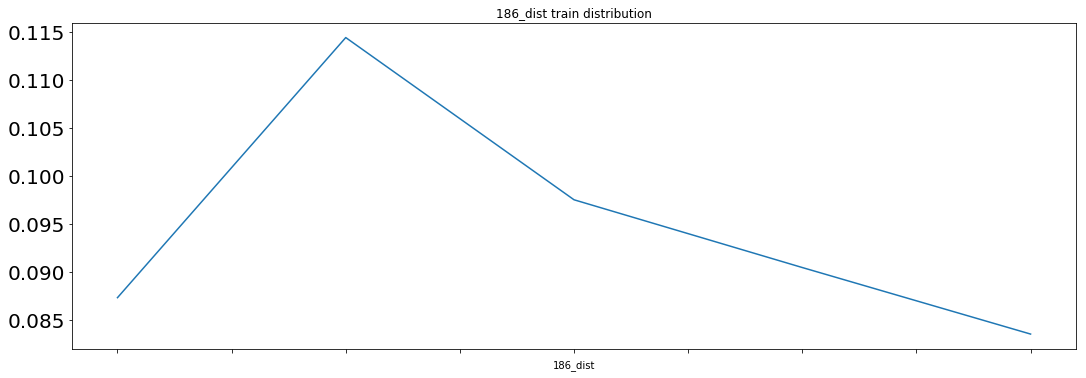

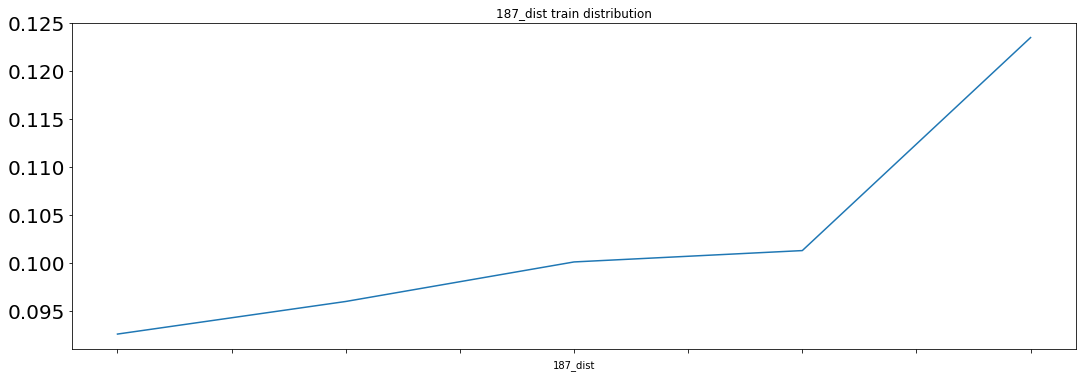

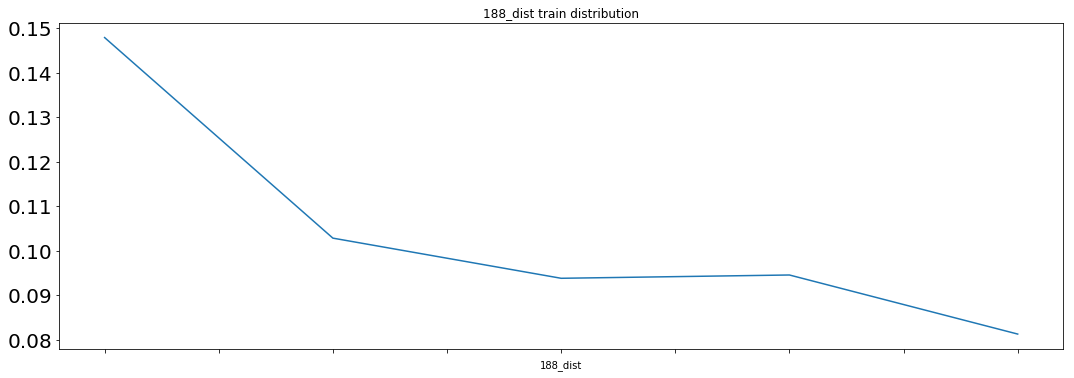

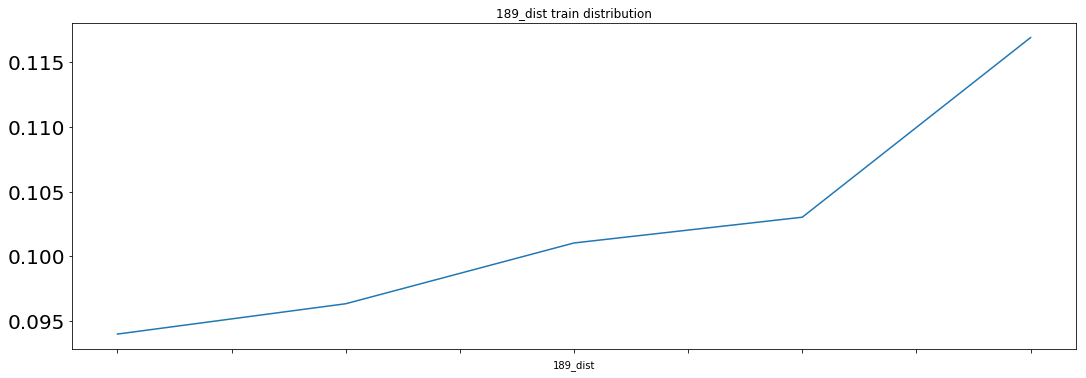

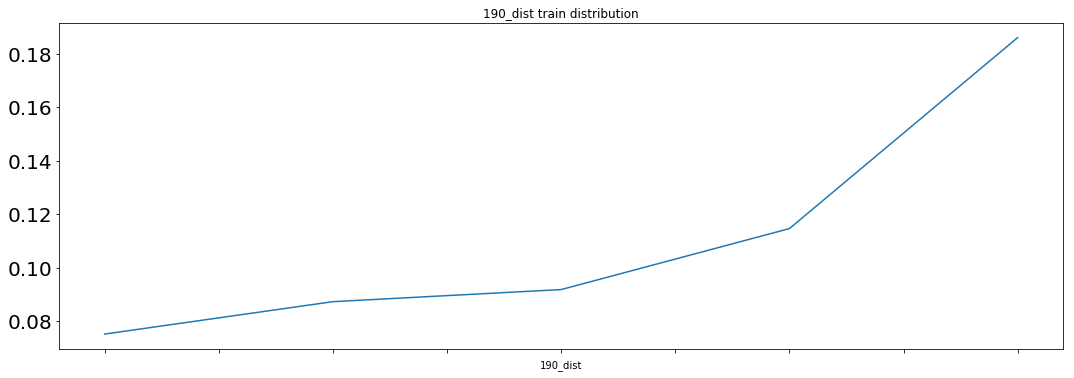

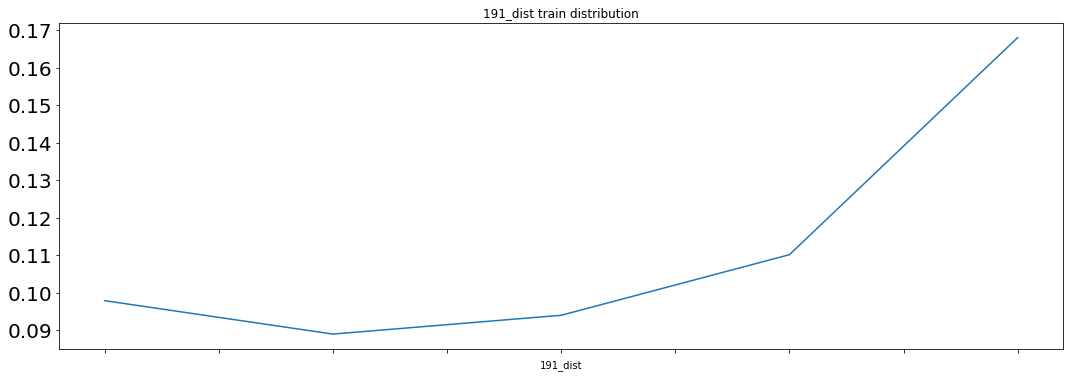

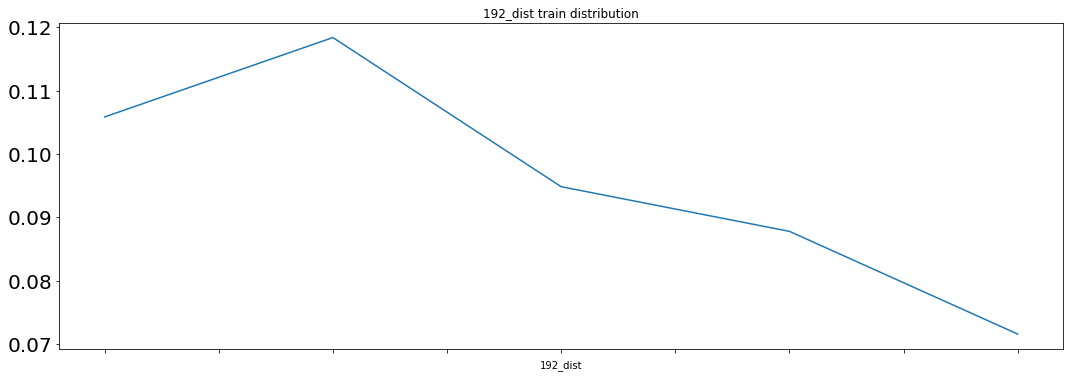

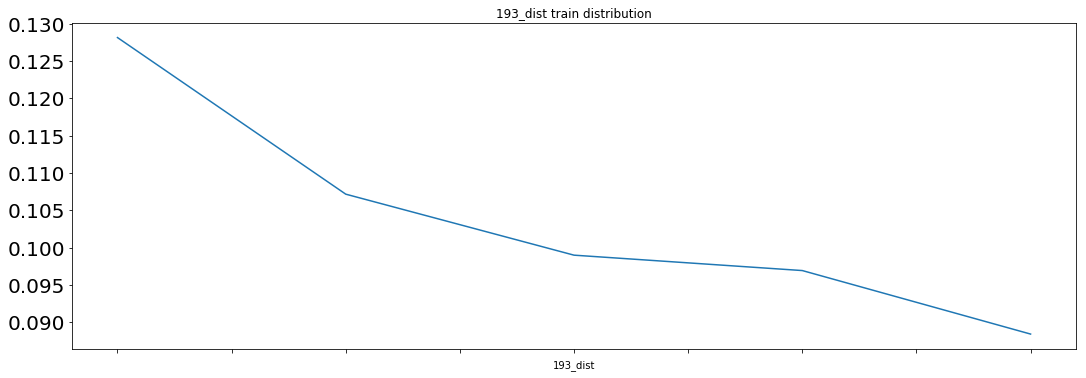

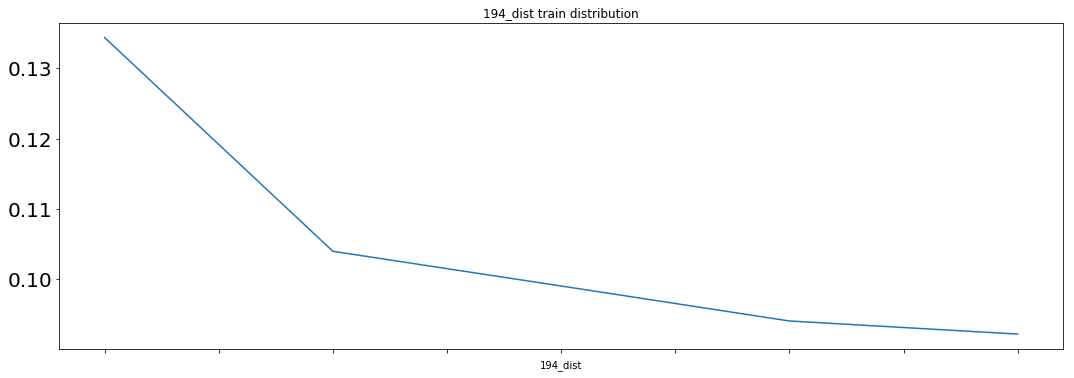

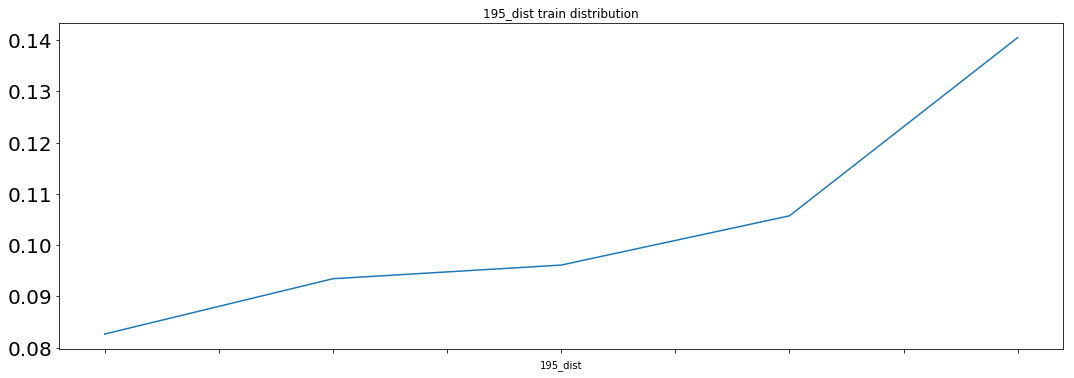

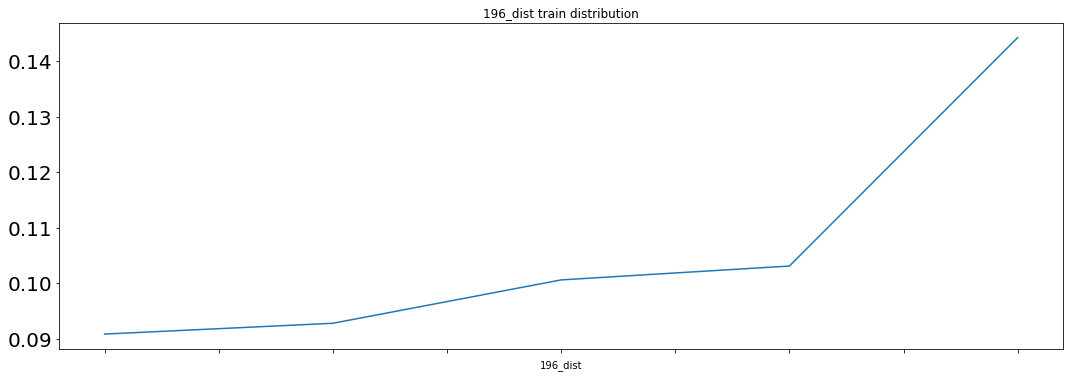

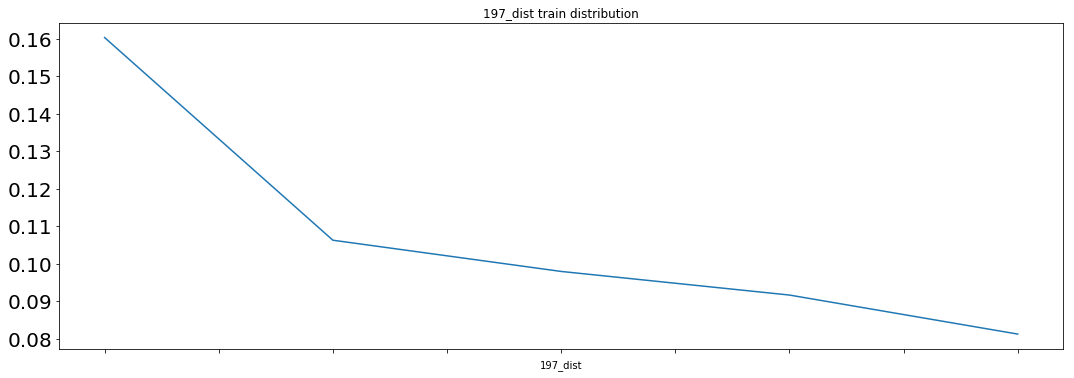

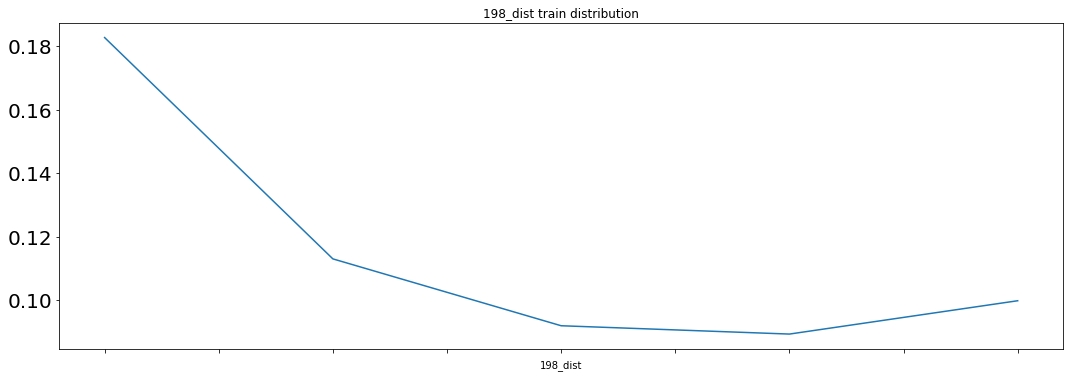

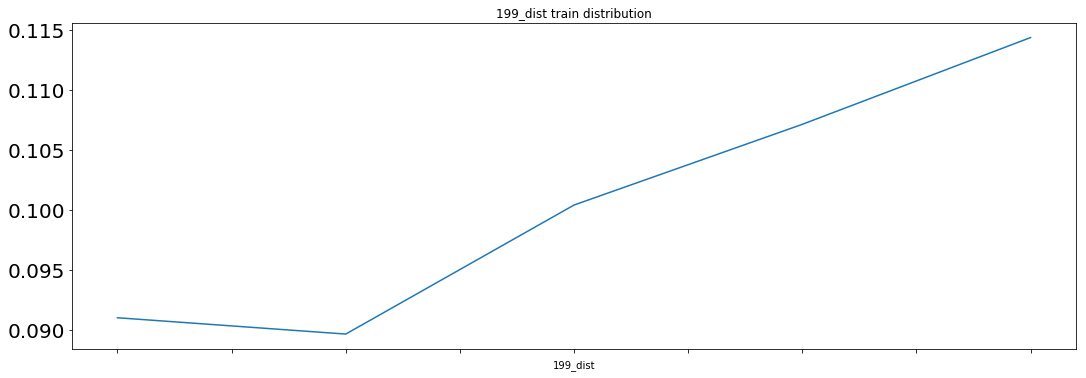

In [18]:
figs, axs = cut_target_dist(train_dist)

In [19]:
from collections import OrderedDict
unique = {}
for column in train_df.drop(['ID_code','target'],axis=1).columns:
    unique[column] = len(np.unique(train_df[column]))

In [20]:
unique = OrderedDict(sorted(unique.items(),key=lambda x:x[1]))

In [21]:
unique

OrderedDict([('var_68', 451),
             ('var_91', 7962),
             ('var_108', 8525),
             ('var_103', 9376),
             ('var_12', 9561),
             ('var_148', 10608),
             ('var_161', 11071),
             ('var_71', 13527),
             ('var_25', 14853),
             ('var_43', 15188),
             ('var_125', 16059),
             ('var_166', 17902),
             ('var_169', 18242),
             ('var_133', 19236),
             ('var_15', 19810),
             ('var_131', 21464),
             ('var_23', 24913),
             ('var_34', 25164),
             ('var_93', 26708),
             ('var_95', 29387),
             ('var_42', 31592),
             ('var_50', 32308),
             ('var_126', 32411),
             ('var_98', 33266),
             ('var_53', 33460),
             ('var_57', 35545),
             ('var_28', 35859),
             ('var_130', 36638),
             ('var_59', 37744),
             ('var_6', 38599),
             ('var_105', 39115),
   